# Projet 4 :
# Anticipez les besoins en consommation de bâtiments


Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.

Des relevés minutieux ont été effectués par les agents de la ville en 2016, cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, on veut tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

La prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)

On doit évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement. On l'intégrera dans la modélisation puis on jugera de son intérêt.

## Mission

1) Réaliser une analyse exploratoire.

2) Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

### I) Traitement et analyse exploratoire des données :

### chargement des bibilothèques

In [1]:
# Importation des bibliothèques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Chargement du jeu de données df_Seattle
df_Seattle = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=',')

In [3]:
# Afficher les 5 premières lignes du jeu de données df_Seattle

df_Seattle.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [4]:
# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)

print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (3376, 46)


In [5]:
# Nombre des doublons dans le jeu de données df_Seattle

print(f"Nombre des doublons = {df_Seattle.duplicated(keep=False).sum()}")

Nombre des doublons = 0


In [6]:
# Informations sur le jeu de données df_Seattle

df_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [7]:
# types des données dans le jeu données df_Seattle
df_Seattle.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

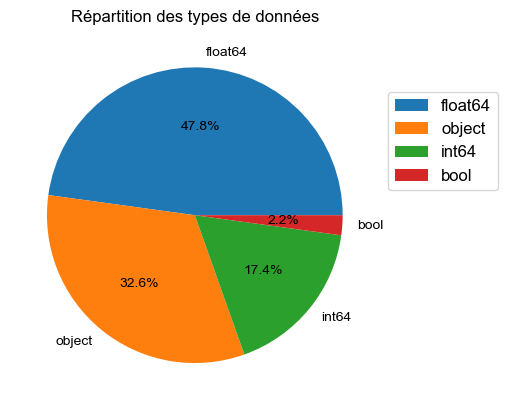

In [8]:
# visualisation de types des données dans le jeu de données df_Seattle

df_Seattle.dtypes.value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                   title="Répartition des types de données",
                                   legend=False, label="")

ax = plt.gca()
ax.legend(loc="center left",
          fontsize=12,
          bbox_to_anchor=(1, 0.2, 0.5, 1))
sns.set_theme()
plt.show()

In [9]:
# somme de valeurs non nulles
df_Seattle.notnull().sum()

OSEBuildingID                      3376
DataYear                           3376
BuildingType                       3376
PrimaryPropertyType                3376
PropertyName                       3376
Address                            3376
City                               3376
State                              3376
ZipCode                            3360
TaxParcelIdentificationNumber      3376
CouncilDistrictCode                3376
Neighborhood                       3376
Latitude                           3376
Longitude                          3376
YearBuilt                          3376
NumberofBuildings                  3368
NumberofFloors                     3376
PropertyGFATotal                   3376
PropertyGFAParking                 3376
PropertyGFABuilding(s)             3376
ListOfAllPropertyUseTypes          3367
LargestPropertyUseType             3356
LargestPropertyUseTypeGFA          3356
SecondLargestPropertyUseType       1679
SecondLargestPropertyUseTypeGFA    1679


In [10]:
# % de valeurs manquantes par colonne
df_Seattle.isna().mean()*100

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

Le jeu de données regroupe des informations sur les bâtiments: taille, usage, date de construction, géolocalisation, adresse, des données énergétiques et d’émissions  

Text(0.5, 1.0, 'Somme des valeurs non_nulles dans le jeu de données df_Seattle')

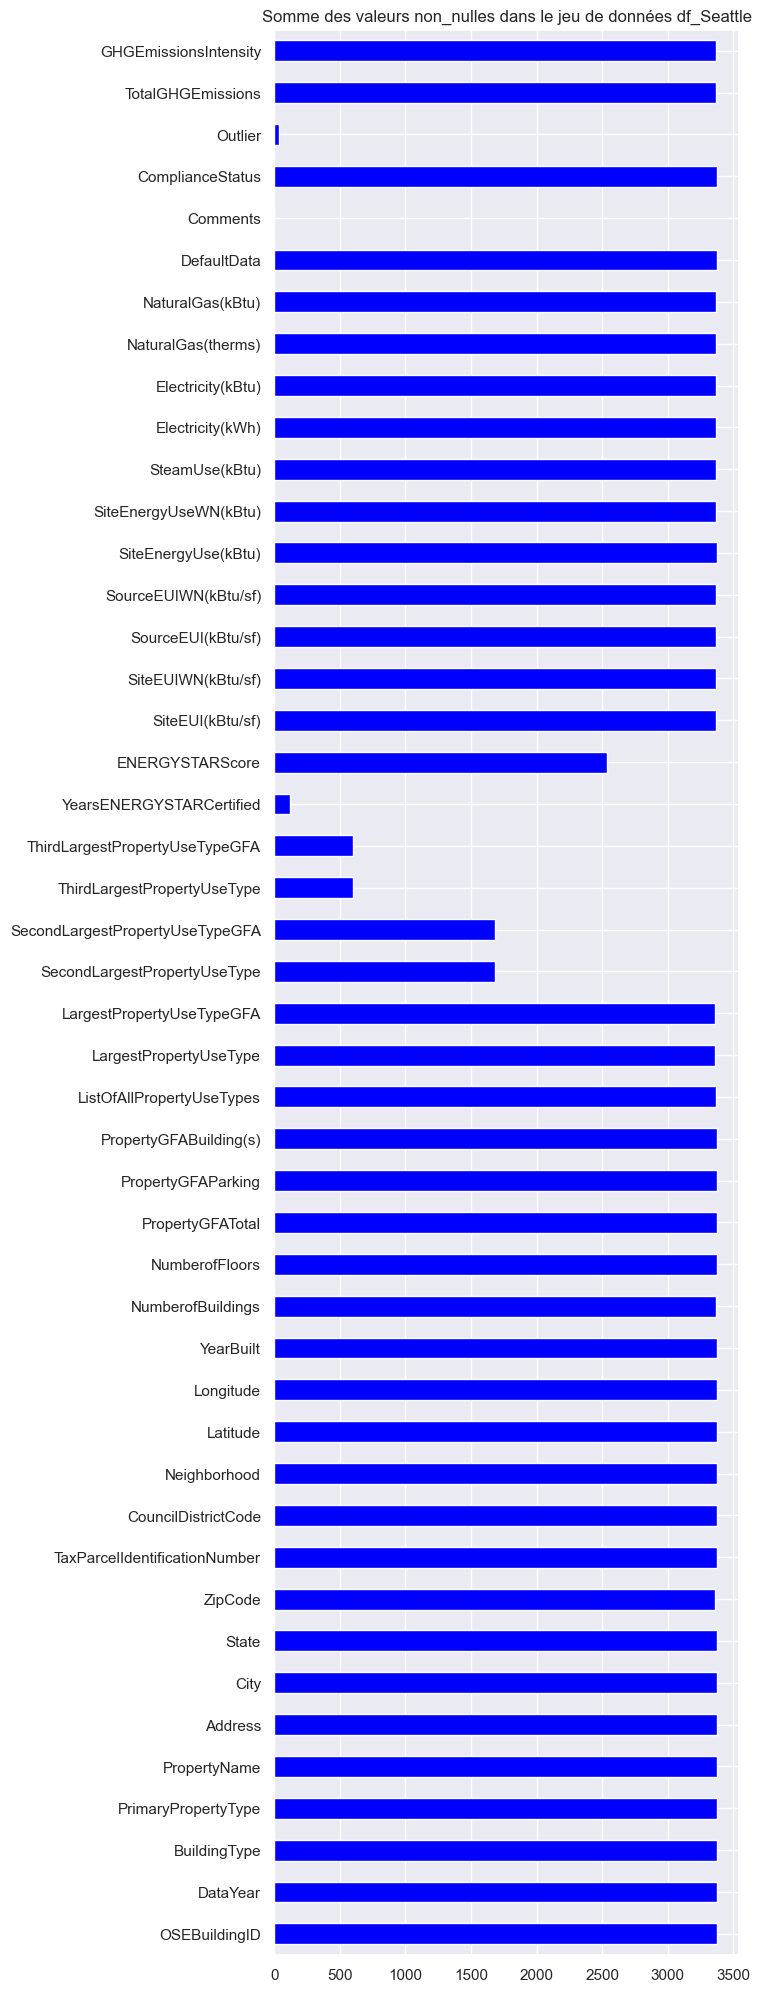

In [11]:
# visualisation de la somme des valeurs non_nulles dans le jeu de données df_Seattle pour chaque variable
valeur_non_nulle = df_Seattle.notnull().sum()
sns.set_theme()
figure = valeur_non_nulle.plot(kind='barh',figsize=(6, 25),color='blue')
figure.set_title("Somme des valeurs non_nulles dans le jeu de données df_Seattle", fontsize=12)

Text(0.5, 1.0, '% Valeurs non nulles dans le jeu de données df_food')

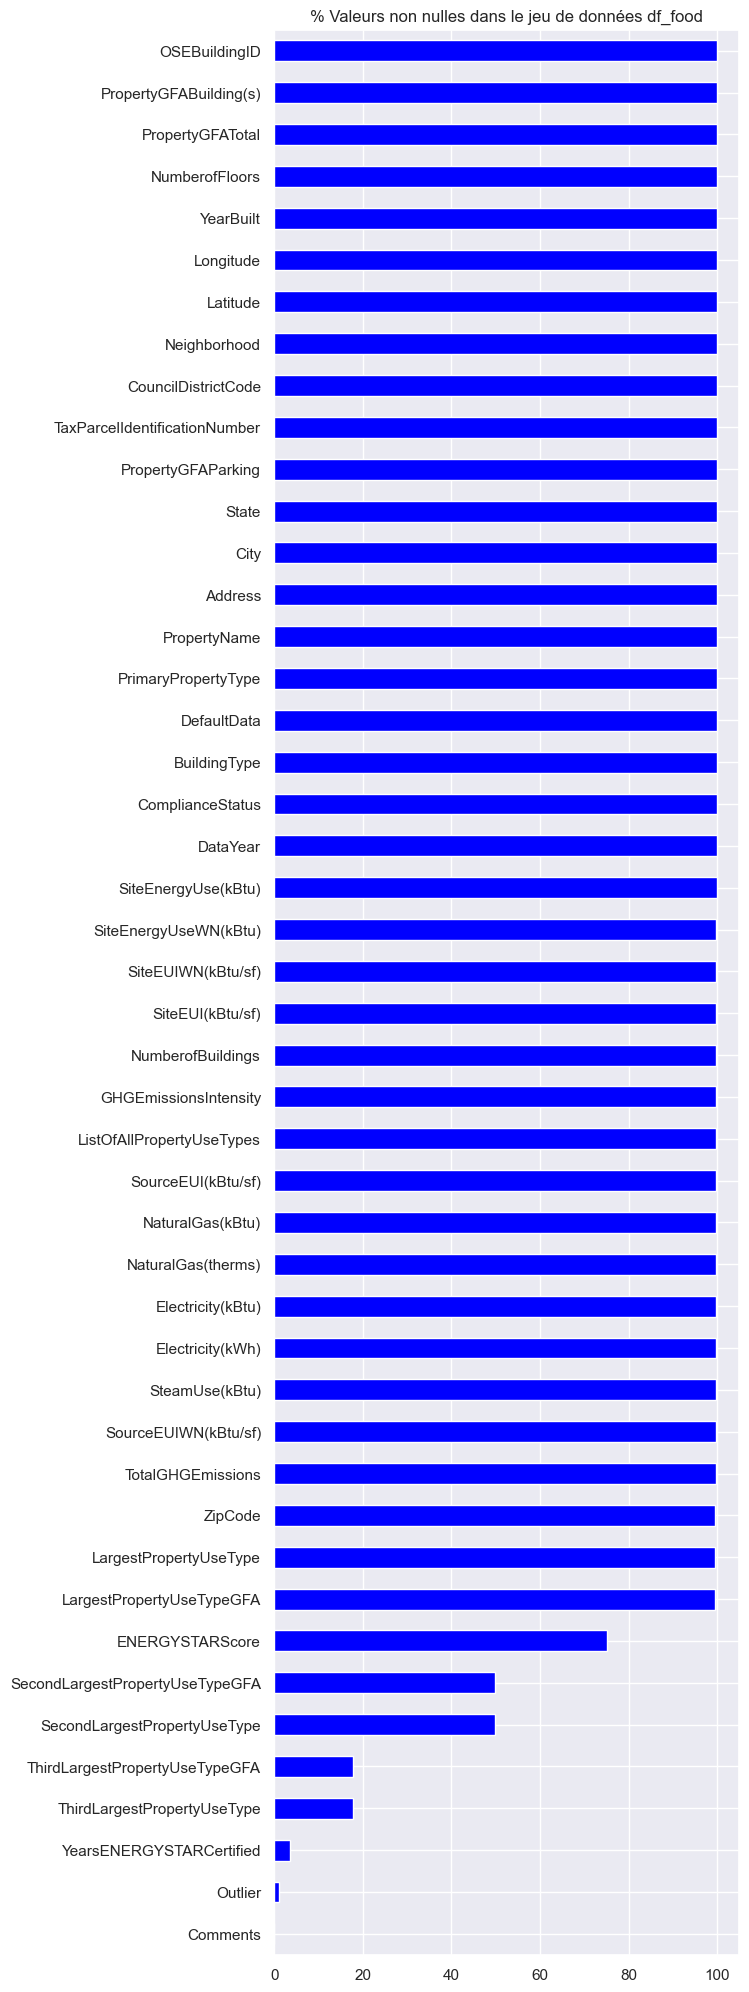

In [12]:
# visualisation du pourcentage de Valeurs manquantes dans le jeu de données df_Seattle
sns.set_theme()
taille = df_Seattle.shape
valeurs_notnull = df_Seattle.notnull().sum()
valeurs_notnull = valeurs_notnull.sort_values(ascending=True)*100/taille[0]
figure = valeurs_notnull.plot(kind='barh',figsize=(6, 25),color='blue')
figure.set_title("% Valeurs non nulles dans le jeu de données df_food")

###  Filtrage du jeu de données

In [13]:
# Chercher les colonnes vides 
colonne_vide = [colonne for colonne in df_Seattle.columns if df_Seattle[colonne].isnull().all()]
colonne_vide

['Comments']

In [14]:
# Ne garder que les colonnes qui contiennent 15 % ou plus de données

df_Seattle = df_Seattle.dropna(how='any',axis=1,thresh=df_Seattle.shape[0]*0.15)

In [15]:
# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)

print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (3376, 43)


### variables catégorielles

In [16]:
# Afficher les variables catégorielles 

variables_catégorielles = df_Seattle.select_dtypes(include=['O']).columns.tolist()
variables_catégorielles

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'TaxParcelIdentificationNumber',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'ComplianceStatus']

In [17]:
# Examiner le contenu des variables catégorielles

for variable in variables_catégorielles:
    print('-'*80)
    print(variable, ':')
    print('')
    print(df_Seattle[variable].unique())
    print('-'*80)

--------------------------------------------------------------------------------
BuildingType :

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
PrimaryPropertyType :

['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office']
--------------------------------------------------------------------------------
---------------------------------------

##### ComplianceStatus


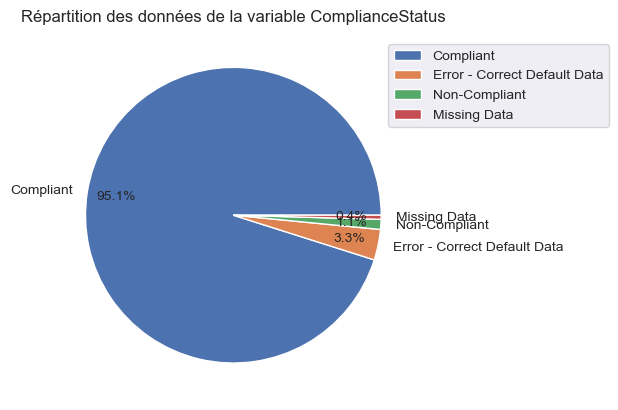

In [18]:
# Répartition des données de la variable ComplianceStatus
sns.set_theme()
df_Seattle['ComplianceStatus'].value_counts().plot(kind='pie',autopct='%1.1f%%', pctdistance = 0.80, fontsize=10,
                                   title="Répartition des données de la variable ComplianceStatus",
                                   legend=False, label="")

ax = plt.gca()
ax.legend(loc="center left",
          fontsize=10,
          bbox_to_anchor=(0.9, 0.2, 0.5, 1.3))
plt.show()

La colonne ComplianceStatus contient des données sur la confirmité des données :

-- 'Compliant' 

-- 'Error - Correct Default Data' 

-- 'Missing Data' 

-- 'Non-Compliant'

on va garder seulement les données conforme.


In [19]:
# Garder seulement les données conformes
df_Seattle = df_Seattle[df_Seattle['ComplianceStatus'] == "Compliant"]

# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (3211, 43)


Diminution du nombre des lignes de 3376 à 3211.

##### City et State 
City : ['Seattle']

State : ['WA']

Tous les batiments sont à 'seattle' dans "Washington state" (WA) donc on peut supprimer ces deux colonnes 

In [20]:
# supprimer les deux colonnes 'City', 'State'
df_Seattle = df_Seattle.drop(columns =['City', 'State'])

# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (3211, 41)


##### BuildingType :

On va s'intéresser aux bâtiments non destinés à l’habitation.

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']

'SPS-District K-12': Le sigle K-12 (prononcé en anglais « k twelve », « k through twelve » ou « k to twelve ») est couramment employé aux États-Unis pour désigner l'ensemble du cursus scolaire, de la maternelle (Kindergarten) au secondaire (grade 12). Le terme s'est propagé au reste de l'anglosphère, dont les cursus nationaux sont apparentés(https://fr.wikipedia.org/wiki/K–12).

on va garder seulement les bâtiments  'NonResidential'

In [21]:
# bâtiments non destinés à l’habitation.
non_residential = ['NonResidential', 'Nonresidential COS', 'Nonresidential WA', 'SPS-District K-12', 'Campus']

# on va selectionner les bâtiments non destinés à l’habitation (non_residential)
df_Seattle = df_Seattle[df_Seattle['BuildingType'].isin(non_residential)]

# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")


Nombre de (lignes, colonnes) = (1548, 41)


##### Neighborhood

['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'Central' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'CENTRAL' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']

In [22]:
# value_counts de la colonne 'Neighborhood'
df_Seattle['Neighborhood'].value_counts(dropna=False).to_frame()

Neighborhood
DOWNTOWN                         351
GREATER DUWAMISH                 328
MAGNOLIA / QUEEN ANNE            144
LAKE UNION                       143
NORTHEAST                        117
EAST                             116
NORTHWEST                         74
BALLARD                           58
NORTH                             51
CENTRAL                           42
DELRIDGE                          36
SOUTHWEST                         31
SOUTHEAST                         31
North                              8
Ballard                            5
Delridge                           4
Northwest                          4
Central                            4
DELRIDGE NEIGHBORHOODS             1

In [23]:
# on va remplacer 'DELRIDGE NEIGHBORHOODS' par 'DELRIDGE'
df_Seattle['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)

# on va corriger quelques répétitions 
df_Seattle.loc[df_Seattle['Neighborhood'] == 'Northwest', 'Neighborhood'] = 'NORTHWEST'

# on va corriger le reste des répétitions avec la méthode ".str.upper()" 
df_Seattle['Neighborhood'] = df_Seattle['Neighborhood'].str.upper()

# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")


Nombre de (lignes, colonnes) = (1548, 41)


In [24]:
# vérifier le contenu de la colonne 'Neighborhood' après les traitement 
df_Seattle['Neighborhood'].value_counts(dropna=False).to_frame()

Neighborhood
DOWNTOWN                        351
GREATER DUWAMISH                328
MAGNOLIA / QUEEN ANNE           144
LAKE UNION                      143
NORTHEAST                       117
EAST                            116
NORTHWEST                        78
BALLARD                          63
NORTH                            59
CENTRAL                          46
DELRIDGE                         41
SOUTHWEST                        31
SOUTHEAST                        31

#### PropertyType et PropertyUseTypes

In [25]:
# afficher les variables catégorielles
variables_catégorielles

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'TaxParcelIdentificationNumber',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'ComplianceStatus']

Pour les catégories PropertyType et PropertyUseTypes on va selectionner 'PrimaryPropertyType' dans la catégorie 'PropertyType' et 'LargestPropertyUseType' dans la catégorie 'PropertyUseType'


In [26]:
# supprimer les colonnes 'ListOfAllPropertyUseTypes', 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType':
df_Seattle = df_Seattle.drop(columns =['ListOfAllPropertyUseTypes', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'])

In [27]:
# value_counts des deux variables 'PrimaryPropertyType', 'LargestPropertyUseType'
Property_Type = ['PrimaryPropertyType', 'LargestPropertyUseType']
for variable in Property_Type:
    print('-'*60)
    print(variable)
    print('-'*60)
    print(df_Seattle[variable].value_counts(dropna=False))
    print('-'*60)

------------------------------------------------------------
PrimaryPropertyType
------------------------------------------------------------
Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office                   169
Mixed Use Property             113
Retail Store                    85
Hotel                           75
Worship Facility                69
Distribution Center             53
K-12 School                     50
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64
------------------------------------------------------------
----------------------

In [28]:
# Harmoniser quelques valeurs de PrimaryPropertyType avec 'LargestPropertyUseType'
df_Seattle.loc[df_Seattle['PrimaryPropertyType'] == 'Supermarket / Grocery Store', 'PrimaryPropertyType'] = 'Supermarket/Grocery Store'
df_Seattle.loc[df_Seattle['PrimaryPropertyType'] == 'Residence Hall', 'PrimaryPropertyType'] = 'Residence Hall/Dormitory'

In [29]:
# Créer un dictionnaire d'harmonisation pour:
# harmoniser et simplifier le maximum des valeurs de PrimaryPropertyType et 'LargestPropertyUseType'
Harmonization_Dictionary = {'Hotel':'tourism',
                            "Other - Restaurant/Bar" : 'tourism',
                            "Other - Lodging/Residential" : 'tourism',
                            "Multifamily Housing" : 'tourism',
                            "Movie Theater" : 'tourism',
                            "Residence Hall/Dormitory": 'tourism',
                            "Wholesale Club/Supercenter" : 'Retail Store',
                            "Retail" : 'Retail Store',
                            "Food Service" : 'Restaurant',
                            "Residential Care Facility" : 'Personal Services',
                            "Hospital (General Medical & Surgical)" : "public health",
                            'Hospital' : "public health",
                            'Urgent Care/Clinic/Other Outpatient' : "public health",
                            "Medical Office" : "public health",
                            "Other - Education" : "Education",
                            "Library" : "Education",
                            "K-12 School" : "Education",
                            "Adult Education" : "Education",
                            "Pre-school/Daycare" : "Education",
                            "College/University" : "Education",
                            "University" : "Education",
                            "Other/Specialty Hospital" : "public health",
                            "Other - Mall" : 'Other',         
                            "Data Center" : 'Other',
                            "Other - Utility" : 'Other',
                            "Fire Station" : 'Other - Services',
                            "Other - Public Services" : "Public Services",
                            'Courthouse' : "Public Services",
                            'Prison/Incarceration' : "Public Services",
                            "Other - Entertainment/Public Assembly" : "Public Services",
                            "Police Station" : "Public Services",
                            "Personal Services (Health/Beauty, Dry Cleaning, etc)" : 'Personal Services',
                            "Lifestyle Center" : 'Personal Services',
                            "Performing Arts" : 'Personal Services'
                            }
for variable in Property_Type:
    df_Seattle[variable] =df_Seattle[variable].replace(Harmonization_Dictionary)

In [30]:
# value_counts des deux variables 'PrimaryPropertyType', 'LargestPropertyUseType'
Property_Type = ['PrimaryPropertyType', 'LargestPropertyUseType']
for variable in Property_Type:
    print('-'*60)
    print(variable)
    print('-'*60)
    print(df_Seattle[variable].value_counts(dropna=False))
    print('-'*60)

------------------------------------------------------------
PrimaryPropertyType
------------------------------------------------------------
Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office                   169
Mixed Use Property             113
tourism                         96
Retail Store                    85
Education                       74
Worship Facility                69
Distribution Center             53
public health                   49
Supermarket/Grocery Store       40
Self-Storage Facility           28
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
LargestPropertyUseType
-------------------------------------------

In [31]:
# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (1548, 38)


In [32]:
# Afficher les 5 premières lignes du jeu de données df_Seattle

df_Seattle.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential             tourism   
1              2      2016  NonResidential             tourism   
2              3      2016  NonResidential             tourism   
3              5      2016  NonResidential             tourism   
4              8      2016  NonResidential             tourism   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  ...  \
0                    0659000030                    7     DOWNTOWN  ...   
1                    0659000220                    7     DOWNTOWN  ...   
2                    0659000475                    7     DOWNTOWN  ...   
3                    0659000640                    7     DOWNTOWN  ...   
4                    0659000970                    7     DOWNTOWN  ...   

   SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  \
0              7456910.0      2003882.00      1.156514e+06          3946027.0   
1              8664479.0            0.00      9.504252e+05          3242851.0   
2             73937112.0     21566554.00      1.451544e+07         49526664.0   
3              6946800.5      2214446.25      8.115253e+05          2768924.0   
4             14656503.0            0.00      1.573449e+06          5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  ComplianceStatus  \
0         12764.52930         1276453.0        False         Compliant   
1         51450.81641         5145082.0        False         Compliant   
2         14938.00000         1493800.0        False         Compliant   
3         18112.13086         1811213.0        False         Compliant   
4         88039.98438         8803998.0        False         Compliant   

  TotalGHGEmissions  GHGEmissionsIntensity  
0            249.98                   2.83  
1            295.86                   2.86  
2           2089.28                   2.19  
3            286.43                   4.67  
4            505.01                   2.88  

[5 rows x 38 columns]

### variables quantitatives

In [33]:
# Afficher les variables quantitatives 
variables_quantitatives = df_Seattle.select_dtypes(exclude=['O']).columns.tolist()
variables_quantitatives

['OSEBuildingID',
 'DataYear',
 'ZipCode',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

- GFA gross floor area ==> surface brute
- EUI ==> Energy Use Intensity ==> Consommation d'énergie 
- kBtu ==> British thermal unit
- sf ==> unité pour mesurer des surfaces immobilières.
- WN ==>  Weather Normalization normalisation avec les conditions climatiques.
- therms ==> unité d'énergie égale à 100 000 British thermal unit (BTU).
- TotalGHGEmissions ==> Greenhouse gas emissions ==> Emissions de CO2 

In [34]:
# Examiner le contenu des variables quantitatives
for variable in variables_quantitatives:
    print('-'*80)
    print(variable, ':')
    print('')
    print(df_Seattle[variable].describe())
    print('-'*80)

--------------------------------------------------------------------------------
OSEBuildingID :

count     1548.000000
mean     16497.944444
std      13827.877766
min          1.000000
25%        602.750000
50%      21180.500000
75%      24609.000000
max      50226.000000
Name: OSEBuildingID, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DataYear :

count    1548.0
mean     2016.0
std         0.0
min      2016.0
25%      2016.0
50%      2016.0
75%      2016.0
max      2016.0
Name: DataYear, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
ZipCode :

count     1535.000000
mean     98116.776547
std         18.695570
min      98006.000000
25%      98104.000000
50%      98109.000000
75%      98125.000000
max      98199.000000
Name: Zi

DataYear : [2016]

Toutes les données ont été obtenues en 2016 donc on peut supprimer cette colonne.

In [35]:
# supprimer la colonne 'DataYear'
df_Seattle = df_Seattle.drop(['DataYear'], axis=1)

# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (1548, 37)


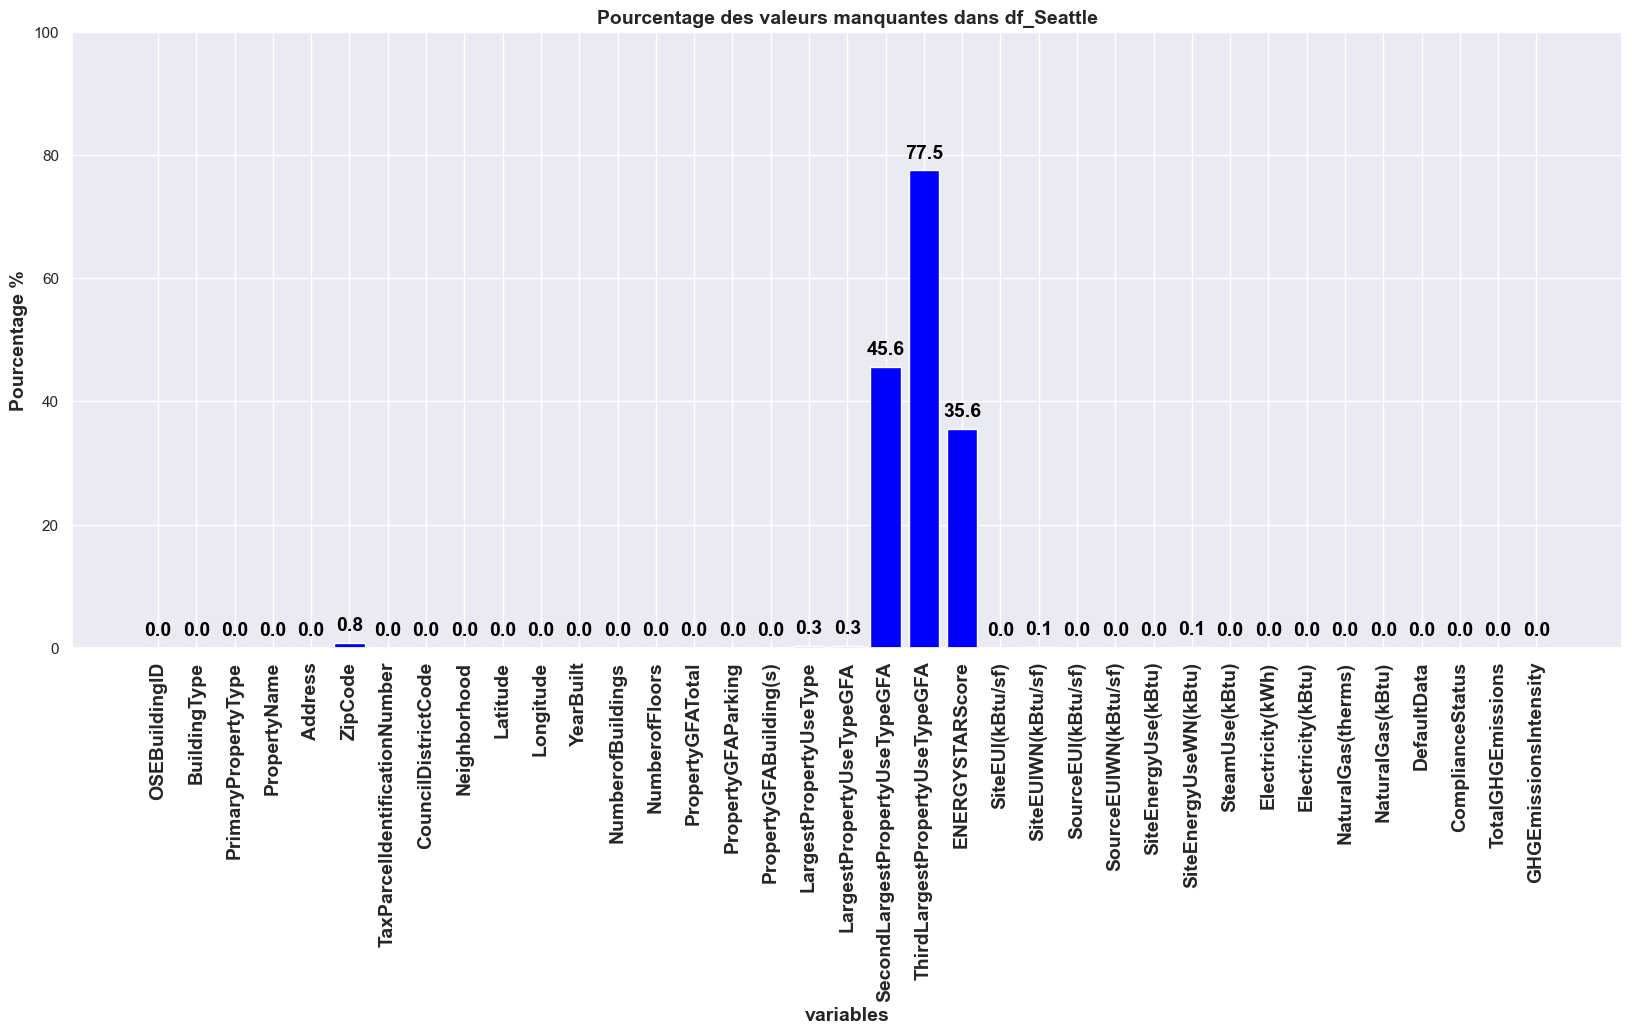

In [36]:
# Représentation graphique du pourcentage des valeurs manquantes pour chaque variable

sns.set_theme()
plt.figure(figsize=(20,8))
df_nan = (df_Seattle.isna().mean()*100).round(1)
barplot=plt.bar(df_nan.keys(), df_nan.values, color="blue")
plt.bar_label(barplot, labels=df_nan.values, label_type= "edge", 
              weight='bold', padding=6, color= 'black', fontsize=14)
plt.xticks(rotation=90, weight='bold', fontsize=14)
plt.ylim([0,100])
plt.ylabel("Pourcentage %", weight='bold', fontsize=14)
plt.xlabel('variables', weight='bold', fontsize=14)
plt.title('Pourcentage des valeurs manquantes dans df_Seattle', weight='bold', fontsize=14)
plt.show()


On peut supprimer la colonne zipcode qui n'est pas complète, la colonne adresse et garder les variables Latitude et Longitude pour bien localiser les batiment et les utiliser éventuellement avec folium, on peut supprimer 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA'respectivement (45% et 77% de valeurs manquantes),'TaxParcelIdentificationNumber', 'ComplianceStatus'(après le filtrage il reste la valeur 'Compliant' uniquement), on supprime 'OSEBuildingID' et'CouncilDistrictCode' également.

In [37]:
# colonnes à supprimer 
df_Seattle = df_Seattle.drop(columns =['Address', 
                                       'ZipCode', 
                                       'SecondLargestPropertyUseTypeGFA', 
                                       'ThirdLargestPropertyUseTypeGFA', 
                                       'TaxParcelIdentificationNumber', 
                                       'ComplianceStatus',
                                       'OSEBuildingID',
                                       'CouncilDistrictCode'])
# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (1548, 29)


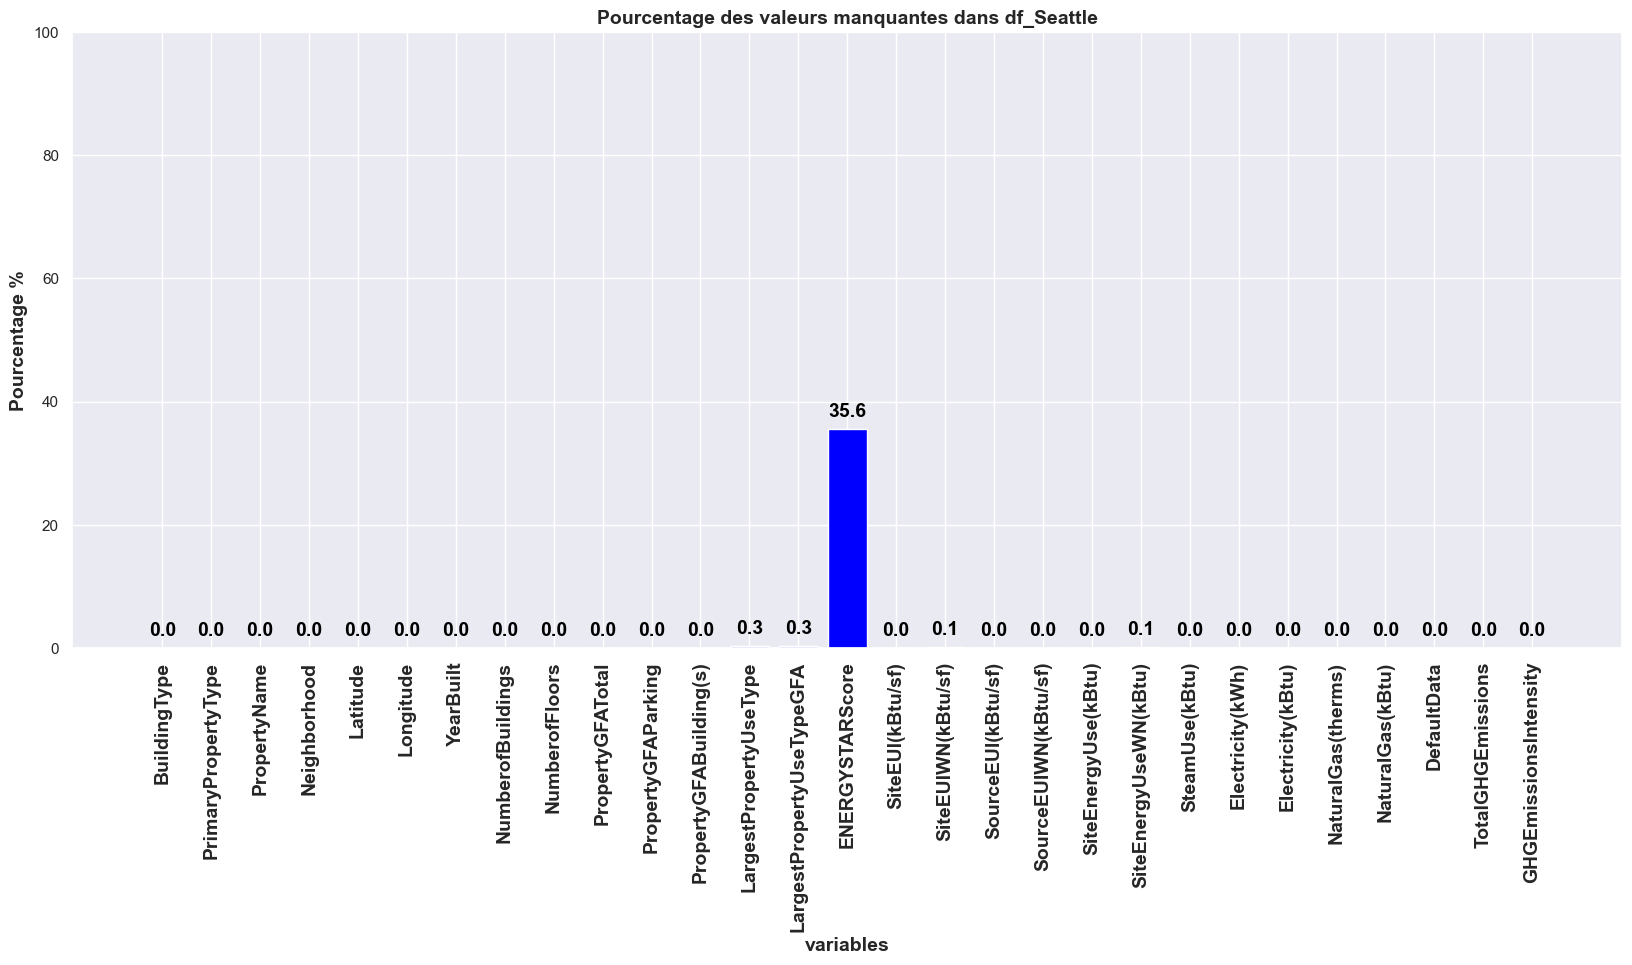

In [38]:
# Représentation graphique du pourcentage des valeurs manquantes pour chaque variable
sns.set_theme()
plt.figure(figsize=(20,8))
df_nan = (df_Seattle.isna().mean()*100).round(1)
barplot=plt.bar(df_nan.keys(), df_nan.values, color="blue")
plt.bar_label(barplot, labels=df_nan.values, label_type= "edge", 
              weight='bold', padding=6, color= 'black', fontsize=14)
plt.xticks(rotation=90, weight='bold', fontsize=14)
plt.ylim([0,100])
plt.ylabel("Pourcentage %", weight='bold', fontsize=14)
plt.xlabel('variables', weight='bold', fontsize=14)
plt.title('Pourcentage des valeurs manquantes dans df_Seattle', weight='bold', fontsize=14)
plt.show()


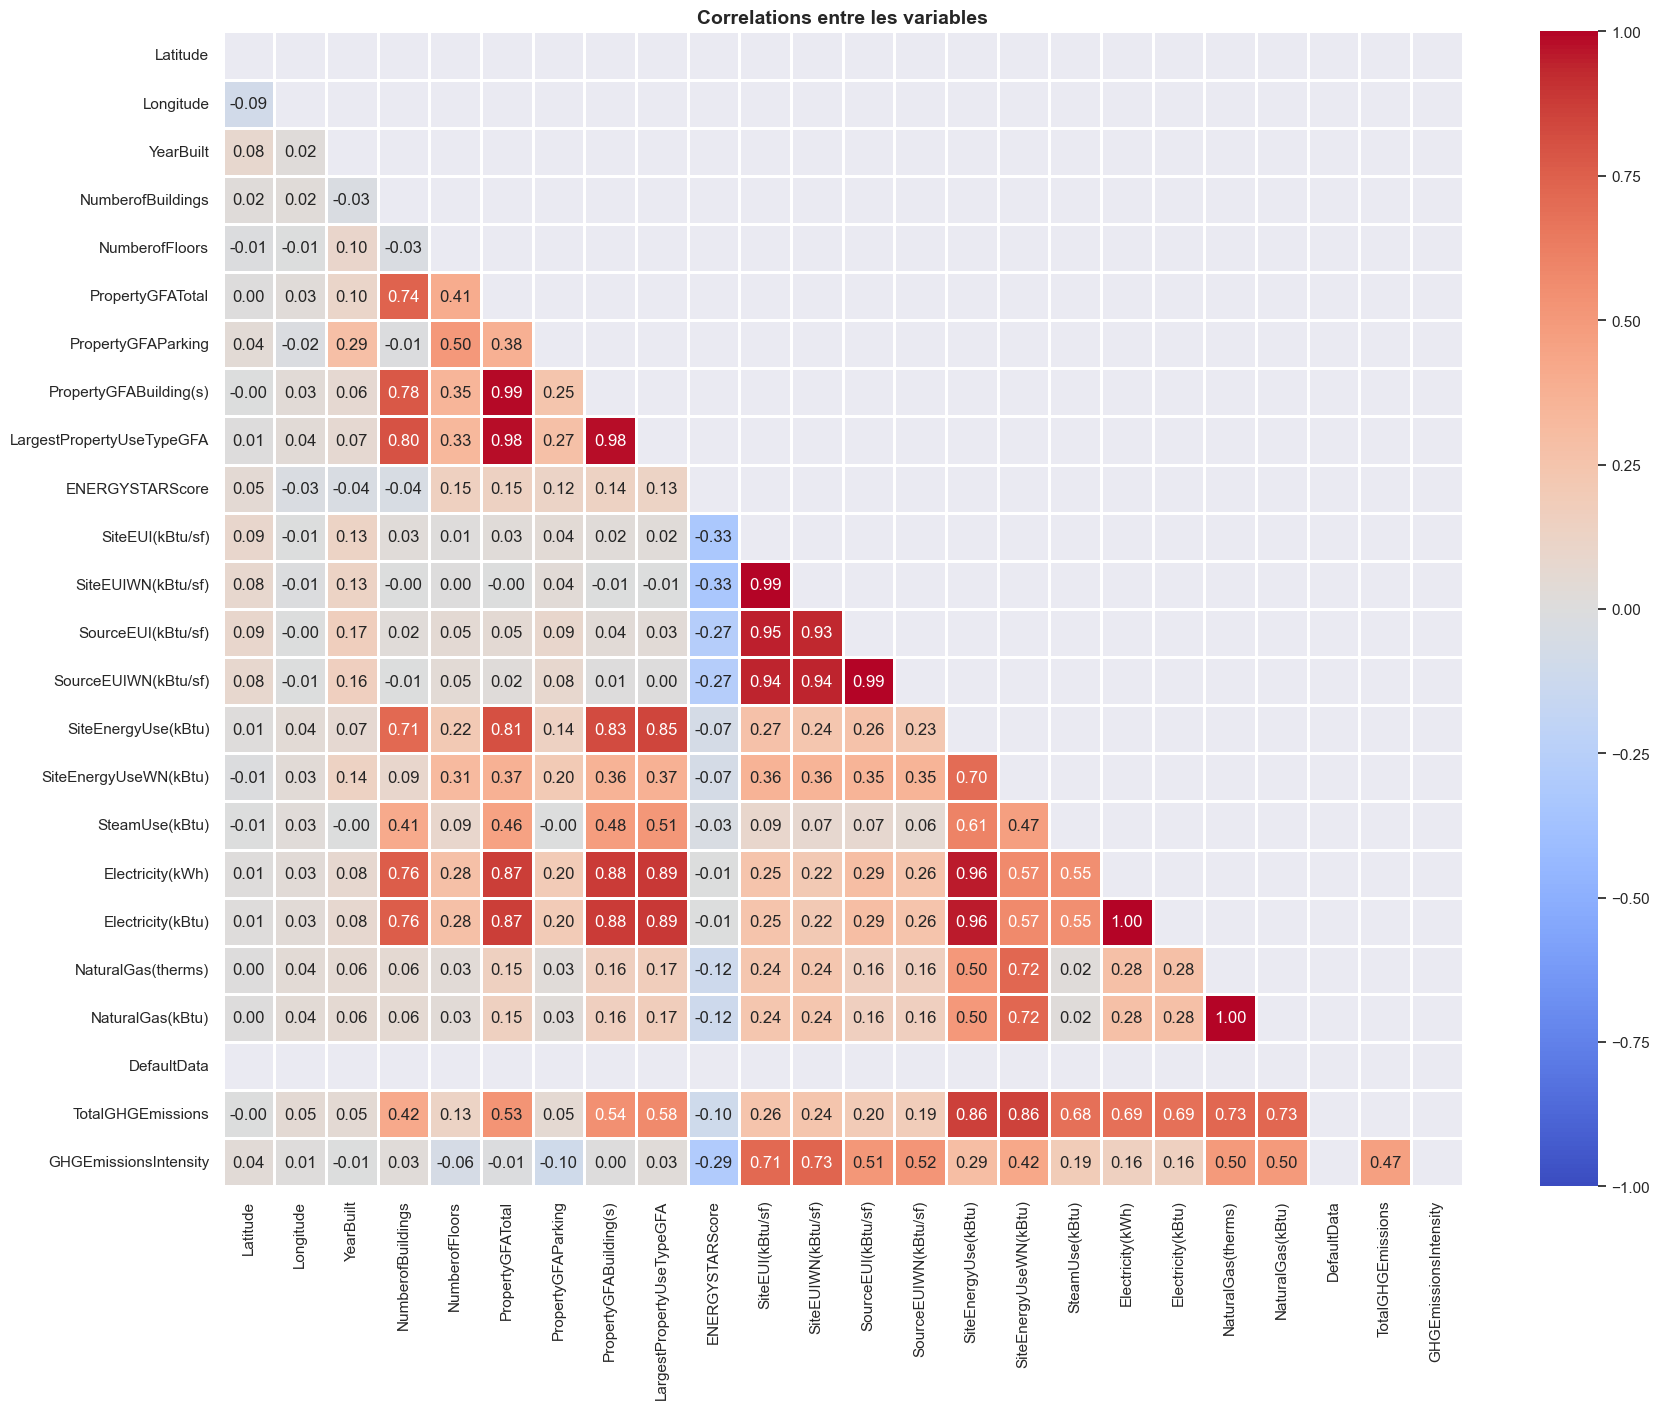

In [39]:
# Correlations entre les variables
def correlation(df_final):
    plt.figure(figsize=(20,15))
    mask = np.triu(np.ones_like(df_Seattle.corr(), dtype=bool))
    sns.heatmap(df_Seattle.corr(), mask=mask, cmap="coolwarm", center=0,
               linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlations entre les variables', fontsize=14, fontweight='bold')
    plt.show()
correlation(df_Seattle)

In [40]:
# Afficher les variables quantitatives 
variables_quantitatives = df_Seattle.select_dtypes(exclude=['O']).columns.tolist()
variables_quantitatives

['Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

Lorsque une corrélation est trop élevée, cela signifie que ces différentes variables portent essentiellement la même information, et qu’une seule doit être conservée. Le seuil de corrélation à choisir dépend des données, mais peut être choisi empiriquement. On va considérer que les varaibles sont redondantes au-delà de 95% de corrélation.
voir : https://kobia.fr/automatiser-la-reduction-des-correlations-par-clustering/

- La variable 'PropertyGFATotal' est corrélée avec la variable 'PropertyGFABuilding(s) avec un pourcentage de corrélation quasi-total de 99% et 'PropertyGFABuilding(s)' (98%), on peut donc supprimer 'PropertyGFABuilding(s)' et 'LargestPropertyUseTypeGFA.

- La variable 'SiteEUI(kBtu/sf)' est corrélée avec la variable 'SiteEUIWN(kBtu/sf)' avec un pourcentage de corrélation quasi-total de 99% en plus cette variable'SiteEUIWN(kBtu/sf)' (comme 'SiteEnergyUseWN(kBtu)')n'est pas complètement remplie d'après la représentation graphique du pourcentage des valeurs manquantes. 
'SiteEUI(kBtu/sf)' est également corrélées avec 'SourceEUI(kBtu/sf)'(95%). On peut donc supprimer 'SiteEUIWN(kBtu/sf)' et 'SourceEUI(kBtu/sf)'.
 
- La variable 'SourceEUI(kBtu/sf)' est corrélée avec la variable 'SourceEUIWN(kBtu/sf)' avec un pourcentage de corrélation quasi-total de 99% on peut donc supprimer 'SourceEUIWN(kBtu/sf)'.

- 'Electricity(kWh)' est 100% corrélée avec 'Electricity(kBtu)'.
'SiteEnergyUse(kBtu)' est corrélée avec ces deux variables 'Electricity(kWh)' et 'Electricity(kBtu)' avec un pourcentage de corrélation de 96% on peut donc supprimer 'Electricity(kWh)'.

- 'NaturalGas(kBtu)'est 100% corrélée avec 'NaturalGas(therms)' on va garder 'NaturalGas(kBtu)' (kBtu est la même  unité que 'SiteEnergyUse(kBtu)'.
- On va supprimer 'DefaultData' également.

In [41]:
# supprimer les colonnes 'PropertyGFABuilding(s)' et 'LargestPropertyUseTypeGFA'
df_Seattle = df_Seattle.drop(columns =['PropertyGFABuilding(s)', 
                                       'LargestPropertyUseTypeGFA', 
                                       'SiteEUIWN(kBtu/sf)',
                                       'SiteEnergyUseWN(kBtu)',
                                       'SourceEUI(kBtu/sf)', 
                                       'SourceEUIWN(kBtu/sf)', 
                                       'Electricity(kWh)', 
                                       'NaturalGas(therms)',
                                       'DefaultData'])

In [42]:
# pourcentage des valeurs manquantes pour chaque variable
df_Seattle.isna().mean()*100

BuildingType               0.000000
PrimaryPropertyType        0.000000
PropertyName               0.000000
Neighborhood               0.000000
Latitude                   0.000000
Longitude                  0.000000
YearBuilt                  0.000000
NumberofBuildings          0.000000
NumberofFloors             0.000000
PropertyGFATotal           0.000000
PropertyGFAParking         0.000000
LargestPropertyUseType     0.258398
ENERGYSTARScore           35.594315
SiteEUI(kBtu/sf)           0.000000
SiteEnergyUse(kBtu)        0.000000
SteamUse(kBtu)             0.000000
Electricity(kBtu)          0.000000
NaturalGas(kBtu)           0.000000
TotalGHGEmissions          0.000000
GHGEmissionsIntensity      0.000000
dtype: float64

Pour les valeurs manquantes il nous reste le traitement des NaN des deux variables 'LargestPropertyUseType' (qu'on va traiter dans la partie suivante) et 'ENERGYSTARScore' (à ce stade on va garder les valeurs NaN de la variable 'ENERGYSTARScore').

### Traitement des valeurs manquantes de la variable 'LargestPropertyUseType'

In [43]:
# value_counts de la variable 'LargestPropertyUseType'
print('-'*55)
print('LargestPropertyUseType')
print('-'*55)
print(df_Seattle['LargestPropertyUseType'].value_counts(dropna=False))
print('-'*55)

-------------------------------------------------------
LargestPropertyUseType
-------------------------------------------------------
Office                                             485
Non-Refrigerated Warehouse                         197
tourism                                            116
Other                                              104
Retail Store                                        94
Education                                           85
Worship Facility                                    69
public health                                       59
Distribution Center                                 54
Supermarket/Grocery Store                           41
Other - Recreation                                  31
Parking                                             30
Public Services                                     28
Self-Storage Facility                               27
Senior Care Community                               20
Restaurant                              

In [44]:
# Afficher les lignes avec 'LargestPropertyUseType'] = NaN
nan_LargestPropertyUseType = df_Seattle[df_Seattle['LargestPropertyUseType'].isna()]
nan_LargestPropertyUseType

BuildingType          PrimaryPropertyType  \
353   NonResidential        Self-Storage Facility   
1147  NonResidential                      tourism   
2414  NonResidential  Small- and Mid-Sized Office   
2459  NonResidential                   Restaurant   

                          PropertyName Neighborhood  Latitude  Longitude  \
353                   Market St Center      BALLARD  47.66838 -122.39310   
1147                   Palladian Hotel     DOWNTOWN  47.61203 -122.34165   
2414               Talon Northlake LLC   LAKE UNION  47.64747 -122.34086   
2459  BUSH GARDEN - RESTURANT & LOUNGE     DOWNTOWN  47.59697 -122.32474   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
353        1946                2.0               2            111445   
1147       1910                1.0               8             61721   
2414       2008                1.0               4             48350   
2459       1913                1.0               3             28800   

      PropertyGFAParking LargestPropertyUseType  ENERGYSTARScore  \
353                    0                    NaN              NaN   
1147                   0                    NaN             93.0   
2414                   0                    NaN             45.0   
2459                   0                    NaN              NaN   

      SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
353          47.799999         5.697472e+06             0.0   
1147         52.200001         2.897080e+06             0.0   
2414         72.199997         3.168131e+06             0.0   
2459         31.200001         8.999242e+05             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
353           3007514.0         2689958.0             163.83   
1147          2534592.0          362488.0              36.92   
2414          3168131.0               0.0              22.09   
2459           402907.0          497017.0              29.21   

      GHGEmissionsIntensity  
353                    1.47  
1147                   0.60  
2414                   0.46  
2459                   1.01

In [45]:
# on va remplacer les valeur NaN de la colonne 'LargestPropertyUseType'  en fonction de 'PrimaryPropertyType' 

df_Seattle.loc[:, 'LargestPropertyUseType']= df_Seattle['LargestPropertyUseType'].fillna(df_Seattle['PrimaryPropertyType'])

In [46]:
# value_counts de la variable 'LargestPropertyUseType' après le traitement des valeurs manquantes
print('-'*55)
print('LargestPropertyUseType')
print('-'*55)
print(df_Seattle['LargestPropertyUseType'].value_counts(dropna=False))
print('-'*55)

-------------------------------------------------------
LargestPropertyUseType
-------------------------------------------------------
Office                                             485
Non-Refrigerated Warehouse                         197
tourism                                            117
Other                                              104
Retail Store                                        94
Education                                           85
Worship Facility                                    69
public health                                       59
Distribution Center                                 54
Supermarket/Grocery Store                           41
Other - Recreation                                  31
Parking                                             30
Self-Storage Facility                               28
Public Services                                     28
Senior Care Community                               20
Restaurant                              

In [47]:
# pourcentage des valeurs manquantes pour chaque variable
df_Seattle.isna().mean()*100

BuildingType               0.000000
PrimaryPropertyType        0.000000
PropertyName               0.000000
Neighborhood               0.000000
Latitude                   0.000000
Longitude                  0.000000
YearBuilt                  0.000000
NumberofBuildings          0.000000
NumberofFloors             0.000000
PropertyGFATotal           0.000000
PropertyGFAParking         0.000000
LargestPropertyUseType     0.000000
ENERGYSTARScore           35.594315
SiteEUI(kBtu/sf)           0.000000
SiteEnergyUse(kBtu)        0.000000
SteamUse(kBtu)             0.000000
Electricity(kBtu)          0.000000
NaturalGas(kBtu)           0.000000
TotalGHGEmissions          0.000000
GHGEmissionsIntensity      0.000000
dtype: float64

In [48]:
# on affiche les mêmes lignes pour vérifier que les traitements des NaN sont effectués
df_Seattle.loc[[353, 1147, 2414, 2459]]

BuildingType          PrimaryPropertyType  \
353   NonResidential        Self-Storage Facility   
1147  NonResidential                      tourism   
2414  NonResidential  Small- and Mid-Sized Office   
2459  NonResidential                   Restaurant   

                          PropertyName Neighborhood  Latitude  Longitude  \
353                   Market St Center      BALLARD  47.66838 -122.39310   
1147                   Palladian Hotel     DOWNTOWN  47.61203 -122.34165   
2414               Talon Northlake LLC   LAKE UNION  47.64747 -122.34086   
2459  BUSH GARDEN - RESTURANT & LOUNGE     DOWNTOWN  47.59697 -122.32474   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
353        1946                2.0               2            111445   
1147       1910                1.0               8             61721   
2414       2008                1.0               4             48350   
2459       1913                1.0               3             28800   

      PropertyGFAParking       LargestPropertyUseType  ENERGYSTARScore  \
353                    0        Self-Storage Facility              NaN   
1147                   0                      tourism             93.0   
2414                   0  Small- and Mid-Sized Office             45.0   
2459                   0                   Restaurant              NaN   

      SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
353          47.799999         5.697472e+06             0.0   
1147         52.200001         2.897080e+06             0.0   
2414         72.199997         3.168131e+06             0.0   
2459         31.200001         8.999242e+05             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
353           3007514.0         2689958.0             163.83   
1147          2534592.0          362488.0              36.92   
2414          3168131.0               0.0              22.09   
2459           402907.0          497017.0              29.21   

      GHGEmissionsIntensity  
353                    1.47  
1147                   0.60  
2414                   0.46  
2459                   1.01

On constate que les NaN de la variable 'LargestPropertyUseType' sont bien remplacés par les catégories 'PrimaryPropertyType' correspondantes.

Il nous reste seulement les valeurs manquantes de la colonne 'ENERGYSTARScore'.

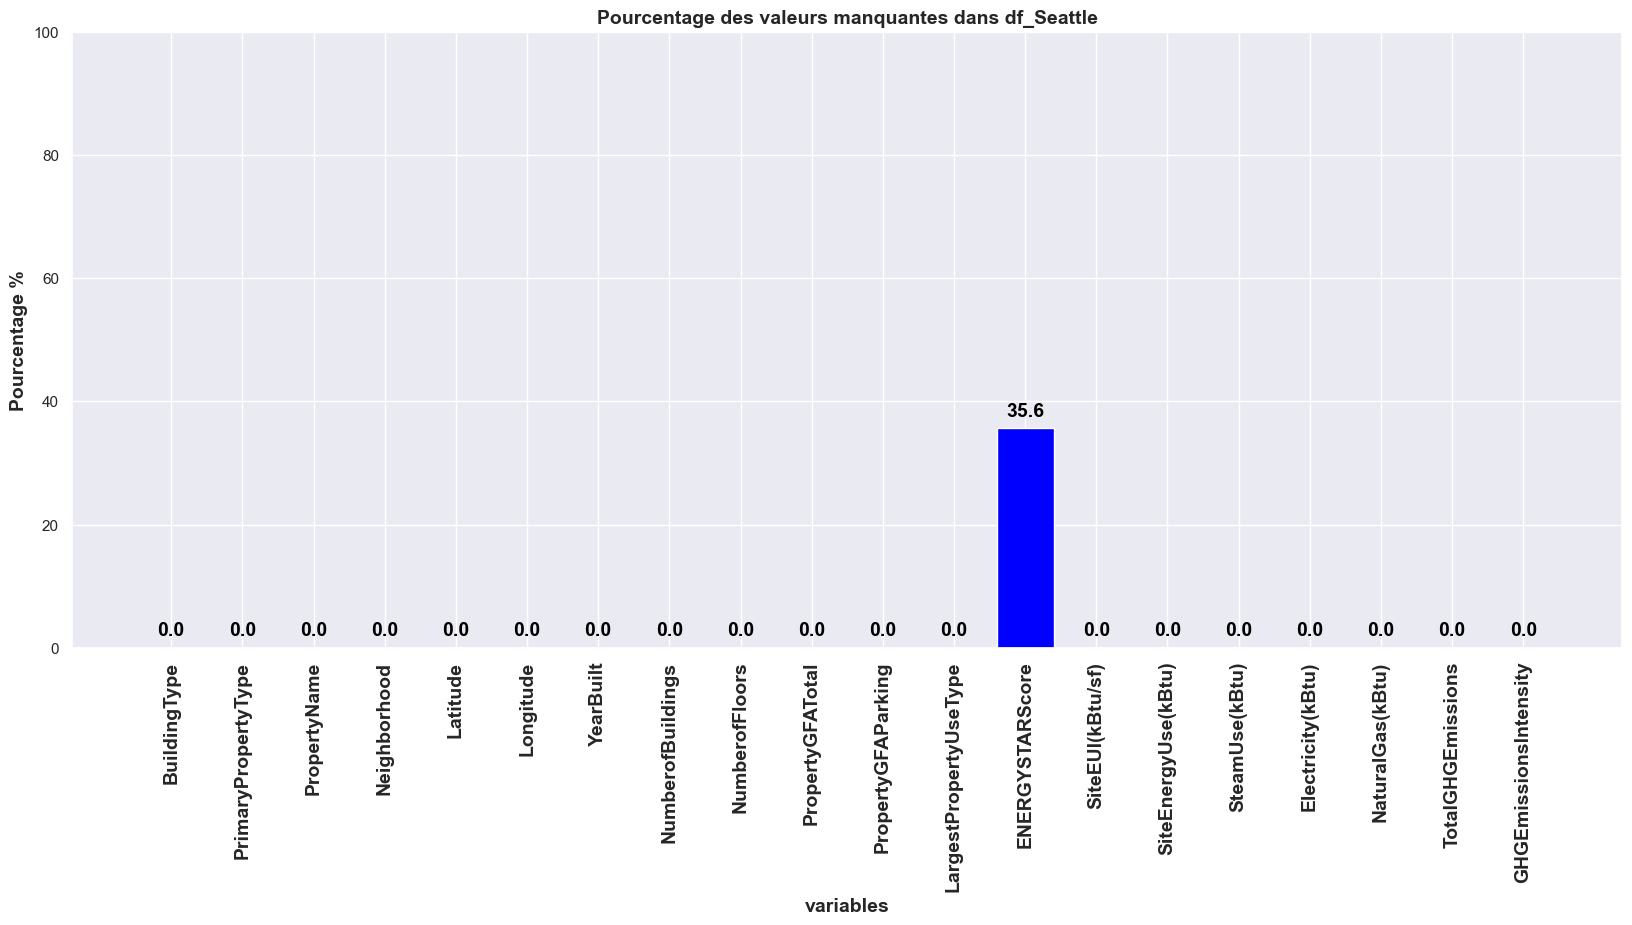

In [49]:
# Représentation graphique du pourcentage des valeurs manquantes pour chaque variable

sns.set_theme()
plt.figure(figsize=(20,8))
df_nan = (df_Seattle.isna().mean()*100).round(1)
barplot=plt.bar(df_nan.keys(), df_nan.values, color="blue")
plt.bar_label(barplot, labels=df_nan.values, label_type= "edge", 
              weight='bold', padding=6, color= 'black', fontsize=14)
plt.xticks(rotation=90, weight='bold', fontsize=14)
plt.ylim([0,100])
plt.ylabel("Pourcentage %", weight='bold', fontsize=14)
plt.xlabel('variables', weight='bold', fontsize=14)
plt.title('Pourcentage des valeurs manquantes dans df_Seattle', weight='bold', fontsize=14)
plt.show()


In [50]:
# Afficher les 5 premières lignes du jeu de données df_Seattle

df_Seattle.head()

BuildingType PrimaryPropertyType                 PropertyName  \
0  NonResidential             tourism         Mayflower park hotel   
1  NonResidential             tourism              Paramount Hotel   
2  NonResidential             tourism      5673-The Westin Seattle   
3  NonResidential             tourism                    HOTEL MAX   
4  NonResidential             tourism  WARWICK SEATTLE HOTEL (ID8)   

  Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN  47.61220 -122.33799       1927                1.0   
1     DOWNTOWN  47.61317 -122.33393       1996                1.0   
2     DOWNTOWN  47.61393 -122.33810       1969                1.0   
3     DOWNTOWN  47.61412 -122.33664       1926                1.0   
4     DOWNTOWN  47.61375 -122.34047       1980                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   
1              11            103566               15064   
2              41            956110              196718   
3              10             61320                   0   
4              18            175580               62000   

  LargestPropertyUseType  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                tourism             60.0         81.699997   
1                tourism             61.0         94.800003   
2                tourism             43.0         96.000000   
3                tourism             56.0        110.800003   
4                tourism             75.0        114.800003   

   SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0            7226362.5      2003882.00          3946027.0         1276453.0   
1            8387933.0            0.00          3242851.0         5145082.0   
2           72587024.0     21566554.00         49526664.0         1493800.0   
3            6794584.0      2214446.25          2768924.0         1811213.0   
4           14172606.0            0.00          5368607.0         8803998.0   

   TotalGHGEmissions  GHGEmissionsIntensity  
0             249.98                   2.83  
1             295.86                   2.86  
2            2089.28                   2.19  
3             286.43                   4.67  
4             505.01                   2.88

## Analyse Univariée

In [51]:
# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (1548, 20)


In [52]:
# Afficher les variables catégorielles 

variables_catégorielles = df_Seattle.select_dtypes(include=['O']).columns.tolist()
variables_catégorielles

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Neighborhood',
 'LargestPropertyUseType']

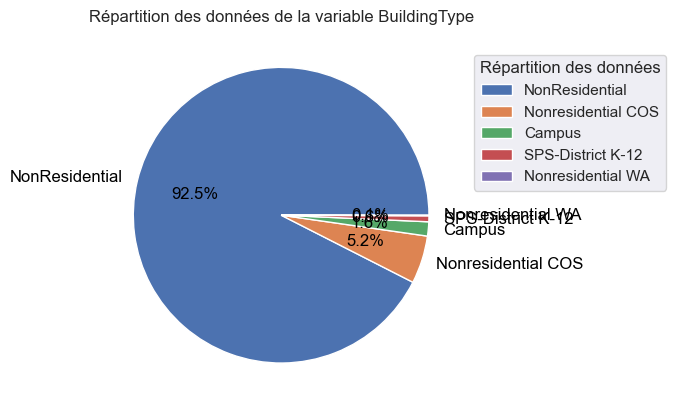

In [53]:
# Répartition des données de la variable BuildingType
plt.title('Répartition des données de la variable BuildingType', size=12)
wedges, texts, autotexts = plt.pie(df_Seattle['BuildingType'].value_counts(),
                                  labels = df_Seattle['BuildingType'].unique(),
                                   autopct='%1.1f%%', textprops={'fontsize': 12, 
                                     'color' : 'Black'})
    
ax = plt.gca()
sns.set_theme()
ax.legend(wedges, df_Seattle['BuildingType'].unique(),
          title='Répartition des données',
          loc="center left",
          fontsize=11,
          bbox_to_anchor=(1, 0, 1, 1.5))
plt.show()

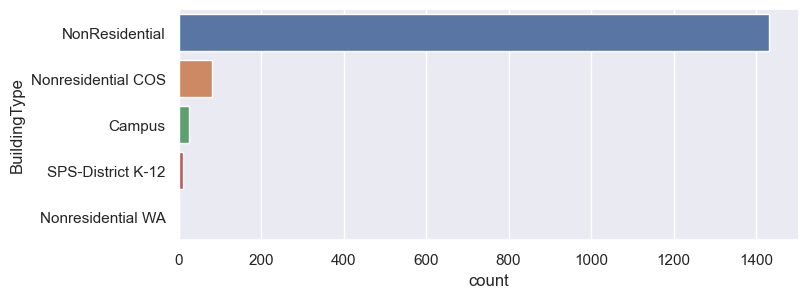

In [54]:
# visualisation de la répartition des données de la variable BuildingType 
plt.figure(figsize=(8, 3))
BuildingType = df_Seattle['BuildingType'].value_counts().index
sns.countplot(y='BuildingType', order=BuildingType, data=df_Seattle);

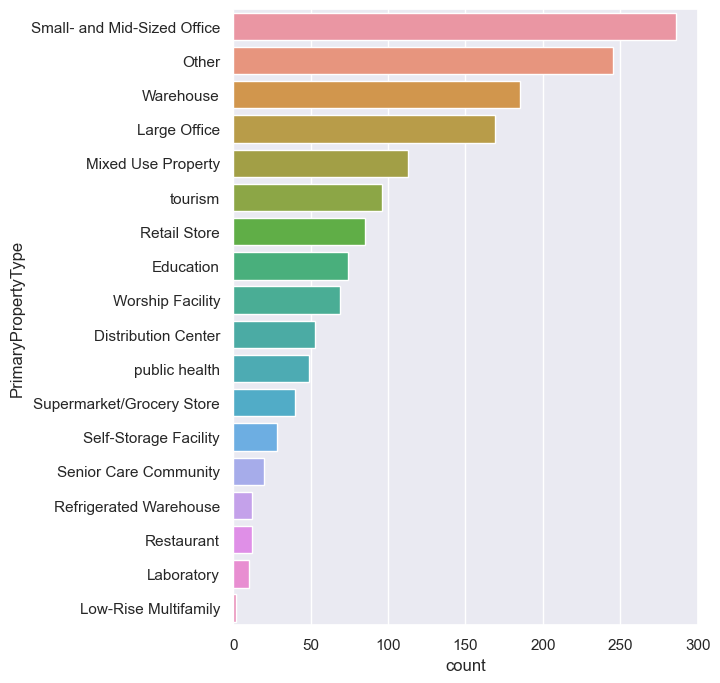

In [55]:
# visualisation de la répartition des données de la variable PrimaryPropertyType
plt.figure(figsize=(6, 8))
PrimaryPropertyType = df_Seattle['PrimaryPropertyType'].value_counts().index
sns.countplot(y="PrimaryPropertyType", order=PrimaryPropertyType, data=df_Seattle);

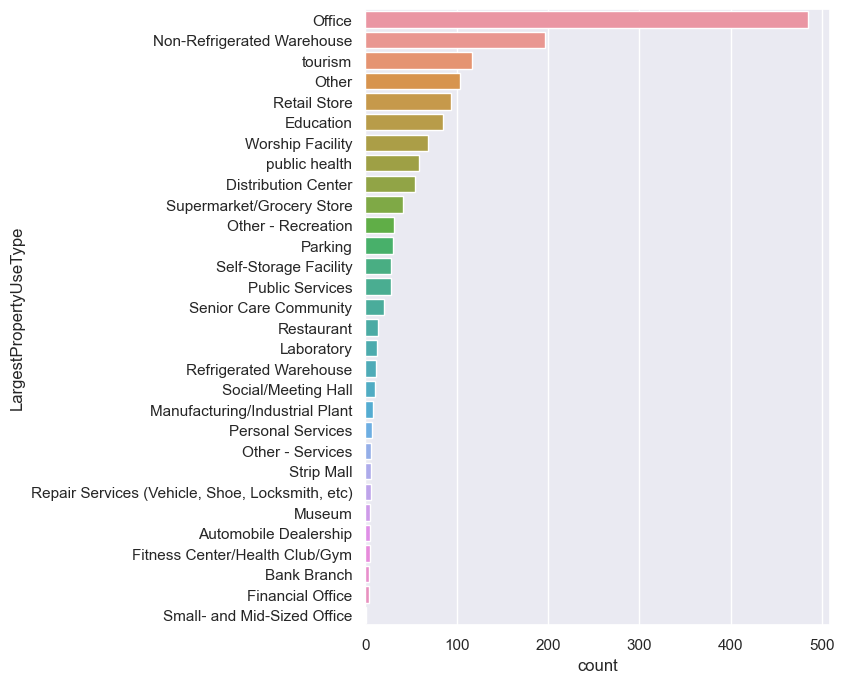

In [56]:
# visualisation de la répartition des données de la variable LargestPropertyUseType
plt.figure(figsize=(6, 8))
LargestPropertyUseType = df_Seattle['LargestPropertyUseType'].value_counts().index
sns.countplot(y='LargestPropertyUseType', order=LargestPropertyUseType, data=df_Seattle);

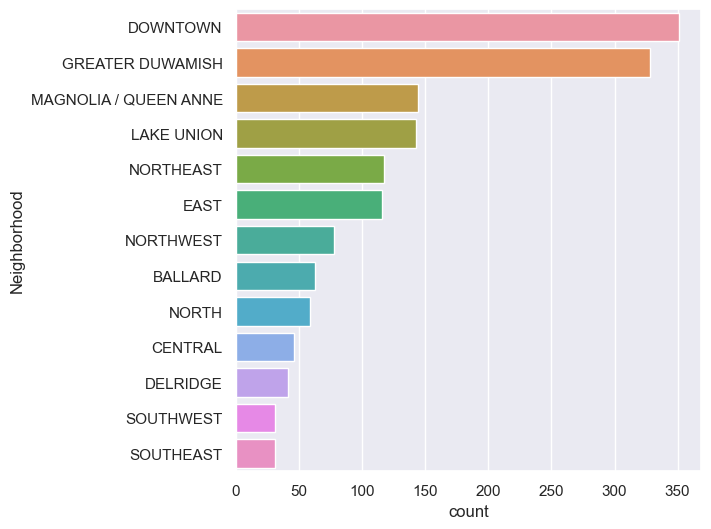

In [57]:
# visualisation de la répartition des données de la variable Neighborhood
plt.figure(figsize=(6, 6))
Neighborhood = df_Seattle['Neighborhood'].value_counts().index
sns.countplot(y="Neighborhood", order=Neighborhood, data=df_Seattle);

In [58]:
# Afficher les variables quantitatives 
variables_quantitatives = df_Seattle.select_dtypes(exclude=['O']).columns.tolist()
variables_quantitatives

['Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [59]:
# statistiques descriptives et transposer le tableau avec l'attribut T 
df_Seattle.describe().T

count          mean           std           min  \
Latitude               1548.0  4.761649e+01  4.695384e-02      47.50959   
Longitude              1548.0 -1.223335e+02  2.326372e-02    -122.41182   
YearBuilt              1548.0  1.961644e+03  3.288692e+01    1900.00000   
NumberofBuildings      1548.0  1.178941e+00  3.039221e+00       0.00000   
NumberofFloors         1548.0  4.276486e+00  6.780694e+00       0.00000   
PropertyGFATotal       1548.0  1.213321e+05  3.062944e+05   11285.00000   
PropertyGFAParking     1548.0  1.384234e+04  4.372182e+04       0.00000   
ENERGYSTARScore         997.0  6.363591e+01  2.882531e+01       1.00000   
SiteEUI(kBtu/sf)       1548.0  7.508411e+01  7.521284e+01       1.40000   
SiteEnergyUse(kBtu)    1548.0  8.860058e+06  3.130568e+07   57133.19922   
SteamUse(kBtu)         1548.0  5.511831e+05  5.718502e+06       0.00000   
Electricity(kBtu)      1548.0  6.140840e+06  2.151071e+07 -115417.00000   
NaturalGas(kBtu)       1548.0  2.038297e+06  9.710667e+06       0.00000   
TotalGHGEmissions      1548.0  1.936089e+02  7.791053e+02      -0.80000   
GHGEmissionsIntensity  1548.0  1.667358e+00  2.407577e+00      -0.02000   

                                25%           50%           75%           max  
Latitude               4.758786e+01  4.761271e+01  4.764906e+01  4.773387e+01  
Longitude             -1.223430e+02 -1.223332e+02 -1.223227e+02 -1.222618e+02  
YearBuilt              1.930000e+03  1.965500e+03  1.989000e+03  2.015000e+03  
NumberofBuildings      1.000000e+00  1.000000e+00  1.000000e+00  1.110000e+02  
NumberofFloors         1.000000e+00  2.000000e+00  4.000000e+00  9.900000e+01  
PropertyGFATotal       2.884325e+04  4.815900e+04  1.076615e+05  9.320156e+06  
PropertyGFAParking     0.000000e+00  0.000000e+00  0.000000e+00  5.126080e+05  
ENERGYSTARScore        4.400000e+01  7.100000e+01  8.800000e+01  1.000000e+02  
SiteEUI(kBtu/sf)       3.490000e+01  5.375000e+01  8.520000e+01  8.344000e+02  
SiteEnergyUse(kBtu)    1.251083e+06  2.732167e+06  7.294487e+06  8.739237e+08  
SteamUse(kBtu)         0.000000e+00  0.000000e+00  0.000000e+00  1.349435e+08  
Electricity(kBtu)      7.308642e+05  1.746086e+06  5.264935e+06  6.570744e+08  
NaturalGas(kBtu)       0.000000e+00  4.881350e+05  1.530812e+06  2.979090e+08  
TotalGHGEmissions      2.065500e+01  4.984500e+01  1.472275e+02  1.687098e+04  
GHGEmissionsIntensity  3.600000e-01  8.800000e-01  1.960000e+00  3.409000e+01

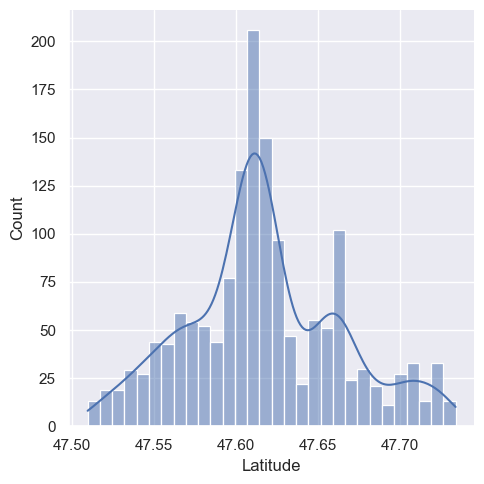

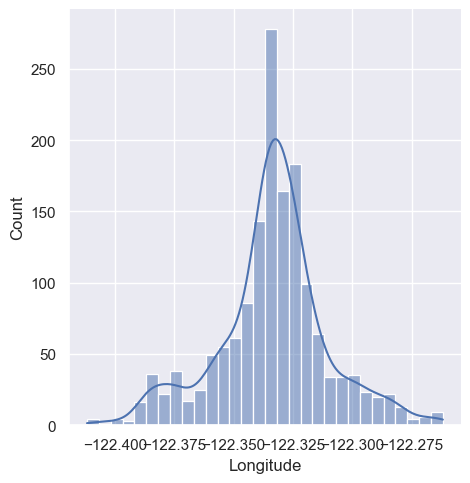

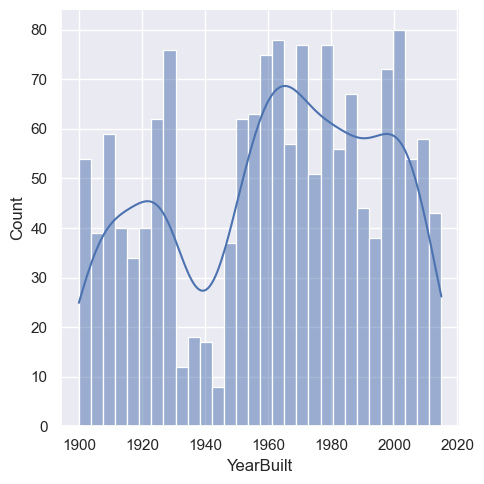

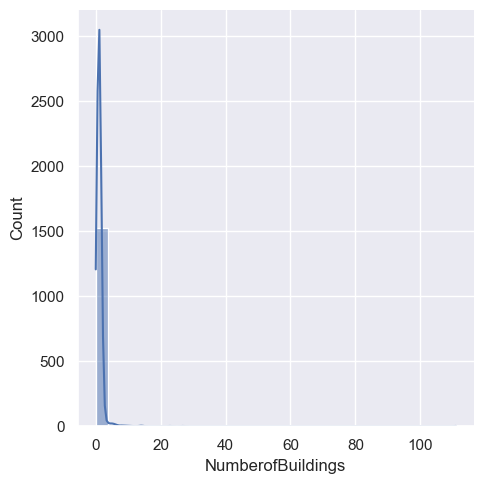

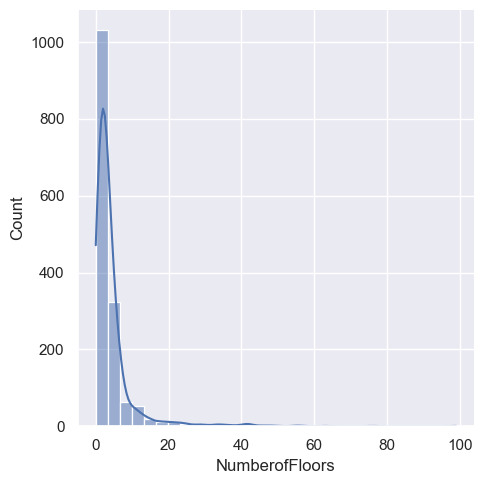

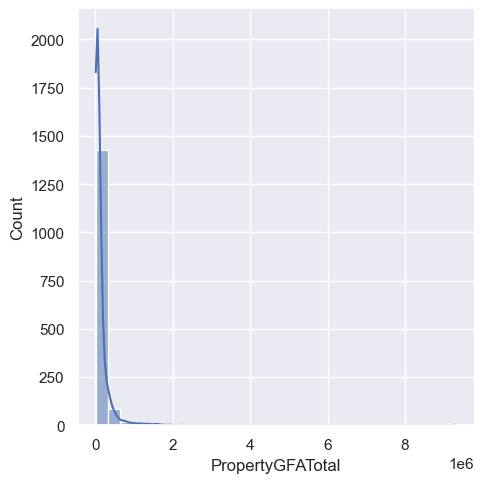

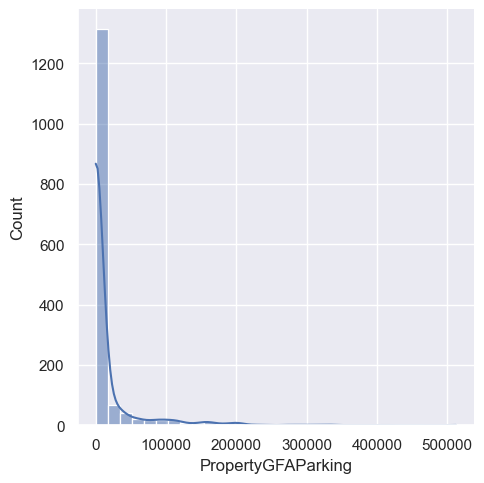

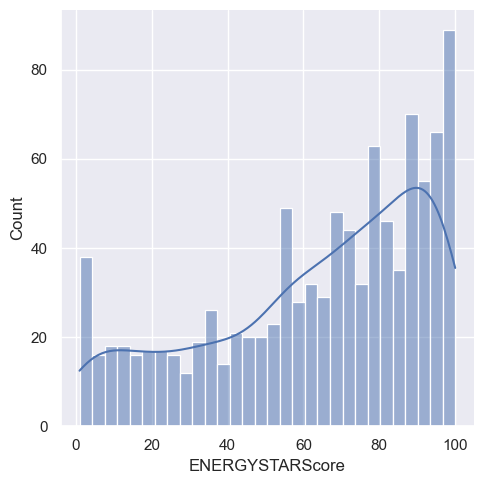

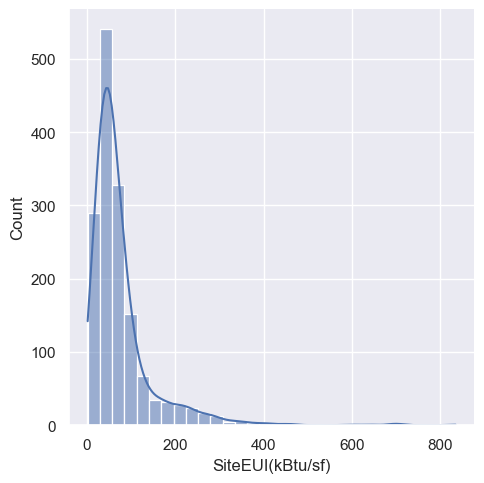

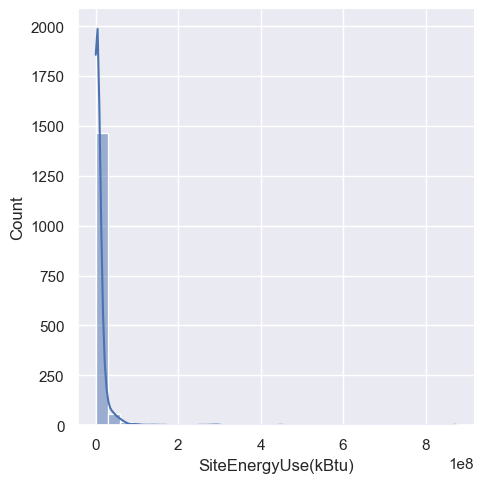

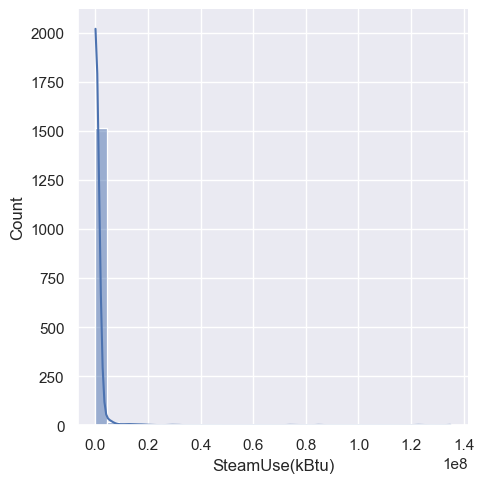

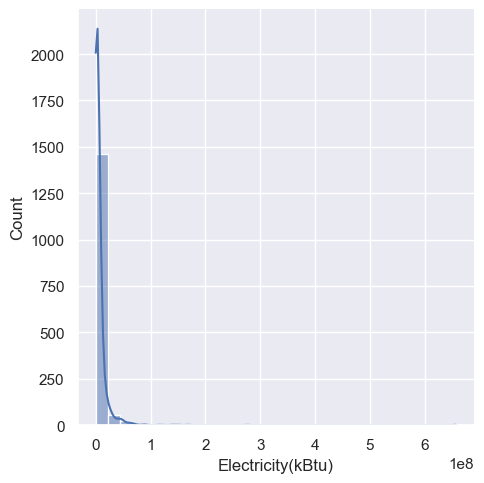

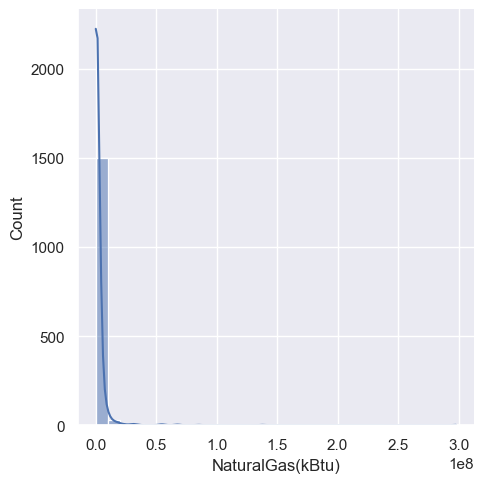

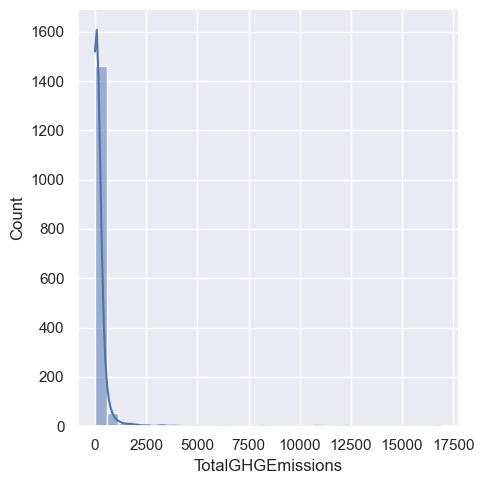

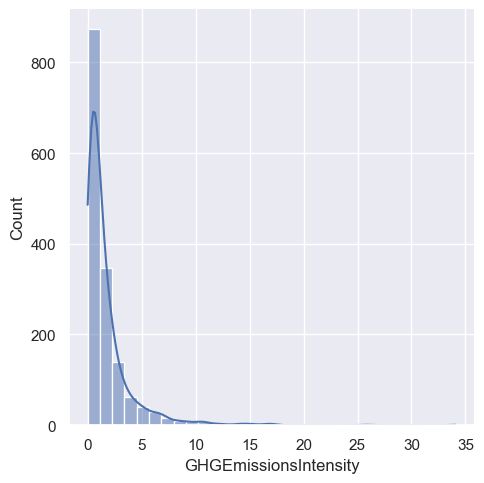

In [60]:
# Distribution des variables avec displot
for variable in variables_quantitatives:
    sns.set_theme()
    sns.displot(data=df_Seattle,
            x=variable,kde=True,height=5, bins=30);
plt.show()

voir https://heartbeat.comet.ml/major-problems-of-machine-learning-datasets-part-2-ba82e551fee2

------------------------------------------------------------
boxplot de la variable Latitude


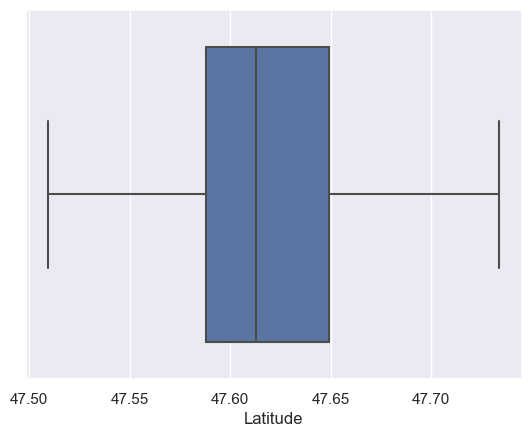

------------------------------------------------------------
boxplot de la variable Longitude


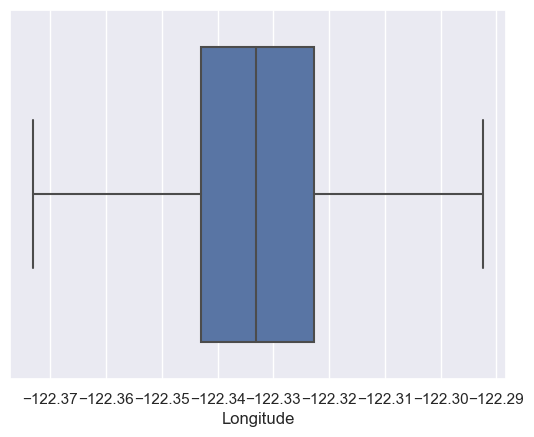

------------------------------------------------------------
boxplot de la variable YearBuilt


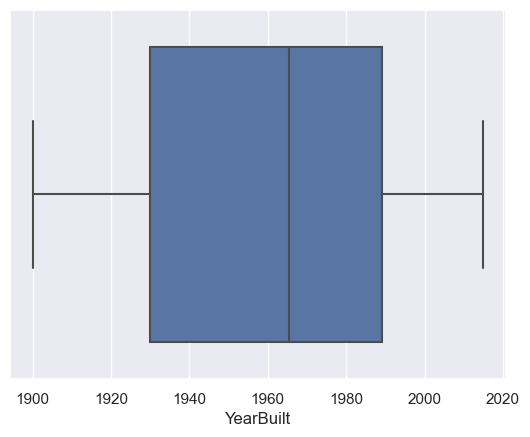

------------------------------------------------------------
boxplot de la variable NumberofBuildings


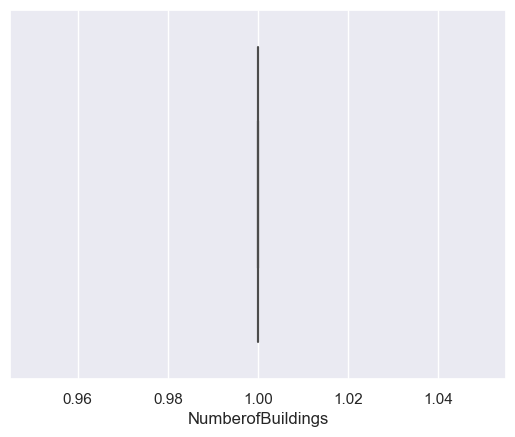

------------------------------------------------------------
boxplot de la variable NumberofFloors


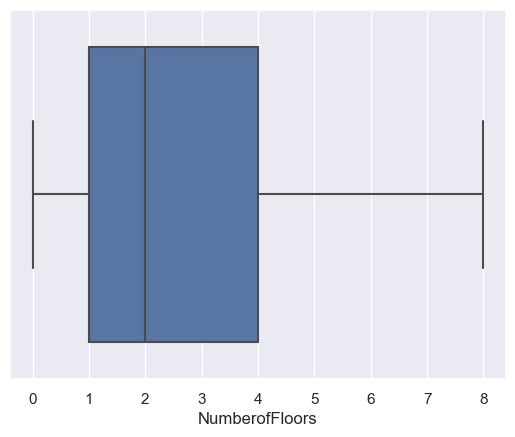

------------------------------------------------------------
boxplot de la variable PropertyGFATotal


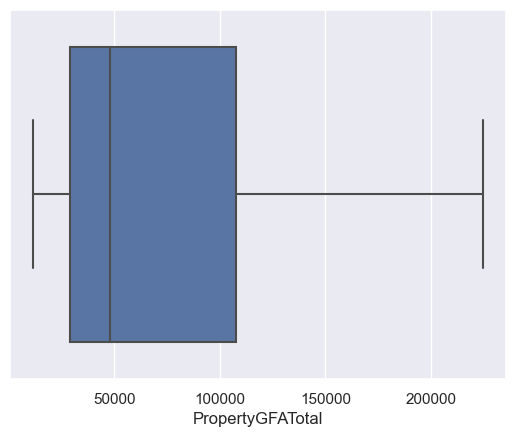

------------------------------------------------------------
boxplot de la variable PropertyGFAParking


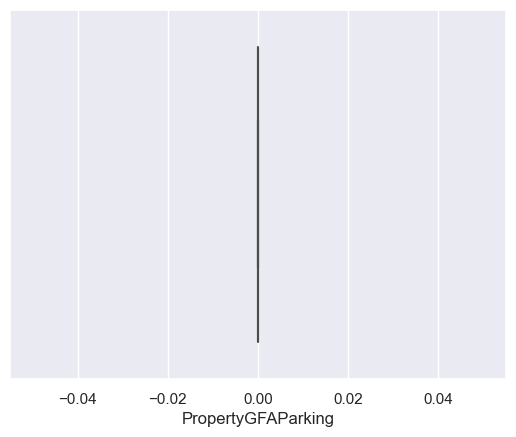

------------------------------------------------------------
boxplot de la variable ENERGYSTARScore


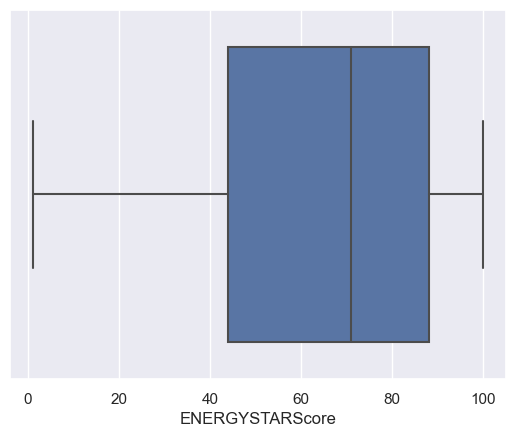

------------------------------------------------------------
boxplot de la variable SiteEUI(kBtu/sf)


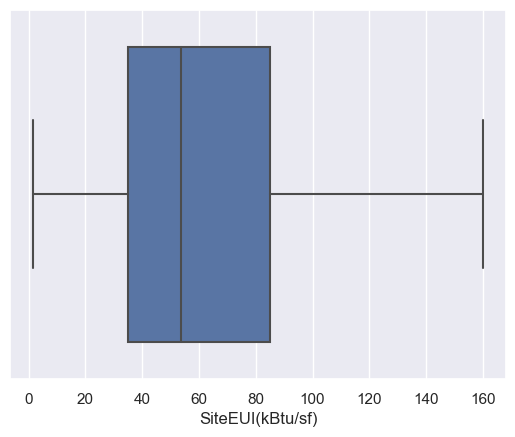

------------------------------------------------------------
boxplot de la variable SiteEnergyUse(kBtu)


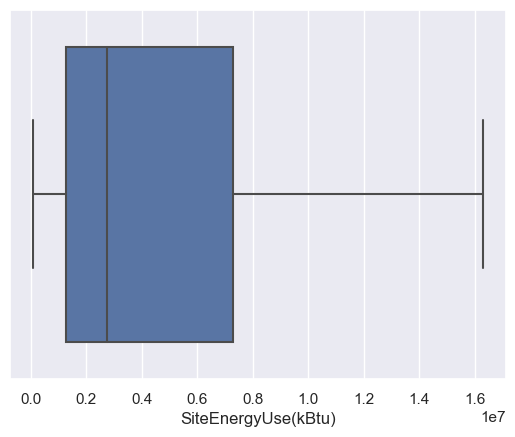

------------------------------------------------------------
boxplot de la variable SteamUse(kBtu)


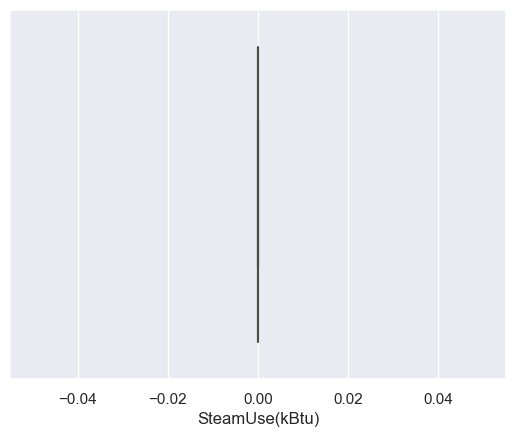

------------------------------------------------------------
boxplot de la variable Electricity(kBtu)


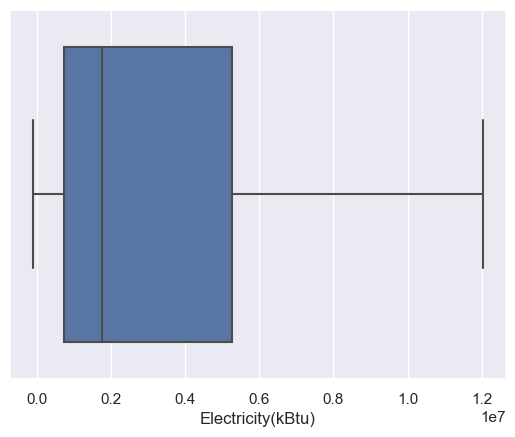

------------------------------------------------------------
boxplot de la variable NaturalGas(kBtu)


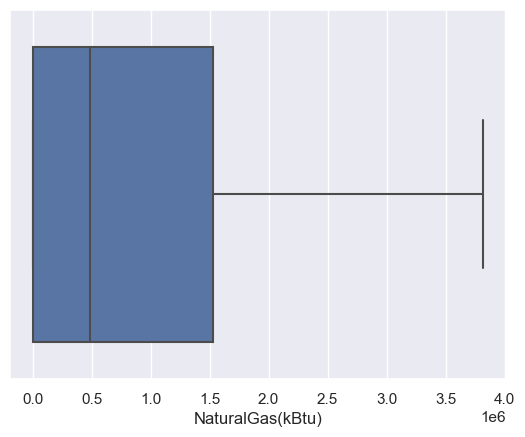

------------------------------------------------------------
boxplot de la variable TotalGHGEmissions


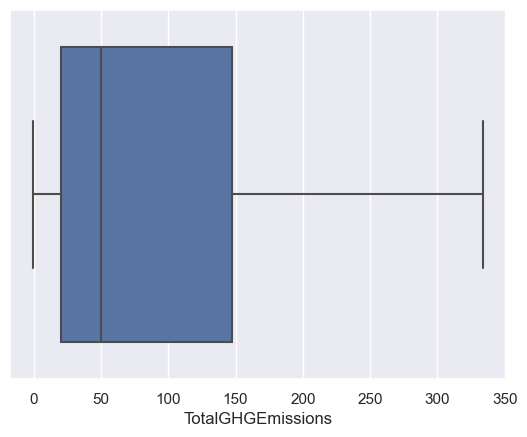

------------------------------------------------------------
boxplot de la variable GHGEmissionsIntensity


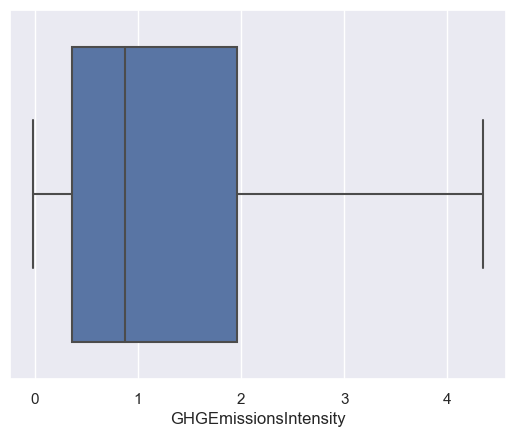

In [61]:
# boxplot des variables sans valeurs aberrantes
for variable in variables_quantitatives:
        sns.set_theme()
        print('-'*60)
        sns.boxplot(x= variable , data= df_Seattle, showfliers=False)
        print('boxplot de la variable ' + variable)
        plt.show()
   

## Analyse bivariée
### quantitative - quantitative

On veut tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées. on va donc étudier les relations des variables avec les deux variables cibles

- 'SiteEnergyUse(kBtu)'
- 'TotalGHGEmissions'

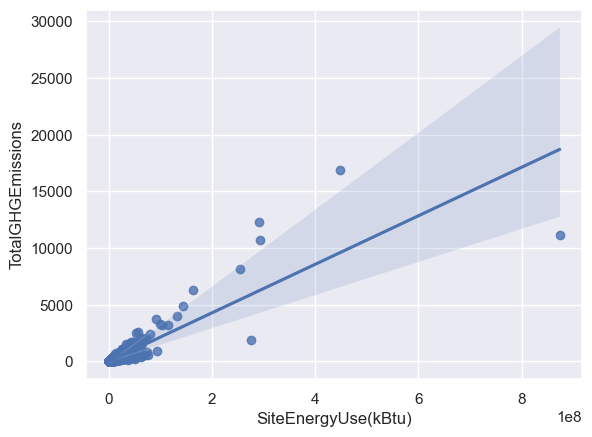

In [62]:
# regplot des deux variables cibles 
sns.regplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=df_Seattle);

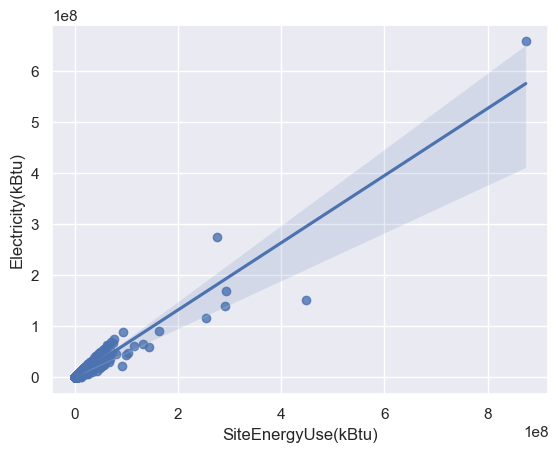

In [63]:
# regplot des deux variables 'SiteEnergyUse(kBtu)'et 'Electricity(kBtu)'

sns.regplot(x='SiteEnergyUse(kBtu)', y='Electricity(kBtu)', data=df_Seattle);

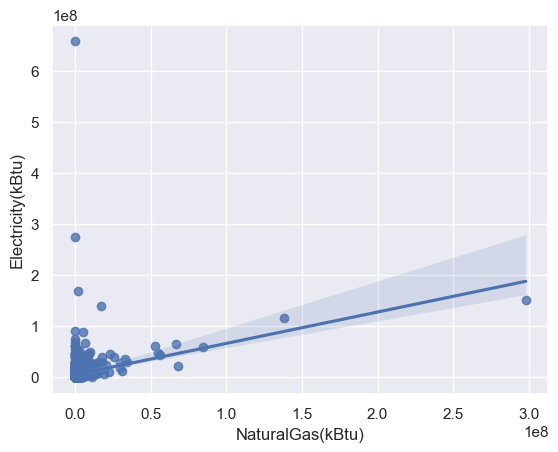

In [64]:
# regplot des deux variables 'NaturalGas(kBtu)'et 'Electricity(kBtu)'

sns.regplot(x='NaturalGas(kBtu)', y='Electricity(kBtu)', data=df_Seattle);

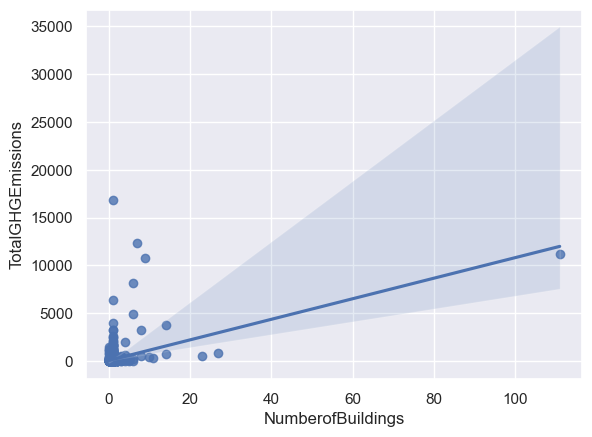

In [65]:
# regplot des deux variables 'NumberofBuildings' et 'TotalGHGEmissions'
sns.regplot(x='NumberofBuildings', y='TotalGHGEmissions', data=df_Seattle);

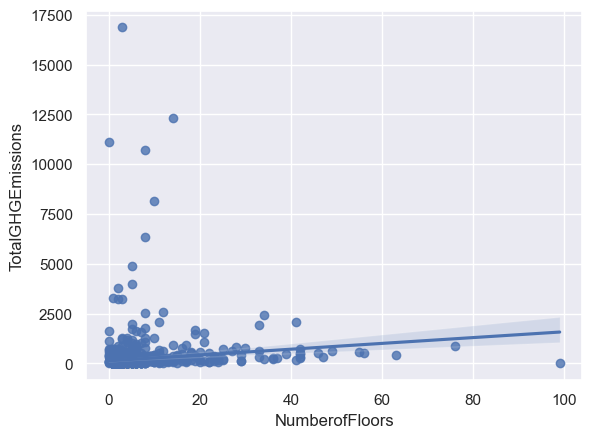

In [66]:
# regplot des deux variables 'NumberofFloors' et 'TotalGHGEmissions'
sns.regplot(x='NumberofFloors', y='TotalGHGEmissions', data=df_Seattle);

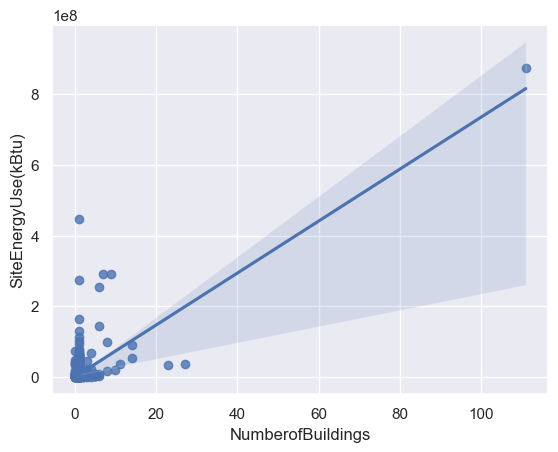

In [67]:
# regplot des deux variables 'NumberofBuildings' et 'SiteEnergyUse(kBtu)'
sns.regplot(x='NumberofBuildings', y='SiteEnergyUse(kBtu)', data=df_Seattle);

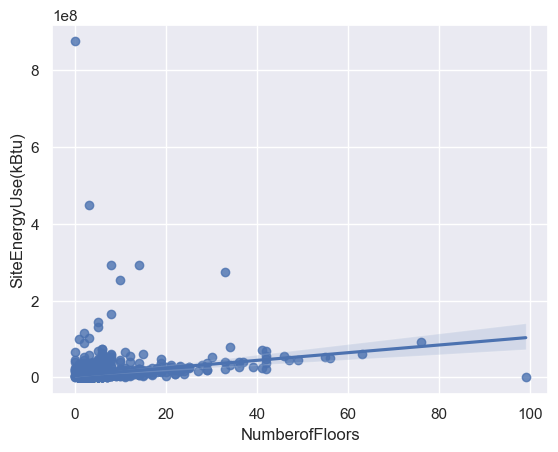

In [68]:
# regplot des deux variables 'NumberofFloors' et 'SiteEnergyUse(kBtu)'

sns.regplot(x='NumberofFloors', y='SiteEnergyUse(kBtu)', data=df_Seattle);

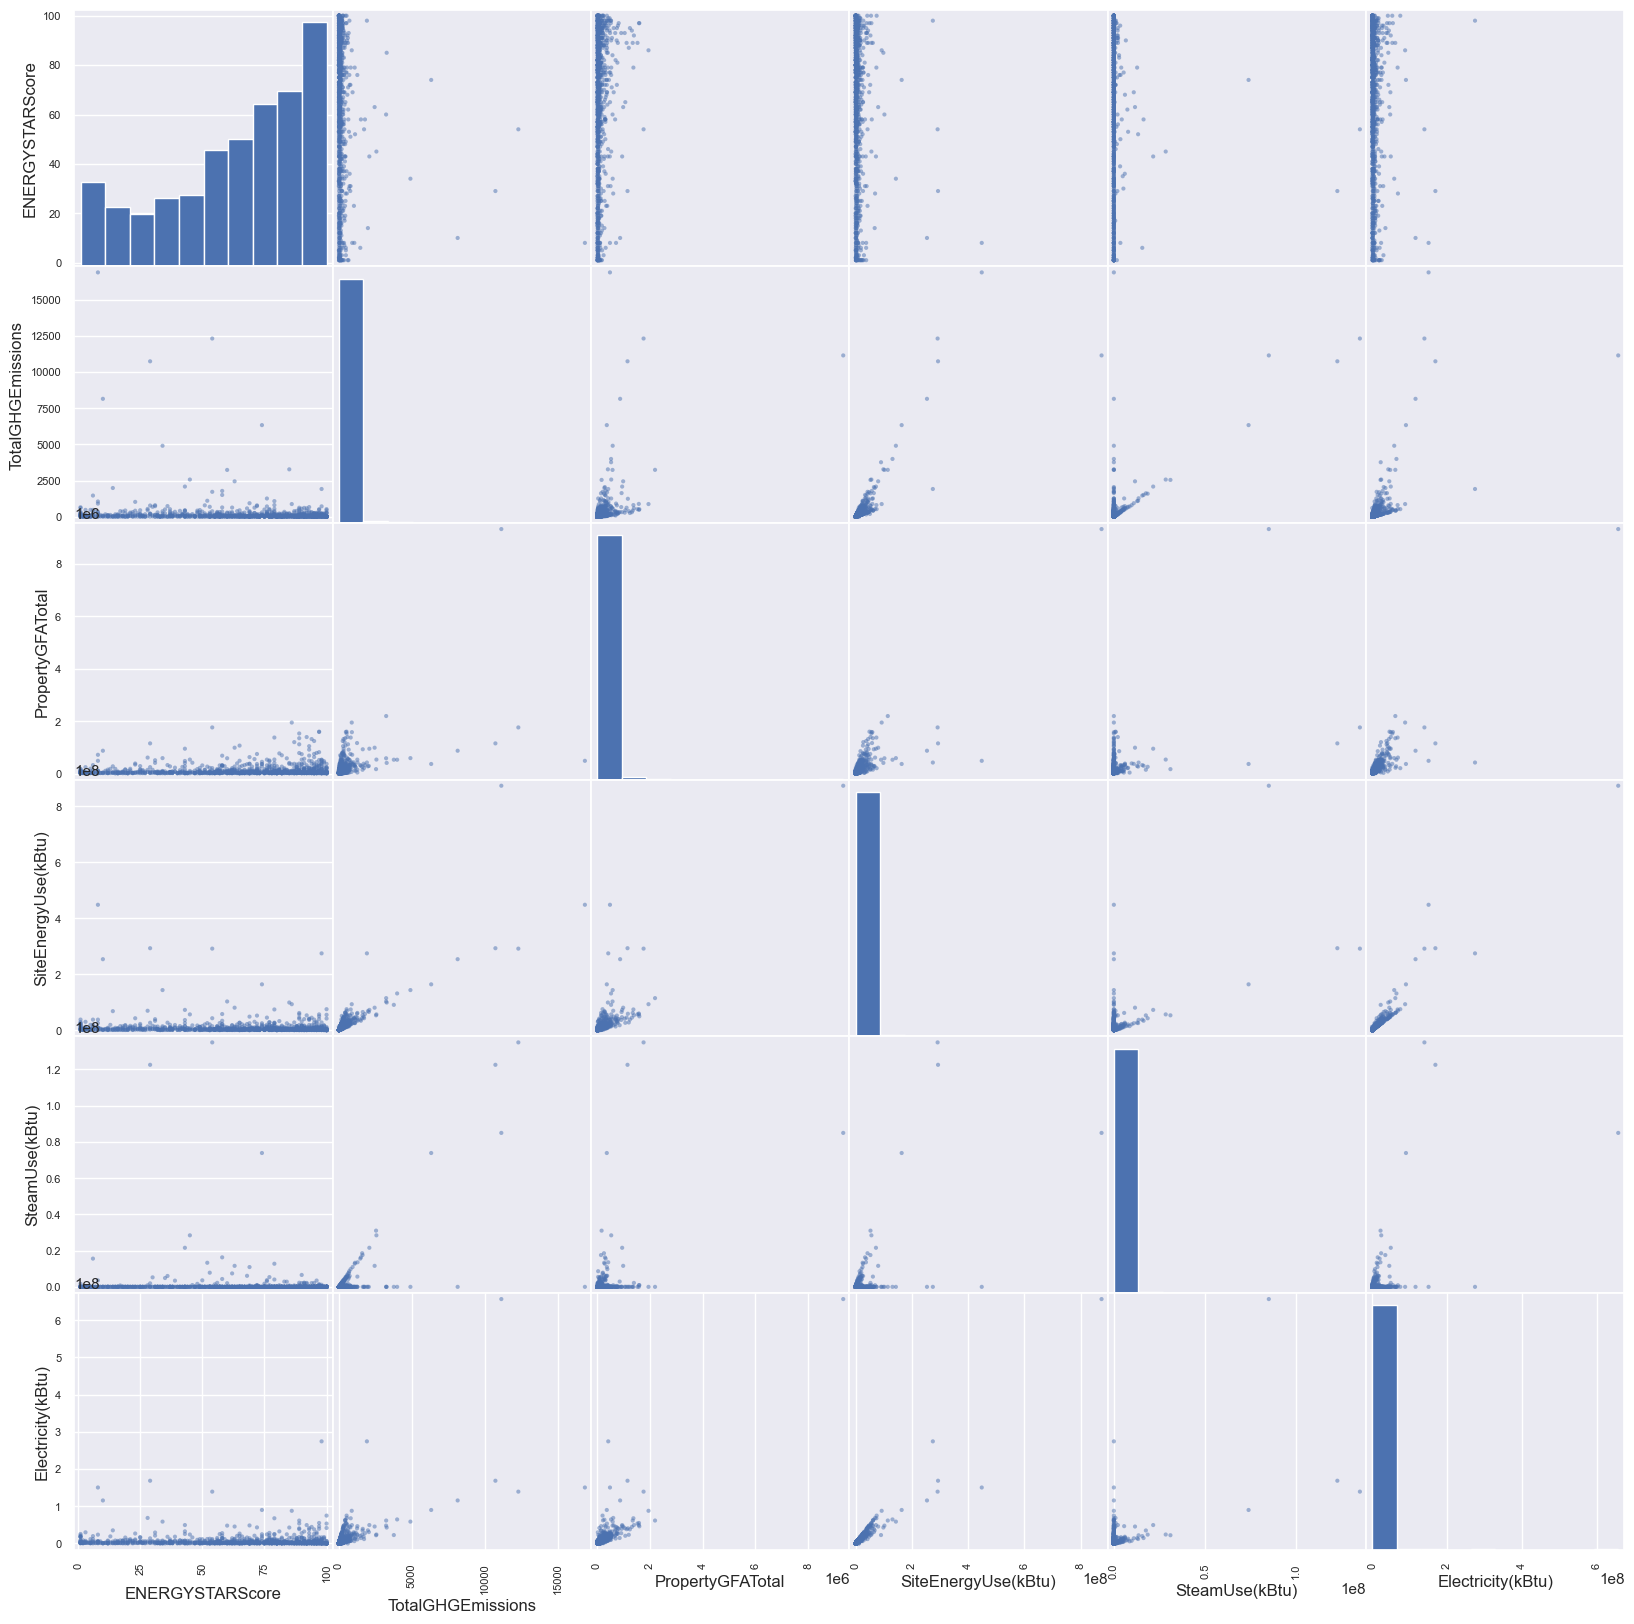

In [69]:
# vision globale visualisation de la scatter_matrix des variables pertinentes
variables_pertinentes = ['ENERGYSTARScore', 'TotalGHGEmissions', 'PropertyGFATotal',
 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)']
from pandas.plotting import scatter_matrix
scatter_matrix(df_Seattle[variables_pertinentes],figsize=(20,20));
sns.set_theme()
plt.show()

### Test de correlation de pearson

In [70]:
# Calcul du coefficient de corrélation linéaire (Pearson) 

# entre les deux variables 'ENERGYSTARScore' et 'TotalGHGEmissions'
ENERGYSTARScore = df_Seattle['ENERGYSTARScore']
TotalGHGEmissions = df_Seattle['TotalGHGEmissions']

# entre les deux variables 'Electricity(kBtu)' et 'PropertyGFATotal'
Electricity = df_Seattle['Electricity(kBtu)']
PropertyGFATotal = df_Seattle['PropertyGFATotal']

# entre les deux variables 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions'
SiteEnergyUse = df_Seattle['SiteEnergyUse(kBtu)']
TotalGHGEmissions = df_Seattle['TotalGHGEmissions']

print('-'*60)
print("Le coefficient de corrélation de Pearson entre les deux variables 'ENERGYSTARScore' et 'TotalGHGEmissions' est:")
print("r = {}".format(ENERGYSTARScore.corr(TotalGHGEmissions, method='pearson')))
print('-'*60)
print("Le coefficient de corrélation de Pearson entre les deux variables 'Electricity(kBtu)' et 'PropertyGFATotal' est:")
print("r = {}".format(Electricity.corr(PropertyGFATotal, method='pearson')))
print('-'*60)
print("Le coefficient de corrélation de Pearson entre les deux variables 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' est:")
print("r = {}".format(SiteEnergyUse.corr(TotalGHGEmissions, method='pearson')))
print('-'*60)

------------------------------------------------------------
Le coefficient de corrélation de Pearson entre les deux variables 'ENERGYSTARScore' et 'TotalGHGEmissions' est:
r = -0.10209939974296427
------------------------------------------------------------
Le coefficient de corrélation de Pearson entre les deux variables 'Electricity(kBtu)' et 'PropertyGFATotal' est:
r = 0.8685593117685624
------------------------------------------------------------
Le coefficient de corrélation de Pearson entre les deux variables 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' est:
r = 0.8600232457582133
------------------------------------------------------------


Pour le reste des variables on va utiliser la heatmap de correlation pour une vision globale

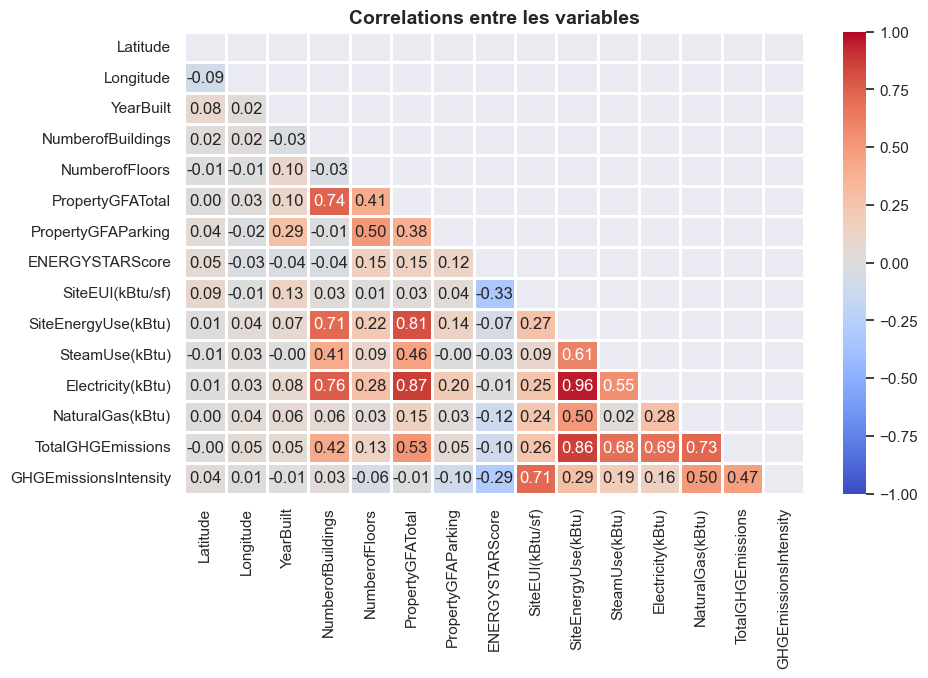

In [71]:
# Correlations entre les variables
def correlation(df_final):
    plt.figure(figsize=(10,6))
    mask = np.triu(np.ones_like(df_Seattle.corr(), dtype=bool))
    sns.heatmap(df_Seattle.corr(), mask=mask, cmap="coolwarm", center=0,
               linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlations entre les variables', fontsize=14, fontweight='bold')
    plt.show()
correlation(df_Seattle)

In [72]:
# afficher les variables quantitatives 
df_Seattle.select_dtypes(exclude=['O']).columns.tolist()

['Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [73]:
# examiner les valeurs uniques de la variable 'NumberofBuildings'
df_Seattle['NumberofBuildings'].unique()

array([  1.,   3.,   0.,   2.,   4.,  27.,   6.,  11.,  14.,   9.,   7.,
         5.,   8.,  23.,  10., 111.])

In [74]:
# examiner les valeurs uniques de la variable 'NumberofFloors'
df_Seattle['NumberofFloors'].unique()

array([12, 11, 41, 10, 18,  2,  8, 15, 25,  9, 33,  6, 28,  5, 19,  7,  3,
        4, 24, 20, 34,  1,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 76, 27, 99, 39])

On remarque que:

la variable 'TotalGHGEmissions' dépend des variables :

    - 'SiteEnergyUse(kBtu)'
    - 'SteamUse(kBtu)'
    - 'Electricity(kBtu)'
    - 'NaturalGas(kBtu)'
    - 'PropertyGFATotal'
    
la variable 'SiteEnergyUse(kBtu)' dépend des variables :

    - 'Electricity(kBtu)'
    - 'TotalGHGEmissions'
    - 'SteamUse(kBtu)'
    - 'NaturalGas(kBtu)'
    - 'PropertyGFATotal'
    - 'NumberofBuildings'
    
la variable 'NumberofBuildings' dépend des variables :

    - 'SiteEnergyUse(kBtu)'
    - 'Electricity(kBtu)'
    - 'PropertyGFATotal'
    
la variable  'GHGEmissionsIntensity'  dépend des la variable :

    - 'SiteEUI(kBtu/sf)'
    - 'NaturalGas(kBtu)'
    
la variable 'PropertyGFATotal' dépend des variables :

    - 'SiteEnergyUse(kBtu)'
    - 'Electricity(kBtu)'
    - 'TotalGHGEmissions'
    
La variable 'NumberofFloors' est moyennement corrélée aves les deux variables :

    - 'PropertyGFAParking' (50%)
    - 'PropertyGFATotal'  (41%)
    

On peut constater que le nombre de bâtiments a un impact sur  la consommation totale d’énergie mais pas sur les émissions de gaz à effet de serre . 

Le nombre d'étages est moyennement corrélé avec les surfaces 'PropertyGFAParking' et 'PropertyGFATotal' mais  n'a pas d'impact majeur sur la consommation totale d’énergie et sur les émissions de gaz à effet de serre 

### Quantitative - Qualitative

### Analyse de la variance : Anova
### Test de Kruskal-Wallis

In [75]:
# afficher le dataset df_Seattle
df_Seattle

BuildingType PrimaryPropertyType  \
0         NonResidential             tourism   
1         NonResidential             tourism   
2         NonResidential             tourism   
3         NonResidential             tourism   
4         NonResidential             tourism   
...                  ...                 ...   
3370  Nonresidential COS               Other   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Neighborhood  Latitude  \
0                    Mayflower park hotel               DOWNTOWN  47.61220   
1                         Paramount Hotel               DOWNTOWN  47.61317   
2                 5673-The Westin Seattle               DOWNTOWN  47.61393   
3                               HOTEL MAX               DOWNTOWN  47.61412   
4             WARWICK SEATTLE HOTEL (ID8)               DOWNTOWN  47.61375   
...                                   ...                    ...       ...   
3370          High Point Community Center               DELRIDGE  47.54067   
3372  International district/Chinatown CC               DOWNTOWN  47.59625   
3373                      Queen Anne Pool  MAGNOLIA / QUEEN ANNE  47.63644   
3374          South Park Community Center       GREATER DUWAMISH  47.52832   
3375          Van Asselt Community Center       GREATER DUWAMISH  47.53939   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0    -122.33799       1927                1.0              12   
1    -122.33393       1996                1.0              11   
2    -122.33810       1969                1.0              41   
3    -122.33664       1926                1.0              10   
4    -122.34047       1980                1.0              18   
...         ...        ...                ...             ...   
3370 -122.37441       1982                1.0               1   
3372 -122.32283       2004                1.0               1   
3373 -122.35784       1974                1.0               1   
3374 -122.32431       1989                1.0               1   
3375 -122.29536       1938                1.0               1   

      PropertyGFATotal  PropertyGFAParking LargestPropertyUseType  \
0                88434                   0                tourism   
1               103566               15064                tourism   
2               956110              196718                tourism   
3                61320                   0                tourism   
4               175580               62000                tourism   
...                ...                 ...                    ...   
3370             18261                   0     Other - Recreation   
3372             16000                   0     Other - Recreation   
3373             13157                   0     Other - Recreation   
3374             14101                   0     Other - Recreation   
3375             18258                   0     Other - Recreation   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0                60.0         81.699997         7.226362e+06      2003882.00   
1                61.0         94.800003         8.387933e+06            0.00   
2                43.0         96.000000         7.258702e+07     21566554.00   
3                56.0        110.800003         6.794584e+06      2214446.25   
4                75.0        114.800003         1.417261e+07            0.00   
...               ...               ...                  ...             ...   
3370              NaN         51.000000         9.320821e+05            0.00   
3372              NaN         59.400002         9.502762e+05            0.00   
3373              NaN        438.200012         5.765898e+06            0.00   
3374              NaN         51.000000         7.194712e+05            0.00   
3375    

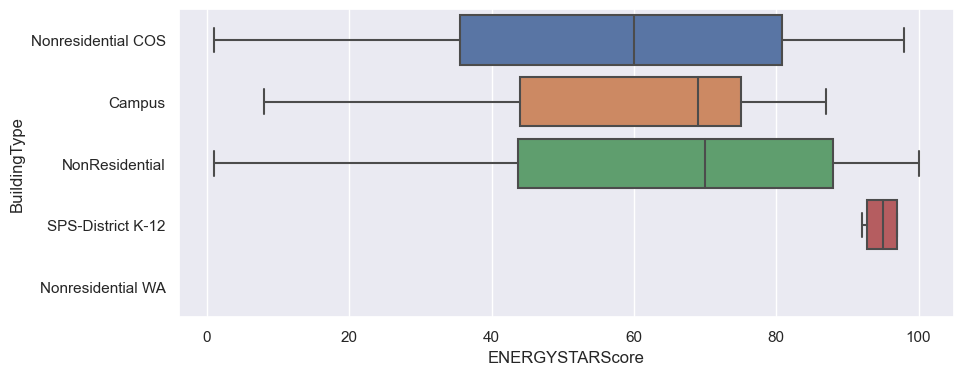

In [76]:
# boxplot de la variable qualitative 'BuildingType' et la variable quantitative 'ENERGYSTARScore'
ordre_ENERGYSTARScore = df_Seattle.groupby('BuildingType')['ENERGYSTARScore'].median().sort_values().index

plt.subplots(figsize=(10,4))
ax = sns.boxplot(x='ENERGYSTARScore', y='BuildingType' , showfliers=False, order=ordre_ENERGYSTARScore,
                 meanprops={'marker':'s', 'markeredgecolor':'black'}, data=df_Seattle)
sns.set_theme()
plt.show()

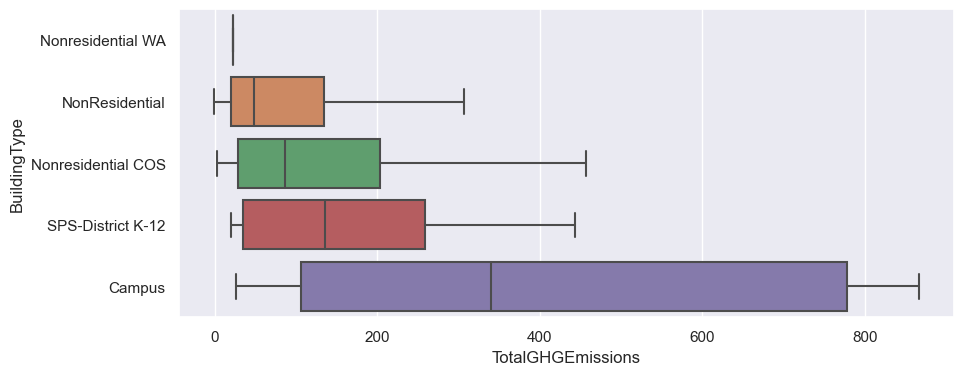

In [77]:
# boxplot de la variable qualitative 'BuildingType' et la variable quantitative 'TotalGHGEmissions'
ordre_TotalGHGEmissions = df_Seattle.groupby('BuildingType')['TotalGHGEmissions'].median().sort_values().index
plt.subplots(figsize=(10,4))
ax = sns.boxplot(x='TotalGHGEmissions', y='BuildingType', showfliers=False, order=ordre_TotalGHGEmissions,
                 meanprops={'marker':'s', 'markeredgecolor':'black'}, data=df_Seattle)
sns.set_theme()
plt.show()

In [78]:
# On va réexaminer la variable 'BuildingType'
df_Seattle['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Campus',
       'SPS-District K-12', 'Nonresidential WA'], dtype=object)

In [79]:
# examiner les groupes de la variable 'BuildingType'
df_Seattle['BuildingType'].value_counts()

NonResidential        1432
Nonresidential COS      81
Campus                  24
SPS-District K-12       10
Nonresidential WA        1
Name: BuildingType, dtype: int64

#### La p-valeur 

La valeur de p est la probabilité qui mesure le degré de certitude avec lequel il est possible d'invalider l'hypothèse nulle $H_{0}$. Une valeur de p inférieure permet d'invalider l'hypothèse nulle $H_{0}$ avec plus de certitude.

Pour déterminer si le coefficient de corrélation est statistiquement significatif, on peut comparer la valeur de p au seuil de signification.

En général, un seuil de signification (noté alpha ou α) de 0,05 fonctionne bien. Un seuil de signification de 0,05 indique un risque de 5 % de conclure à tort qu'une différence existe.

Valeur de p ≤ α : la corrélation est statistiquement significative (Rejeter $H_{0}$)
Si la valeur de p est inférieure ou égale au seuil de signification, vouson peut rejeter l'hypothèse nulle. On peut en conclure que la corrélation est statistiquement significative.

Valeur de p > α : la corrélation n'est pas statistiquement significative (Impossible de rejeter $H_{0}$)
Si la valeur de p est supérieure au seuil de signification, on ne peut pas rejeter l'hypothèse nulle. (https://support.minitab.com/fr-fr/minitab/21/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/all-statistics-and-graphs/)

In [80]:
# On va créer une serie de la variable 'TotalGHGEmissions'pour chaque catégorie de la variable 'BuildingType'
BuildingType_1 = df_Seattle['TotalGHGEmissions'].loc[df_Seattle['BuildingType']== 'NonResidential']
BuildingType_2 = df_Seattle['TotalGHGEmissions'].loc[df_Seattle['BuildingType']== 'Nonresidential COS']
BuildingType_3 = df_Seattle['TotalGHGEmissions'].loc[df_Seattle['BuildingType']== 'Campus']
BuildingType_4 = df_Seattle['TotalGHGEmissions'].loc[df_Seattle['BuildingType']== 'SPS-District K-12']
BuildingType_5 = df_Seattle['TotalGHGEmissions'].loc[df_Seattle['BuildingType']== 'Nonresidential WA']
# Test Kruskal-Wallis
from scipy.stats import kruskal
stats.kruskal(BuildingType_1,BuildingType_2,BuildingType_3,BuildingType_4,BuildingType_5)

KruskalResult(statistic=39.63136930265642, pvalue=5.1587941738142755e-08)

La p-valeur est ≤ 5% : la corrélation est statistiquement significative (Rejeter $H_{0}$)
 
On peut conclure que la corrélation est statistiquement significative entre la variable 'TotalGHGEmissions' et la variable 'BuildingType'.

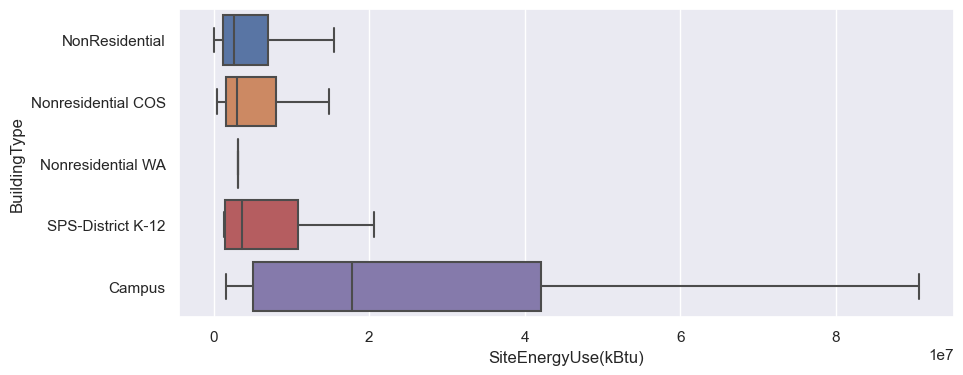

In [81]:
# boxplot de la variable qualitative 'BuildingType' et la variable quantitative 'SiteEnergyUse(kBtu)'
ordre_BuildingType = df_Seattle.groupby('BuildingType')['SiteEnergyUse(kBtu)'].median().sort_values().index

plt.subplots(figsize=(10,4))
ax = sns.boxplot(x='SiteEnergyUse(kBtu)', y='BuildingType' , showfliers=False, order=ordre_BuildingType,
                 meanprops={'marker':'s', 'markeredgecolor':'black'}, data=df_Seattle)
sns.set_theme()
plt.show()

In [82]:
# on va réaliser le le même test avec 'SiteEnergyUse(kBtu)'
# On va créer une serie de la variable 'SiteEnergyUse(kBtu)' pour chaque catégorie de la variable 'BuildingType'
BuildingType_6 = df_Seattle['SiteEnergyUse(kBtu)'].loc[df_Seattle['BuildingType']== 'NonResidential']
BuildingType_7 = df_Seattle['SiteEnergyUse(kBtu)'].loc[df_Seattle['BuildingType']== 'Nonresidential COS']
BuildingType_8 = df_Seattle['SiteEnergyUse(kBtu)'].loc[df_Seattle['BuildingType']== 'Campus']
BuildingType_9 = df_Seattle['SiteEnergyUse(kBtu)'].loc[df_Seattle['BuildingType']== 'SPS-District K-12']
BuildingType_10 = df_Seattle['SiteEnergyUse(kBtu)'].loc[df_Seattle['BuildingType']== 'Nonresidential WA']
# Test Kruskal-Wallis
from scipy.stats import kruskal
stats.kruskal(BuildingType_6,BuildingType_7,BuildingType_8,BuildingType_9,BuildingType_10)

KruskalResult(statistic=26.777658956038067, pvalue=2.204604575118985e-05)

On peut conclure que la corrélation est statistiquement significative entre la variable 'SiteEnergyUse(kBtu)' et la variable 'BuildingType'.

### Kruskal-Wallis avec Pingouin (statistical package)
On peut utiliser une autre méthode pour réaliser le test de Kruskal-Wallis 

In [83]:
# installer pingouin
!pip install pingouin

In [84]:
# test de Kruskal-Wallis avec Pingouin entre la variable qualitative 'BuildingType' et la variable quantitative 'TotalGHGEmissions'
from pingouin import kruskal
kruskal(data=df_Seattle, dv='TotalGHGEmissions', between='BuildingType')

Source  ddof1          H         p-unc
Kruskal  BuildingType      4  39.631369  5.158794e-08

#### Nous avons obtenu la même p-valeur  avec la méthode Scipy (KruskalResult(statistic=39.63136930265642, pvalue=5.1587941738142755e-08))
#### On peut conclure que la corrélation est statistiquement significative entre la variable 'TotalGHGEmissions' et la variable 'BuildingType'.


In [85]:
# test de Kruskal-Wallis (Pingouin) entre la variable qualitative 'BuildingType' et la variable quantitative 'SiteEnergyUse(kBtu)'

kruskal(data=df_Seattle, dv='SiteEnergyUse(kBtu)', between='BuildingType')

Source  ddof1          H     p-unc
Kruskal  BuildingType      4  26.777659  0.000022

#### Nous avons obtenu la même p-valeur  avec la méthode Scipy (KruskalResult(statistic=26.777658956038067, pvalue=2.204604575118985e-05))
#### On peut conclure que la corrélation est statistiquement significative entre la variable 'SiteEnergyUse(kBtu)' et la variable 'BuildingType'.

In [86]:
# Kruskal-Wallis (Pingouin) entre la variable qualitative 'Neighborhood' et la variable quantitative 'SiteEnergyUse(kBtu)'
kruskal(data=df_Seattle, dv='SiteEnergyUse(kBtu)', between='Neighborhood')

Source  ddof1           H         p-unc
Kruskal  Neighborhood     12  143.079188  1.429853e-24

In [87]:
# Kruskal-Wallis (Pingouin) entre la variable qualitative 'Neighborhood' et la variable quantitative 'TotalGHGEmissions'
kruskal(data=df_Seattle, dv='TotalGHGEmissions', between='Neighborhood')

Source  ddof1         H         p-unc
Kruskal  Neighborhood     12  86.32941  2.525391e-13

#### On peut conclure que la relation est statistiquement significative entre la variable qualitative 'Neighborhood' et les deux variables cibles 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions'.

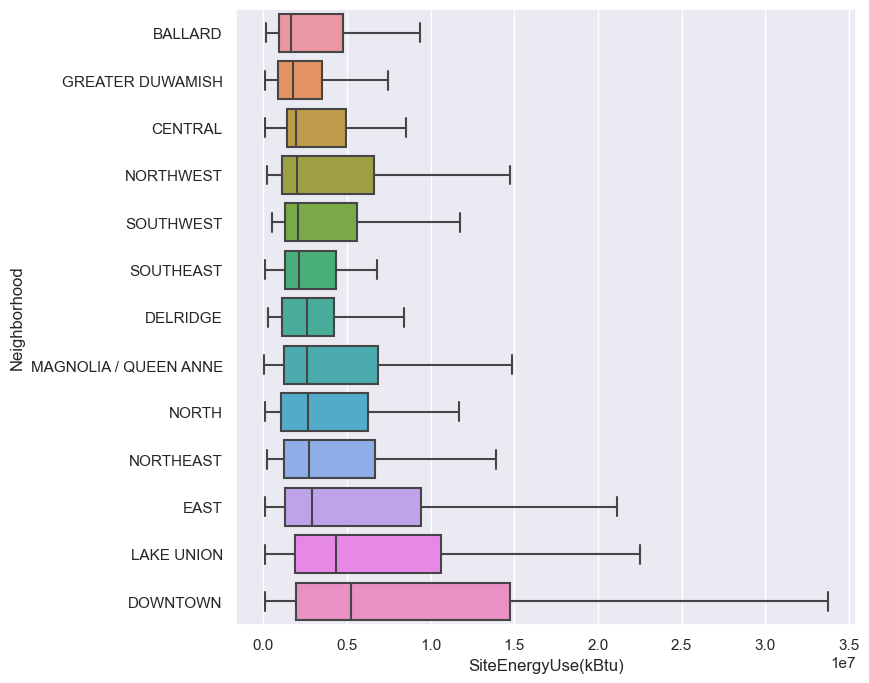

In [88]:
# boxplot de la variable qualitative 'Neighborhood' et la variable quantitative 'SiteEnergyUse(kBtu)'
ordre_Neighborhood = df_Seattle.groupby('Neighborhood')['SiteEnergyUse(kBtu)'].median().sort_values().index

plt.subplots(figsize=(8,8))
ax = sns.boxplot(x='SiteEnergyUse(kBtu)', y='Neighborhood', showfliers=False, order=ordre_Neighborhood, 
                 meanprops={'marker':'s', 'markeredgecolor':'black'}, data=df_Seattle)
sns.set_theme()
plt.show()

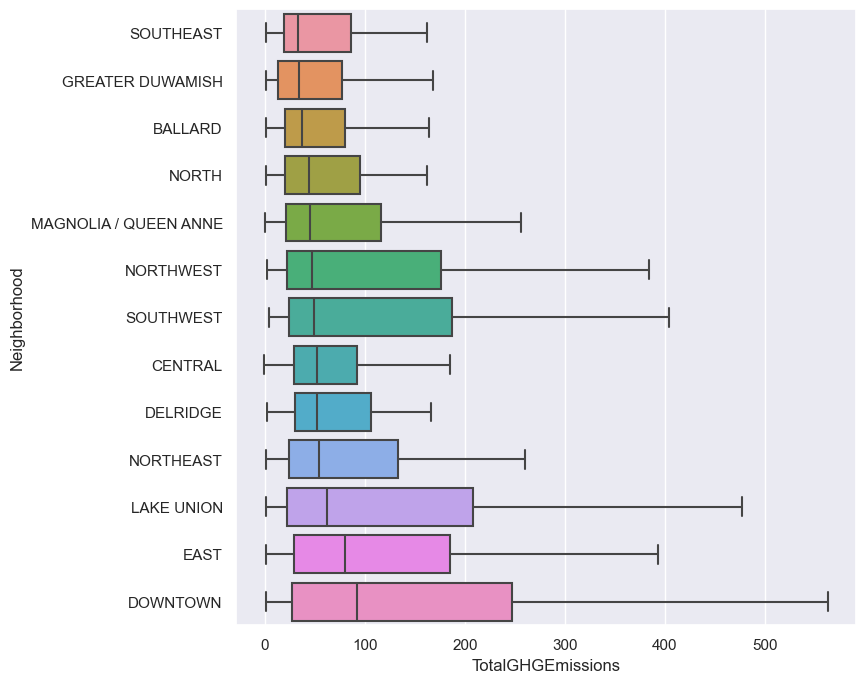

In [89]:
# boxplot de la variable qualitative 'Neighborhood' et la variable quantitative 'TotalGHGEmissions'
ordre_Emissions = df_Seattle.groupby('Neighborhood')['TotalGHGEmissions'].median().sort_values().index

plt.subplots(figsize=(8,8))
ax = sns.boxplot(x='TotalGHGEmissions', y='Neighborhood', showfliers=False, order=ordre_Emissions, 
                 meanprops={'marker':'s', 'markeredgecolor':'black'}, data=df_Seattle)
sns.set_theme()
plt.show()

Les quartiers DOWNTOWN, EAST, LAKE UNION et NORTHEAST sont les top 4 quatiers pour l'émission de $CO_{2}$ et la consommation totale d’énergie, le quartier NORTH arrive dans la 5ème place pour la consommation totale d’énergie,  malgré qu'il est classé avec les 4 derniers quartier en terme d'émission de $CO_{2}$.

Dans les catégories 'BuildingType' on constate que 'Campus' arrive en tête de classement pour la consommation totale d’énergie et l'émission de $CO_{2}$.
Le meilleur 'ENERGYSTARScore' est obtenu avec SPS-District K-12 et Nonresidential WA

On peut conclure qu'il y a une relation de causalité entre la variable Neighborhood et les variables cibles. 

In [90]:
# Kruskal-Wallis entre la variable qualitative 'Neighborhood' et la variable quantitative 'ENERGYSTARScore'
# dans df_Seattle
kruskal(data=df_Seattle, dv='ENERGYSTARScore', between='Neighborhood')

Source  ddof1          H     p-unc
Kruskal  Neighborhood     12  46.586232  0.000005

In [91]:
# Kruskal-Wallis entre la variable qualitative 'BuildingType' et la variable quantitative 'ENERGYSTARScore'
# dans df_Seattle
kruskal(data=df_Seattle, dv='ENERGYSTARScore', between='BuildingType')

Source  ddof1          H     p-unc
Kruskal  BuildingType      3  13.037646  0.004556

On peut conclure que la corrélation est statistiquement significative entre la variable quantitative 'ENERGYSTARScore' et les deux variables qualitatives 'Neighborhood' et 'BuildingType'. 

On va donc remplacer les valeurs manquantes la variable quantitative 'ENERGYSTARScore' par catégorie homogène 'BuildingType' (groupby) en utilisant la mediane dont le but est d'homogéner les imputations de valeurs NaN par catégorie.

### Traitement des valeurs manquantes de la variable  'ENERGYSTARScore'

In [92]:
# Pour la variable ENERGYSTARScore on va remplacer les valeurs manquantes groupées par catégorie 'BuildingType' avec la médiane

df_Seattle.loc[:, 'ENERGYSTARScore'] = df_Seattle['ENERGYSTARScore'].fillna(df_Seattle.groupby('BuildingType')['ENERGYSTARScore'].transform('median'))

In [93]:
df_Seattle.isna().sum()

BuildingType              0
PrimaryPropertyType       0
PropertyName              0
Neighborhood              0
Latitude                  0
Longitude                 0
YearBuilt                 0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
PropertyGFAParking        0
LargestPropertyUseType    0
ENERGYSTARScore           1
SiteEUI(kBtu/sf)          0
SiteEnergyUse(kBtu)       0
SteamUse(kBtu)            0
Electricity(kBtu)         0
NaturalGas(kBtu)          0
TotalGHGEmissions         0
GHGEmissionsIntensity     0
dtype: int64

In [94]:
# pourcentage des valeurs manquantes pour chaque variable
df_Seattle.isna().mean()*100

BuildingType              0.000000
PrimaryPropertyType       0.000000
PropertyName              0.000000
Neighborhood              0.000000
Latitude                  0.000000
Longitude                 0.000000
YearBuilt                 0.000000
NumberofBuildings         0.000000
NumberofFloors            0.000000
PropertyGFATotal          0.000000
PropertyGFAParking        0.000000
LargestPropertyUseType    0.000000
ENERGYSTARScore           0.064599
SiteEUI(kBtu/sf)          0.000000
SiteEnergyUse(kBtu)       0.000000
SteamUse(kBtu)            0.000000
Electricity(kBtu)         0.000000
NaturalGas(kBtu)          0.000000
TotalGHGEmissions         0.000000
GHGEmissionsIntensity     0.000000
dtype: float64

In [95]:
# Pour le reste des valeurs manquantes de la variable ENERGYSTARScore
# on va remplacer par catégorie 'Neighborhood' avec la médiane

df_Seattle.loc[:, 'ENERGYSTARScore'] = df_Seattle['ENERGYSTARScore'].fillna(df_Seattle.groupby('Neighborhood')['ENERGYSTARScore'].transform('median'))

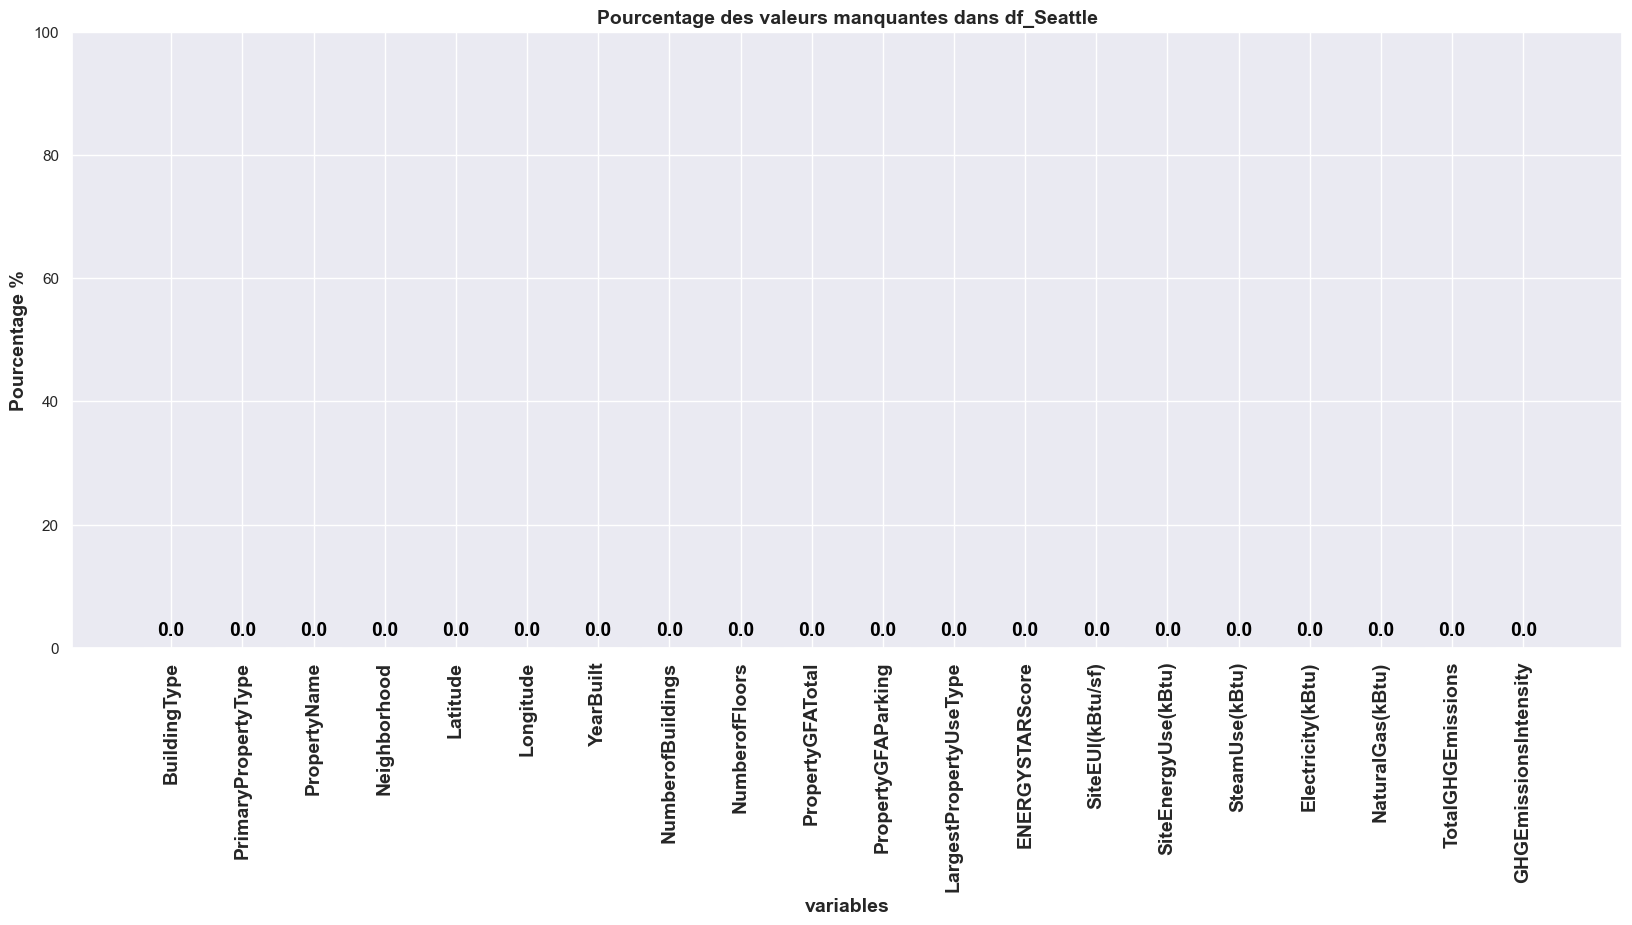

In [96]:
# Représentation graphique du pourcentage des valeurs manquantes pour chaque variable

sns.set_theme()
plt.figure(figsize=(20,8))
df_nan = (df_Seattle.isna().mean()*100).round(1)
barplot=plt.bar(df_nan.keys(), df_nan.values, color="blue")
plt.bar_label(barplot, labels=df_nan.values, label_type= "edge", 
              weight='bold', padding=6, color= 'black', fontsize=14)
plt.xticks(rotation=90, weight='bold', fontsize=14)
plt.ylim([0,100])
plt.ylabel("Pourcentage %", weight='bold', fontsize=14)
plt.xlabel('variables', weight='bold', fontsize=14)
plt.title('Pourcentage des valeurs manquantes dans df_Seattle', weight='bold', fontsize=14)
plt.show()

In [97]:
df_Seattle.isna().sum()

BuildingType              0
PrimaryPropertyType       0
PropertyName              0
Neighborhood              0
Latitude                  0
Longitude                 0
YearBuilt                 0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
PropertyGFAParking        0
LargestPropertyUseType    0
ENERGYSTARScore           0
SiteEUI(kBtu/sf)          0
SiteEnergyUse(kBtu)       0
SteamUse(kBtu)            0
Electricity(kBtu)         0
NaturalGas(kBtu)          0
TotalGHGEmissions         0
GHGEmissionsIntensity     0
dtype: int64

In [98]:
# pourcentage des valeurs manquantes pour chaque variable
df_Seattle.isna().mean()*100

BuildingType              0.0
PrimaryPropertyType       0.0
PropertyName              0.0
Neighborhood              0.0
Latitude                  0.0
Longitude                 0.0
YearBuilt                 0.0
NumberofBuildings         0.0
NumberofFloors            0.0
PropertyGFATotal          0.0
PropertyGFAParking        0.0
LargestPropertyUseType    0.0
ENERGYSTARScore           0.0
SiteEUI(kBtu/sf)          0.0
SiteEnergyUse(kBtu)       0.0
SteamUse(kBtu)            0.0
Electricity(kBtu)         0.0
NaturalGas(kBtu)          0.0
TotalGHGEmissions         0.0
GHGEmissionsIntensity     0.0
dtype: float64

In [99]:
# Informations sur le jeu de données df_Seattle

df_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            1548 non-null   object 
 1   PrimaryPropertyType     1548 non-null   object 
 2   PropertyName            1548 non-null   object 
 3   Neighborhood            1548 non-null   object 
 4   Latitude                1548 non-null   float64
 5   Longitude               1548 non-null   float64
 6   YearBuilt               1548 non-null   int64  
 7   NumberofBuildings       1548 non-null   float64
 8   NumberofFloors          1548 non-null   int64  
 9   PropertyGFATotal        1548 non-null   int64  
 10  PropertyGFAParking      1548 non-null   int64  
 11  LargestPropertyUseType  1548 non-null   object 
 12  ENERGYSTARScore         1548 non-null   float64
 13  SiteEUI(kBtu/sf)        1548 non-null   float64
 14  SiteEnergyUse(kBtu)     1548 non-null   

### Qualitative - Qualitative
### Analyse des deux variables qualitatives 'LargestPropertyUseType' et  'BuildingType' avec le Chi-2


In [100]:
# Afficher les variables catégorielles 
df_Seattle.select_dtypes(include=['O']).columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Neighborhood',
 'LargestPropertyUseType']

In [101]:
# afficher le tableau de contingence
X = 'LargestPropertyUseType'
Y = 'BuildingType'
contingence = df_Seattle[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contingence = contingence.fillna(0)
contingence

BuildingType                                     Campus  NonResidential  \
LargestPropertyUseType                                                    
Automobile Dealership                               0.0             5.0   
Bank Branch                                         0.0             4.0   
Distribution Center                                 0.0            52.0   
Education                                          11.0            61.0   
Financial Office                                    0.0             4.0   
Fitness Center/Health Club/Gym                      0.0             4.0   
Laboratory                                          0.0            13.0   
Manufacturing/Industrial Plant                      1.0             7.0   
Museum                                              0.0             3.0   
Non-Refrigerated Warehouse                          0.0           190.0   
Office                                              2.0           473.0   
Other                                               5.0            77.0   
Other - Recreation                                  0.0            11.0   
Other - Services                                    0.0             3.0   
Parking                                             1.0            29.0   
Personal Services                                   0.0             5.0   
Public Services                                     0.0            21.0   
Refrigerated Warehouse                              0.0            12.0   
Repair Services (Vehicle, Shoe, Locksmith, etc)     0.0             4.0   
Restaurant                                          1.0            13.0   
Retail Store                                        2.0            92.0   
Self-Storage Facility                               0.0            28.0   
Senior Care Community                               0.0            20.0   
Small- and Mid-Sized Office                         0.0             1.0   
Social/Meeting Hall                                 0.0            10.0   
Strip Mall                                          0.0             6.0   
Supermarket/Grocery Store                           0.0            41.0   
Worship Facility                                    0.0            69.0   
public health                                       0.0            58.0   
tourism                                             1.0           116.0   
Total                                              24.0          1432.0   

BuildingType                                     Nonresidential COS  \
LargestPropertyUseType                                                
Automobile Dealership                                           0.0   
Bank Branch                                                     0.0   
Distribution Center                                             2.0   
Education                                                       4.0   
Financial Office                                                0.0   
Fitness Center/Health Club/Gym                                  1.0   
Laboratory                                                      0.0   
Manufacturing/Industrial Plant                                  0.0   
Museum                                                          2.0   
Non-Refrigerated Warehouse                                      7.0   
Office                                                         10.0   
Other                                                          20.0   
Other - Recreation                                             20.0   
Other - Services                                                3.0   
Parking                                                         0.0   
Personal Services                                               2.0   
Public Services                                                 7.0   
Refrigerated Warehouse                                          0.0   
Repair Services (Vehicle, Shoe, Locksmith, etc)                 2.0   
Restaurant                       

In [102]:
from scipy.stats import chi2_contingency as chi2_contingency
khi2, pval , ddl , contingence_chi2 = chi2_contingency(contingence)
print(pval)

9.449467882596508e-58


On va considérer qu'il existe un lien entre ces deux variables qualitatives si la p-value est inférieur à 0,05. 
La p-valeur de ce test est inférieure à 5 %. On rejette donc l'hypothèse  $H_{0}$.

Ce test Chi-2 montre bien qu'il existe un lien entre les deux variables qualitatives 'LargestPropertyUseType' et 'BuildingType'.

### Analyse des deux variables qualitatives 'PrimaryPropertyType' et 'Neighborhood' avec le Chi-2

In [103]:
# afficher le tableau de contingence
X = 'PrimaryPropertyType'
Y = 'Neighborhood'
contingence = df_Seattle[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contingence = contingence.fillna(0)
contingence

Neighborhood                 BALLARD  CENTRAL  DELRIDGE  DOWNTOWN   EAST  \
PrimaryPropertyType                                                        
Distribution Center              1.0      0.0       5.0       0.0    0.0   
Education                        2.0      9.0       4.0       6.0   15.0   
Laboratory                       0.0      0.0       0.0       2.0    1.0   
Large Office                     0.0      0.0       1.0     101.0    0.0   
Low-Rise Multifamily             0.0      0.0       0.0       1.0    0.0   
Mixed Use Property               6.0      2.0       0.0      31.0   15.0   
Other                           12.0     11.0      11.0      40.0   21.0   
Refrigerated Warehouse           0.0      0.0       0.0       0.0    0.0   
Restaurant                       1.0      0.0       0.0       7.0    0.0   
Retail Store                     5.0      2.0       6.0      19.0    4.0   
Self-Storage Facility            2.0      1.0       1.0       3.0    1.0   
Senior Care Community            1.0      2.0       0.0       2.0    3.0   
Small- and Mid-Sized Office     12.0     10.0       5.0      86.0   19.0   
Supermarket/Grocery Store        4.0      1.0       0.0       0.0    3.0   
Warehouse                        9.0      2.0       5.0       6.0    4.0   
Worship Facility                 6.0      2.0       2.0       2.0    6.0   
public health                    1.0      4.0       1.0       2.0   17.0   
tourism                          1.0      0.0       0.0      43.0    7.0   
Total                           63.0     46.0      41.0     351.0  116.0   

Neighborhood                 GREATER DUWAMISH  LAKE UNION  \
PrimaryPropertyType                                         
Distribution Center                      42.0         2.0   
Education                                 2.0         2.0   
Laboratory                                0.0         5.0   
Large Office                             11.0        32.0   
Low-Rise Multifamily                      0.0         1.0   
Mixed Use Property                       18.0        17.0   
Other                                    49.0         7.0   
Refrigerated Warehouse                   12.0         0.0   
Restaurant                                0.0         3.0   
Retail Store                             13.0         6.0   
Self-Storage Facility                     5.0         0.0   
Senior Care Community                     0.0         1.0   
Small- and Mid-Sized Office              40.0        45.0   
Supermarket/Grocery Store                 4.0         1.0   
Warehouse                               128.0         7.0   
Worship Facility                          2.0         1.0   
public health                             0.0         2.0   
tourism                                   2.0        11.0   
Total                                   328.0       143.0   

Neighborhood                 MAGNOLIA / QUEEN ANNE  NORTH  NORTHEAST  \
PrimaryPropertyType                                                    
Distribution Center                            3.0    0.0        0.0   
Education                                      8.0    3.0       10.0   
Laboratory                                     2.0    0.0        0.0   
Large Office                                  18.0    1.0        5.0   
Low-Rise Multifamily                           0.0    0.0        0.0   
Mixed Use Property                             6.0    4.0        7.0   
Other                                         30.0   19.0       18.0   
Refrigerated Warehouse                         0.0    0.0        0.0   
Restaurant                                     0.0    0.0        0.0   
Retail Store                                   3.0    5.0       13.0   
Self-Storage Facility                          5.0    2.0        5.0   
Senior Care Community                          1.0    3.0        0.0   
Small- and Mid-Sized Office                   37.0    9.0        7.0   
Supermarket/Grocery Store                

In [104]:
from scipy.stats import chi2_contingency as chi2_contingency
khi2, pval , ddl , contingence_chi2 = chi2_contingency(contingence)
print(pval)

2.583218199763399e-138


Ce test Chi-2 montre bien qu'il existe un lien entre les deux variables qualitatives 'PrimaryPropertyType' et 'Neighborhood'.

### Localisation avec folium

Voir https://medium.com/analytics-vidhya/a-look-at-folium-bf1b4784ca5d

In [105]:
# installer folium
!pip install folium

In [106]:
# afficher les deux premières lignes de dataset df_Seattle
df_Seattle.head(2)

BuildingType PrimaryPropertyType          PropertyName Neighborhood  \
0  NonResidential             tourism  Mayflower park hotel     DOWNTOWN   
1  NonResidential             tourism       Paramount Hotel     DOWNTOWN   

   Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0  47.61220 -122.33799       1927                1.0              12   
1  47.61317 -122.33393       1996                1.0              11   

   PropertyGFATotal  PropertyGFAParking LargestPropertyUseType  \
0             88434                   0                tourism   
1            103566               15064                tourism   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0             60.0         81.699997            7226362.5       2003882.0   
1             61.0         94.800003            8387933.0             0.0   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0          3946027.0         1276453.0             249.98   
1          3242851.0         5145082.0             295.86   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86

On va utiliser arbitrairement les coordonnées géographiques (Latitude et Longitude) de 'Mayflower park hotel' de la première ligne de dataset df_Seattle pour tester folium.

In [107]:
# on va tester folium avec les coordonnées géographiques (Latitude et Longitude)
# de 'Mayflower park hotel' pour localiser Seattle:
import folium
from folium import plugins
Géolocalisation = [47.61220, -122.33799]
localisation  = folium.Map(location=Géolocalisation,zoom_start=10)
folium.Marker([47.61220, -122.33799], 
                      popup='Mayflower park hotel').add_to(localisation)
localisation

In [108]:
# Géolocalisation des bâtiments:
from folium import plugins
Géolocalisation = [47.61220, -122.33799]
localisation  = folium.Map(location=Géolocalisation,zoom_start=15)
for x in range(0,len(df_Seattle)):
    folium.Marker([df_Seattle.iloc[x]['Latitude'],df_Seattle.iloc[x]['Longitude']], 
                      popup=df_Seattle.iloc[x]['PropertyName']).add_to(localisation)
localisation

In [109]:
# Géolocalisation des bâtiments avec HeatMap:
Latitude_Seattle = df_Seattle['Latitude']
Longitude_Seattle = df_Seattle['Longitude']
heatmap = folium.Map(location=[47.61220, -122.33799],
                     zoom_start = 10)


folium.plugins.HeatMap(list(zip(Latitude_Seattle,
                                Longitude_Seattle)),
                       radius=20,
                       blur=25).add_to(heatmap)
heatmap

In [110]:
# colonnes à supprimerà ce stade
df_Seattle = df_Seattle.drop(columns =['Latitude',
 'Longitude',
 'SiteEUI(kBtu/sf)',
 'GHGEmissionsIntensity']
)
# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df_Seattle.shape}")

Nombre de (lignes, colonnes) = (1548, 16)


### Analyse multivariée

### Analyse en composantes principales ACP

Dans cette partie de l'analyse en composantes principales on va s'inspirer des cours d'OpenClassrooms https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp:

In [111]:
# créer une liste des variables à analyser avec une ACP
variables_ACP = ['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'ENERGYSTARScore',
 'TotalGHGEmissions',
 'SiteEnergyUse(kBtu)',
 'PropertyGFATotal',
 'PropertyGFAParking']

In [112]:
# Matrice des données
X = df_Seattle[variables_ACP].values
X[:5]

array([[1.92700000e+03, 1.00000000e+00, 1.20000000e+01, 2.00388200e+06,
        3.94602700e+06, 1.27645300e+06, 6.00000000e+01, 2.49980000e+02,
        7.22636250e+06, 8.84340000e+04, 0.00000000e+00],
       [1.99600000e+03, 1.00000000e+00, 1.10000000e+01, 0.00000000e+00,
        3.24285100e+06, 5.14508200e+06, 6.10000000e+01, 2.95860000e+02,
        8.38793300e+06, 1.03566000e+05, 1.50640000e+04],
       [1.96900000e+03, 1.00000000e+00, 4.10000000e+01, 2.15665540e+07,
        4.95266640e+07, 1.49380000e+06, 4.30000000e+01, 2.08928000e+03,
        7.25870240e+07, 9.56110000e+05, 1.96718000e+05],
       [1.92600000e+03, 1.00000000e+00, 1.00000000e+01, 2.21444625e+06,
        2.76892400e+06, 1.81121300e+06, 5.60000000e+01, 2.86430000e+02,
        6.79458400e+06, 6.13200000e+04, 0.00000000e+00],
       [1.98000000e+03, 1.00000000e+00, 1.80000000e+01, 0.00000000e+00,
        5.36860700e+06, 8.80399800e+06, 7.50000000e+01, 5.05010000e+02,
        1.41726060e+07, 1.75580000e+05, 6.20000000e+

In [113]:
# scaler les données
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[:5]
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]
# Nombre composantes :
n_components = 6
pca = PCA(n_components=n_components)
# entrainer sur les données scalées : 
pca.fit(X_scaled)
# variance pour chaque composante. 
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree
# somme cumulée numpy avec la fonction cumsum :
scree_cum = scree.cumsum().round()
scree_cum
# Définisons ensuite une variable avec la liste des composantes : 
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

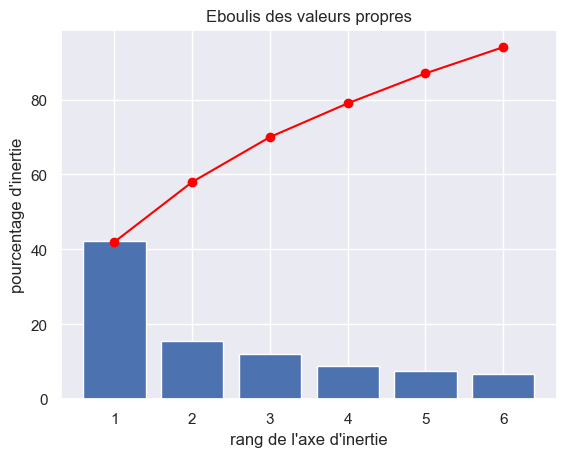

In [114]:
# visiualisation de l'Eboulis des valeurs propres
sns.set_theme()
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée. On voit ici le premier plan factoriel représente près de 60 % de l’inertie totale.

In [115]:
# définir la variable pcs :
pcs = pca.components_
pcs

array([[ 0.0471459 ,  0.34177622,  0.14197843,  0.30665215,  0.43768107,
         0.20034197, -0.00742525,  0.39059369,  0.45413471,  0.40461563,
         0.11180576],
       [-0.30330647,  0.12013644, -0.54607089,  0.14780719, -0.02023549,
         0.20373826, -0.25437001,  0.2147106 ,  0.08636591, -0.20612946,
        -0.60898285],
       [ 0.33420589, -0.3905842 ,  0.08687355, -0.16453055, -0.12845928,
         0.65477309, -0.2922996 ,  0.31549147,  0.04003851, -0.20168635,
         0.16926046],
       [-0.5686013 , -0.18451131,  0.21820254, -0.07944302, -0.05663859,
         0.33132521,  0.66486373,  0.16341304,  0.02798303, -0.05981556,
        -0.0513003 ],
       [-0.61392078, -0.12971681,  0.42589304,  0.07236022, -0.0033649 ,
        -0.09325706, -0.62708351, -0.02138433, -0.02732974,  0.03206538,
         0.12441709],
       [ 0.15148014, -0.36940334,  0.12466396,  0.78377157, -0.1385474 ,
        -0.25748189,  0.11589107,  0.2469338 , -0.07170702, -0.20718875,
        -0.052

In [116]:
#  Afficher les variable dans un dataframe :
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0  0.047146  0.341776  0.141978  0.306652  0.437681  0.200342 -0.007425   
1 -0.303306  0.120136 -0.546071  0.147807 -0.020235  0.203738 -0.254370   
2  0.334206 -0.390584  0.086874 -0.164531 -0.128459  0.654773 -0.292300   
3 -0.568601 -0.184511  0.218203 -0.079443 -0.056639  0.331325  0.664864   
4 -0.613921 -0.129717  0.425893  0.072360 -0.003365 -0.093257 -0.627084   
5  0.151480 -0.369403  0.124664  0.783772 -0.138547 -0.257482  0.115891   

         7         8         9         10  
0  0.390594  0.454135  0.404616  0.111806  
1  0.214711  0.086366 -0.206129 -0.608983  
2  0.315491  0.040039 -0.201686  0.169260  
3  0.163413  0.027983 -0.059816 -0.051300  
4 -0.021384 -0.027330  0.032065  0.124417  
5  0.246934 -0.071707 -0.207189 -0.052797

<AxesSubplot:>

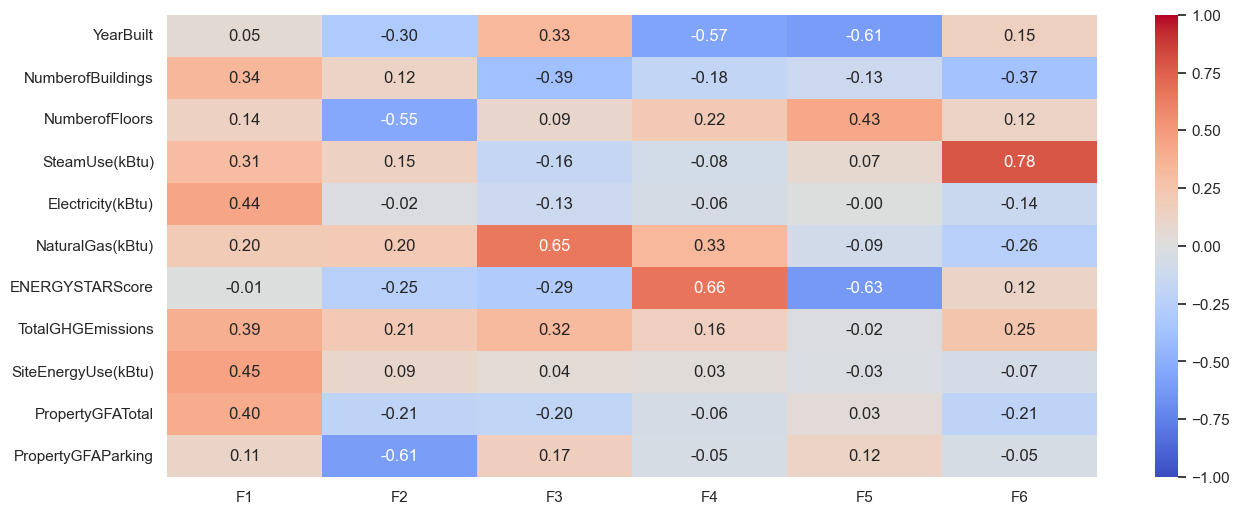

In [117]:
# définir les variables
pcs.columns = variables_ACP
pcs.index = [f"F{i}" for i in x_list]
# arrondir les résultats pour simplifier l'analyse 
pcs.round(2)
# afficher de façon graphique 
sns.set_theme()
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

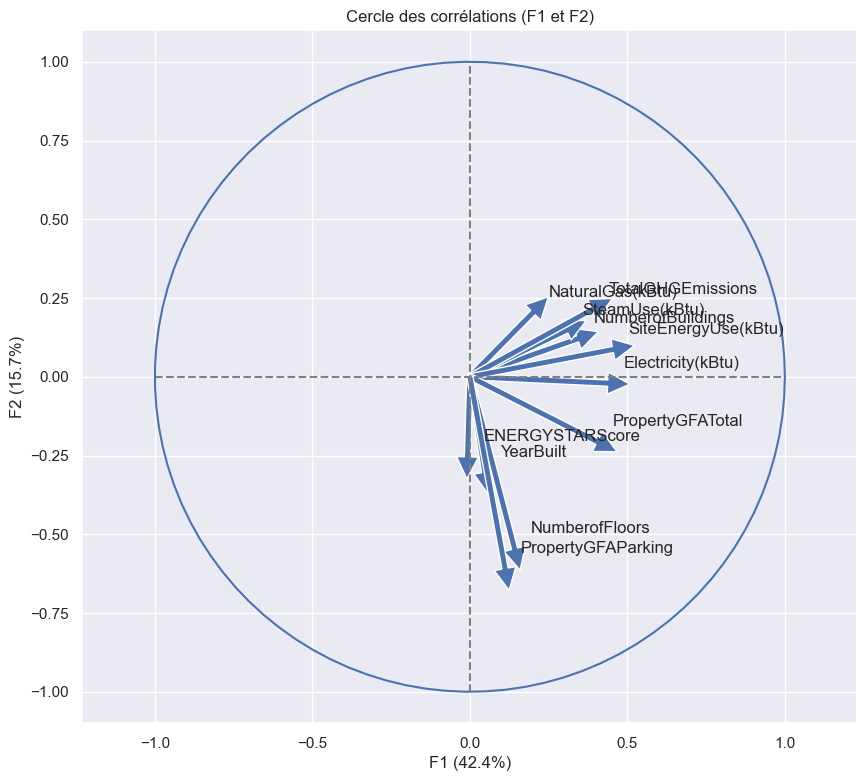

In [118]:
# Définir les axes x et y. Nous allons utiliser les 2 premières composantes
x, y = 0,1
sns.set_theme()
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             variables_ACP[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [119]:
# dfinir une fonction pour afficher le graphe des correlations
sns.set_theme()
def correlation_graph(pca, 
                      x_y, 
                      variables_ACP): 
    """Affiche le graphe des correlations"""
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                variables_ACP[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

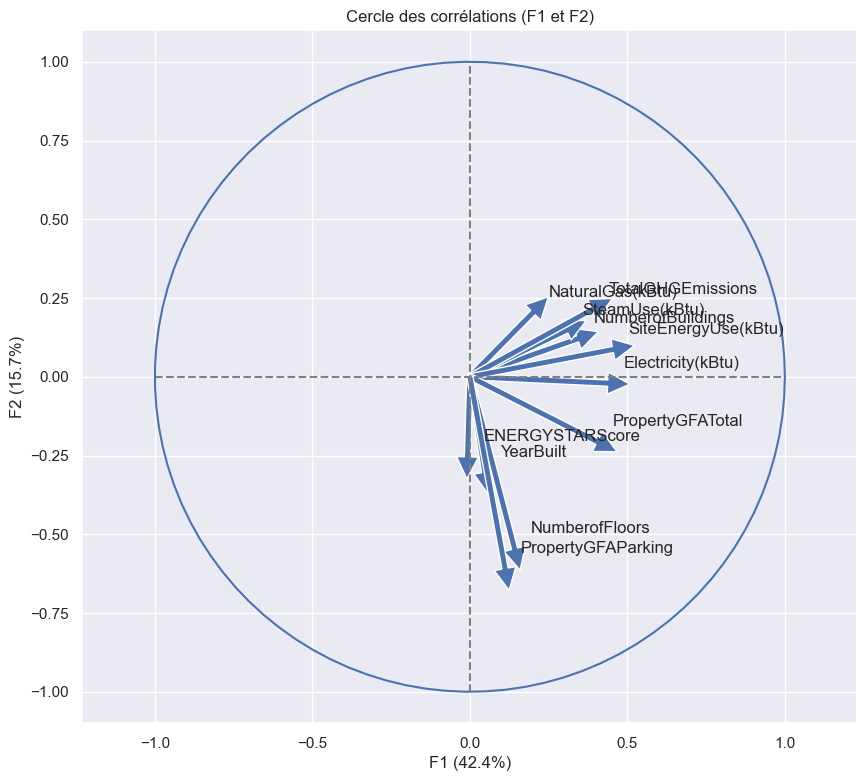

In [120]:
# Appliquer la fonction sur F1 et F2 
# préciser 0 et 1 pour F1 et F2
x_y = (0,1)
x_y

# Appliquer la fonction sur F1 et F2 
sns.set_theme()
correlation_graph(pca, x_y, variables_ACP)

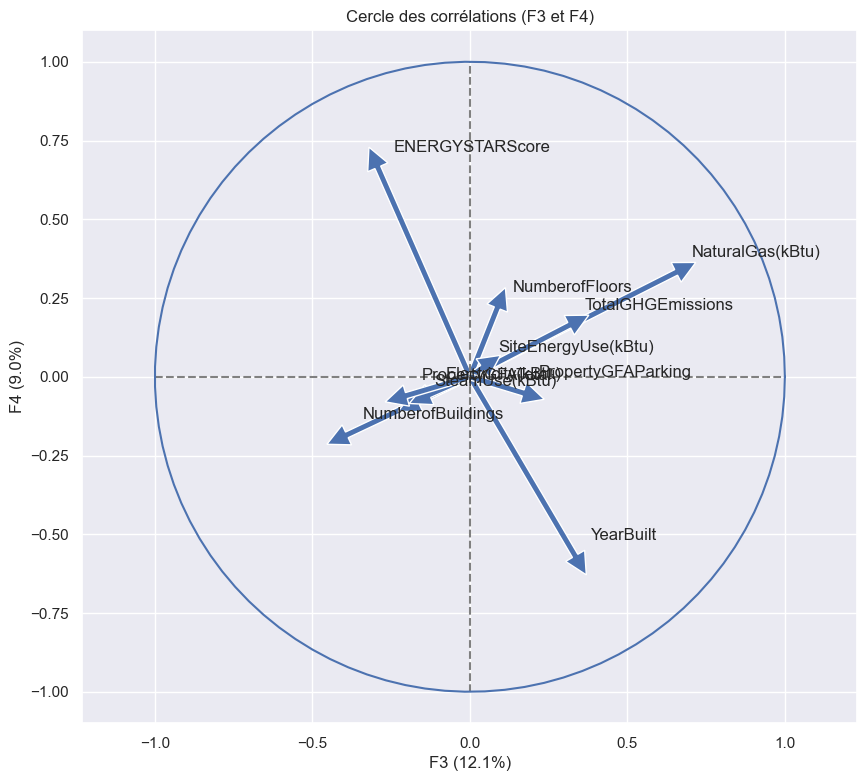

In [121]:
# Appliquer la fonction sur F3 et F4 
correlation_graph(pca, (2,3), variables_ACP)

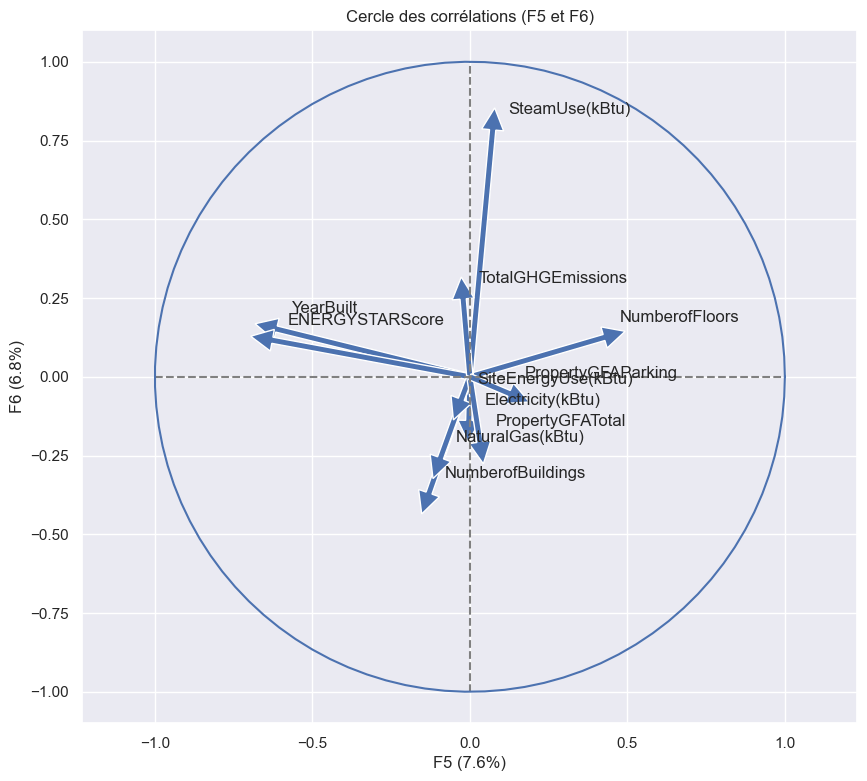

In [122]:
# Appliquer la fonction sur F5 et F6 
correlation_graph(pca, (4,5), variables_ACP)

### Projection

In [123]:
# calcul les coordonnées dans le nouvel espace 
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 3.69060045e-02, -6.28759794e-04, -2.53263542e-01,
         6.96167427e-01,  1.26923343e+00,  2.71249829e-01],
       [ 1.71021680e-01, -7.41710346e-01,  8.14082247e-01,
        -3.49157464e-01, -1.29155575e-01,  1.86373047e-01],
       [ 6.21220294e+00, -4.70928810e+00,  9.56388723e-01,
         7.88338652e-02,  3.54508935e+00,  2.90506555e+00],
       [-3.05894750e-02,  2.58163583e-01, -1.69889112e-01,
         5.66202326e-01,  1.26388986e+00,  2.63174359e-01],
       [ 8.13078897e-01, -1.86451429e+00,  1.02648369e+00,
         6.50601047e-01,  3.28426436e-01,  1.47740872e-01]])

In [124]:
# dfinir une fonction pour afficher la projection
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points f clusters is No
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    # c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection (sur F{x+1} et F{y+1})")
    sns.set_theme()
    plt.show()

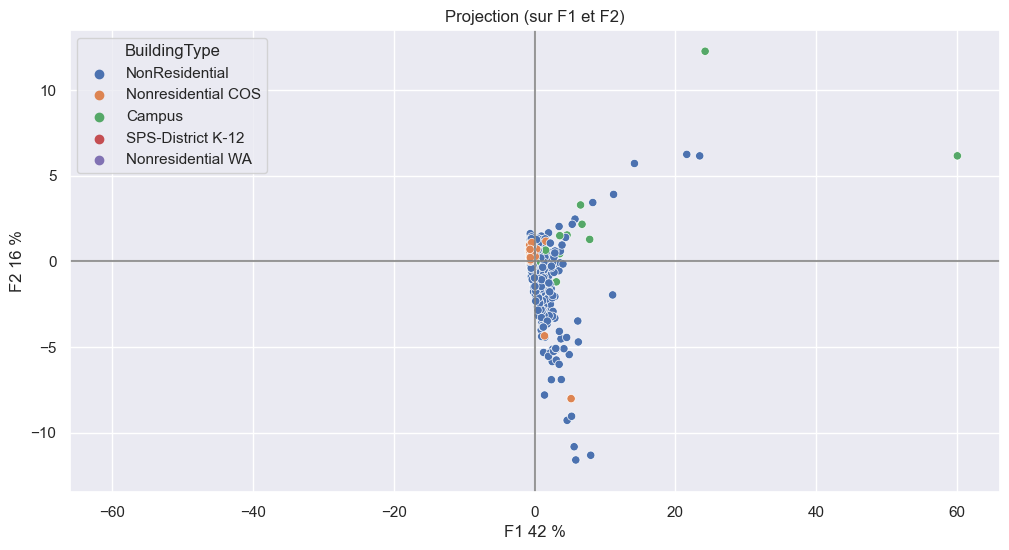

In [125]:
# Appliquer la fonction sur F1 et F2 
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(12,6), clusters = df_Seattle['BuildingType'], marker="o")

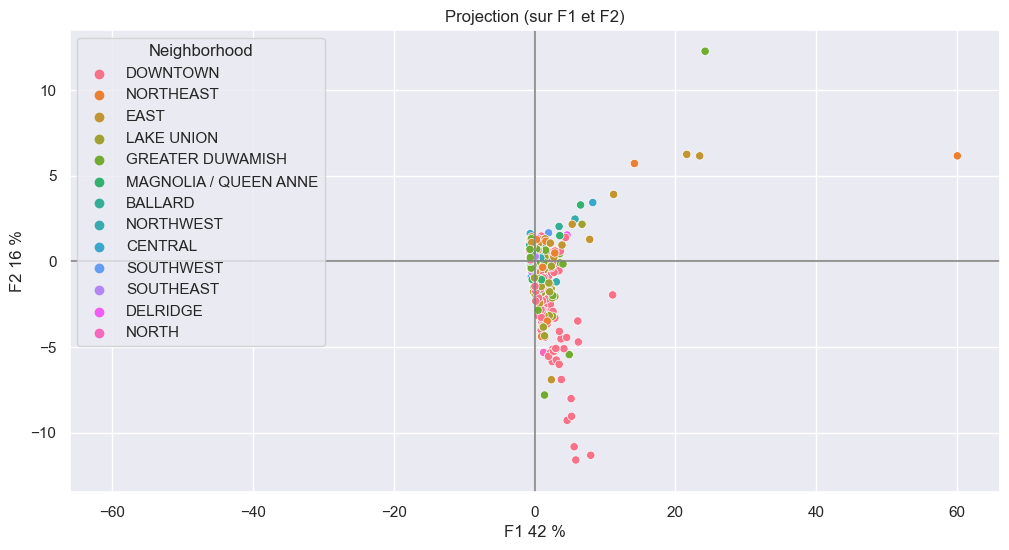

In [126]:
# Appliquer la fonction sur F1 et F2 
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(12,6), clusters = df_Seattle['Neighborhood'], marker="o")

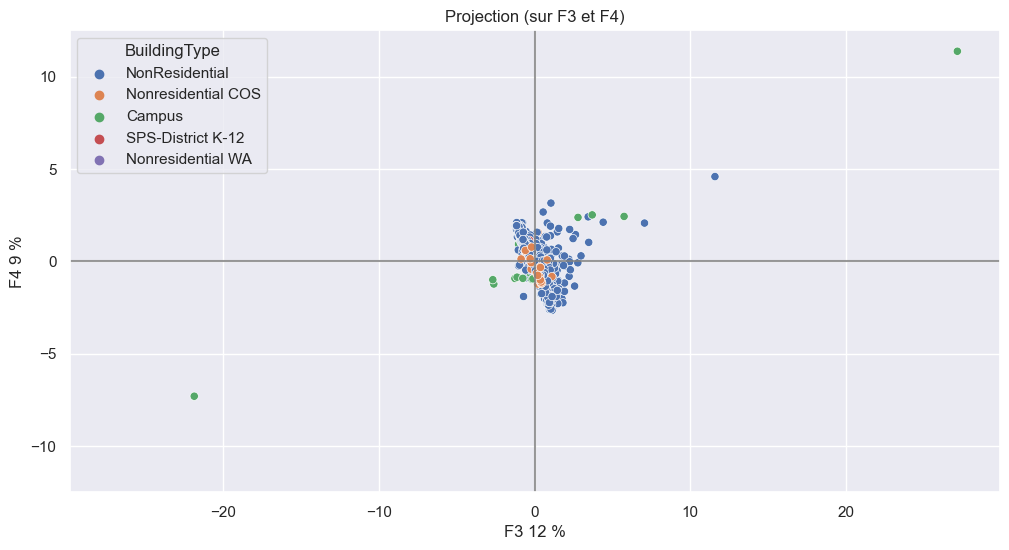

In [127]:
# Appliquer la fonction sur F3 et F4
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(12,6), clusters = df_Seattle['BuildingType'], marker="o")

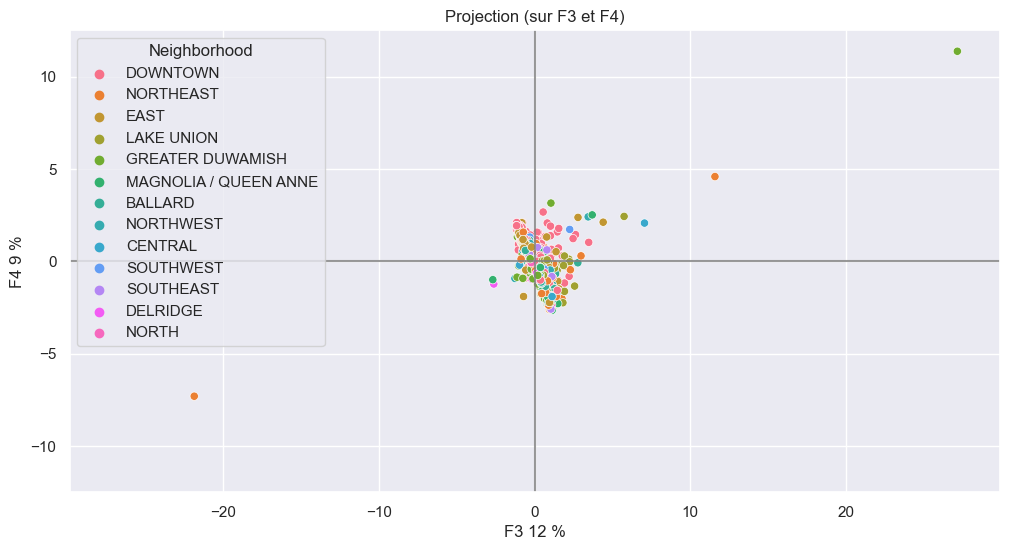

In [128]:
# Appliquer la fonction sur F3 et F4
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(12,6), clusters = df_Seattle['Neighborhood'], marker="o")

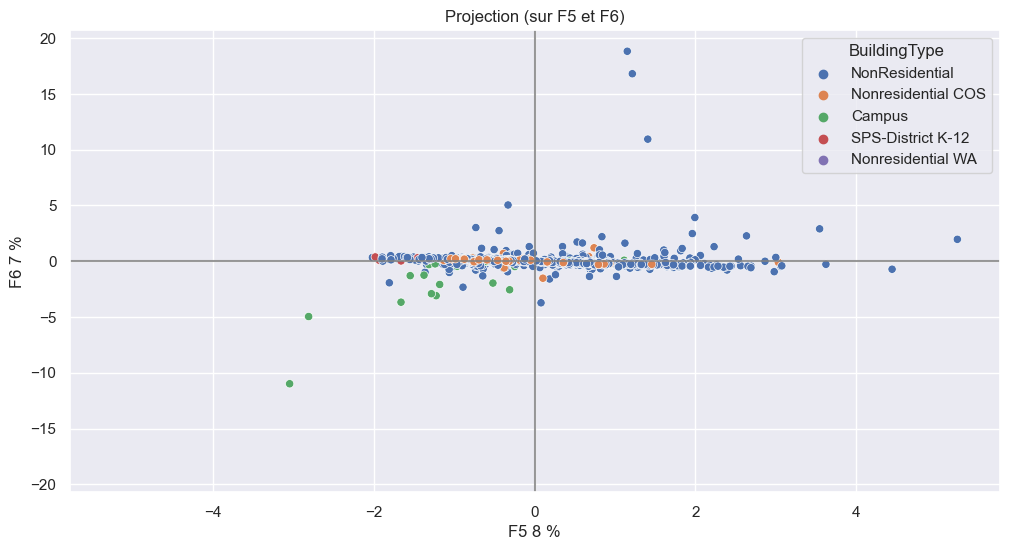

In [129]:
# Appliquer la fonction sur F5 et F6 
x_y = [4,5]
display_factorial_planes(X_proj, x_y, pca, figsize=(12,6), clusters = df_Seattle['BuildingType'], marker="o")

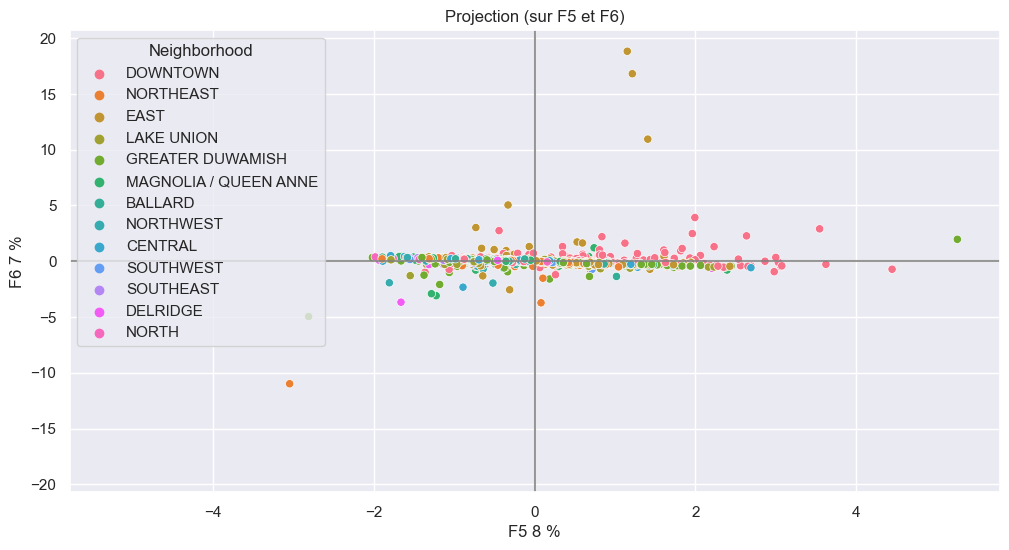

In [130]:
# Appliquer la fonction sur F5 et F6
x_y = [4,5]
display_factorial_planes(X_proj, x_y, pca, figsize=(12,6), clusters = df_Seattle['Neighborhood'], marker="o")

On peut constater des corrélations entre les composantes et les variables; la première composante principale présente relativement la quantité annuelle d'énergie consommée. La deuxième composante principale est inversement corrélée avec le nombre d'étages et la la variable 'PropertyGFAParking', la troisième composante présente la quantité annuelle de gaz naturel consommée, la 4eme présente la variable ENERGYSTARScore, et inversement corrélée avec l'année de construction , la 5ème présente la quantité annuelle de vapeur consommée et finalement la 6ème composante principale présente la variable 'SteamUse(kBtu)'.

###  Transformation Log(x+1) : variables quantitatives à forte asymétrie

In [131]:
# créer une copie de df_Seattle nommée df
df = df_Seattle.copy()

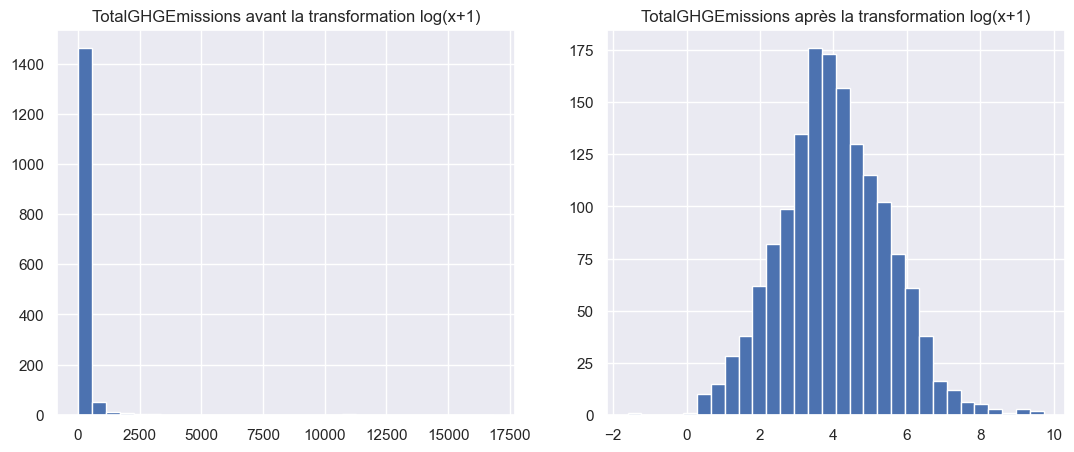

In [132]:
# Transformation Log(x+1) 
df['TotalGHGEmissions_log'] = np.log(df['TotalGHGEmissions']+1)

# histogramme avant et après la transformation Log(x+1) 
fig, axs = plt.subplots(1, 2, figsize=(13,5))
axs[0].hist(TotalGHGEmissions, bins=30)
axs[1].hist(df['TotalGHGEmissions_log'], bins=30)
axs[0].set_title('TotalGHGEmissions avant la transformation log(x+1)')
axs[1].set_title('TotalGHGEmissions après la transformation log(x+1)')
plt.show()

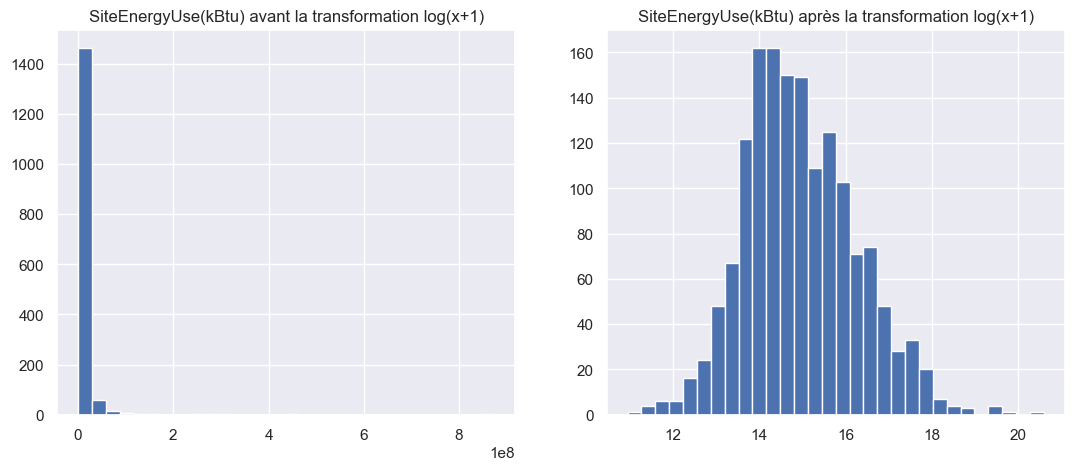

In [133]:
# Transformation Log(x+1) 
df['SiteEnergyUse_log'] = np.log(df['SiteEnergyUse(kBtu)']+1)

# histogramme avant et après la transformation Log(x+1) 
fig, axs = plt.subplots(1, 2, figsize=(13,5))
axs[0].hist(SiteEnergyUse, bins=30)
axs[1].hist(df['SiteEnergyUse_log'], bins=30)
axs[0].set_title('SiteEnergyUse(kBtu) avant la transformation log(x+1)')
axs[1].set_title('SiteEnergyUse(kBtu) après la transformation log(x+1)')
plt.show()


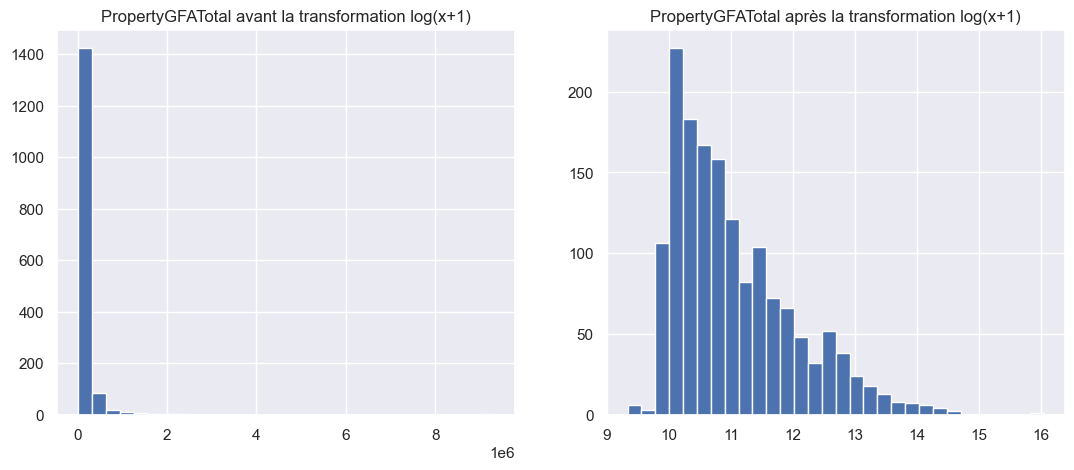

In [134]:
# Transformation Log(x+1): 'PropertyGFATotal'
df['PropertyGFATotal_log'] = np.log(df['PropertyGFATotal']+1)

# histogramme avant et après la transformation Log(x+1) 
fig, axs = plt.subplots(1, 2, figsize=(13,5))
axs[0].hist(df['PropertyGFATotal'], bins=30)
axs[1].hist(df['PropertyGFATotal_log'], bins=30)
axs[0].set_title('PropertyGFATotal avant la transformation log(x+1)')
axs[1].set_title('PropertyGFATotal après la transformation log(x+1)')
plt.show()

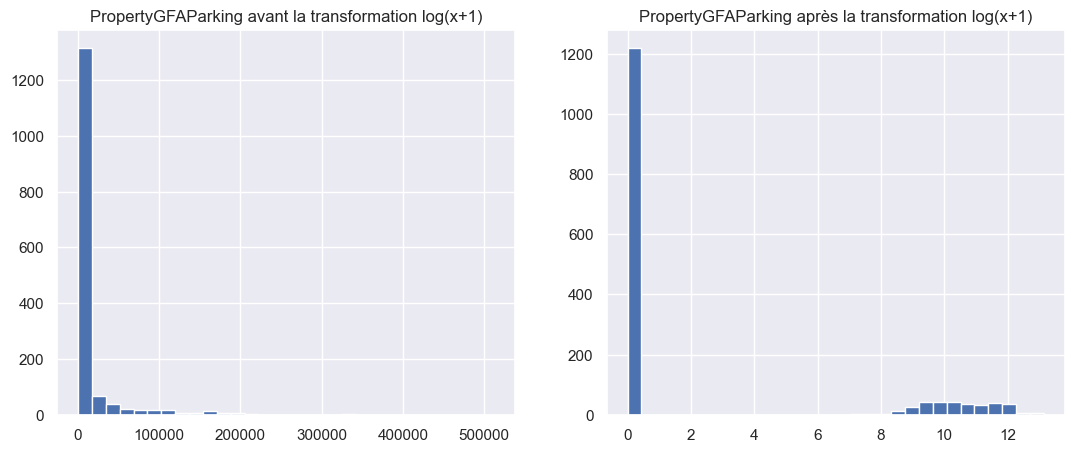

In [135]:
# Transformation Log(x+1) : 'PropertyGFAParking'
df['PropertyGFAParking_log'] = np.log(df['PropertyGFAParking']+1)

# histogramme avant et après la transformation Log(x+1) 
fig, axs = plt.subplots(1, 2, figsize=(13,5))
axs[0].hist(df['PropertyGFAParking'], bins=30)
axs[1].hist(df['PropertyGFAParking_log'], bins=30)
axs[0].set_title('PropertyGFAParking avant la transformation log(x+1)')
axs[1].set_title('PropertyGFAParking après la transformation log(x+1)')
plt.show()

In [136]:
# Afficher df
df

BuildingType PrimaryPropertyType  \
0         NonResidential             tourism   
1         NonResidential             tourism   
2         NonResidential             tourism   
3         NonResidential             tourism   
4         NonResidential             tourism   
...                  ...                 ...   
3370  Nonresidential COS               Other   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Neighborhood  YearBuilt  \
0                    Mayflower park hotel               DOWNTOWN       1927   
1                         Paramount Hotel               DOWNTOWN       1996   
2                 5673-The Westin Seattle               DOWNTOWN       1969   
3                               HOTEL MAX               DOWNTOWN       1926   
4             WARWICK SEATTLE HOTEL (ID8)               DOWNTOWN       1980   
...                                   ...                    ...        ...   
3370          High Point Community Center               DELRIDGE       1982   
3372  International district/Chinatown CC               DOWNTOWN       2004   
3373                      Queen Anne Pool  MAGNOLIA / QUEEN ANNE       1974   
3374          South Park Community Center       GREATER DUWAMISH       1989   
3375          Van Asselt Community Center       GREATER DUWAMISH       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3370                1.0               1             18261                   0   
3372                1.0               1             16000                   0   
3373                1.0               1             13157                   0   
3374                1.0               1             14101                   0   
3375                1.0               1             18258                   0   

     LargestPropertyUseType  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                   tourism             60.0         7.226362e+06   
1                   tourism             61.0         8.387933e+06   
2                   tourism             43.0         7.258702e+07   
3                   tourism             56.0         6.794584e+06   
4                   tourism             75.0         1.417261e+07   
...                     ...              ...                  ...   
3370     Other - Recreation             60.0         9.320821e+05   
3372     Other - Recreation             60.0         9.502762e+05   
3373     Other - Recreation             60.0         5.765898e+06   
3374     Other - Recreation             60.0         7.194712e+05   
3375     Other - Recreation             60.0         1.152896e+06   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0         2003882.00       3.946027e+06      1.276453e+06             249.98   
1               0.00       3.242851e+06      5.145082e+06             295.86   
2        21566554.00       4.952666e+07      1.493800e+06            2089.28   
3         2214446.25       2.768924e+06      1.811213e+06             286.43   
4               0.00       5.368607e+06      8.803998e+06             505.01   
...              ...                ...               ...                ...   
3370            0.00       6.323620e+05      2.997200e+05              20.33   
3372            0.00       3.965461e+05     

#### 'YearBuilt' : Transformation en décennie 

In [137]:
# Transformation de la variable 'YearBuilt' en décennie
df['YearBuilt'] = (10 * (df['YearBuilt'] // 10)) # floor division
df

BuildingType PrimaryPropertyType  \
0         NonResidential             tourism   
1         NonResidential             tourism   
2         NonResidential             tourism   
3         NonResidential             tourism   
4         NonResidential             tourism   
...                  ...                 ...   
3370  Nonresidential COS               Other   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Neighborhood  YearBuilt  \
0                    Mayflower park hotel               DOWNTOWN       1920   
1                         Paramount Hotel               DOWNTOWN       1990   
2                 5673-The Westin Seattle               DOWNTOWN       1960   
3                               HOTEL MAX               DOWNTOWN       1920   
4             WARWICK SEATTLE HOTEL (ID8)               DOWNTOWN       1980   
...                                   ...                    ...        ...   
3370          High Point Community Center               DELRIDGE       1980   
3372  International district/Chinatown CC               DOWNTOWN       2000   
3373                      Queen Anne Pool  MAGNOLIA / QUEEN ANNE       1970   
3374          South Park Community Center       GREATER DUWAMISH       1980   
3375          Van Asselt Community Center       GREATER DUWAMISH       1930   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3370                1.0               1             18261                   0   
3372                1.0               1             16000                   0   
3373                1.0               1             13157                   0   
3374                1.0               1             14101                   0   
3375                1.0               1             18258                   0   

     LargestPropertyUseType  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                   tourism             60.0         7.226362e+06   
1                   tourism             61.0         8.387933e+06   
2                   tourism             43.0         7.258702e+07   
3                   tourism             56.0         6.794584e+06   
4                   tourism             75.0         1.417261e+07   
...                     ...              ...                  ...   
3370     Other - Recreation             60.0         9.320821e+05   
3372     Other - Recreation             60.0         9.502762e+05   
3373     Other - Recreation             60.0         5.765898e+06   
3374     Other - Recreation             60.0         7.194712e+05   
3375     Other - Recreation             60.0         1.152896e+06   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0         2003882.00       3.946027e+06      1.276453e+06             249.98   
1               0.00       3.242851e+06      5.145082e+06             295.86   
2        21566554.00       4.952666e+07      1.493800e+06            2089.28   
3         2214446.25       2.768924e+06      1.811213e+06             286.43   
4               0.00       5.368607e+06      8.803998e+06             505.01   
...              ...                ...               ...                ...   
3370            0.00       6.323620e+05      2.997200e+05              20.33   
3372            0.00       3.965461e+05     

In [138]:
# afficher les valeurs uniques de la variable 'YearBuilt' dans l'ordre croissant

df['YearBuilt'].sort_values().unique()

array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,
       2010])

Text(0, 0.5, 'TotalGHGEmissions')

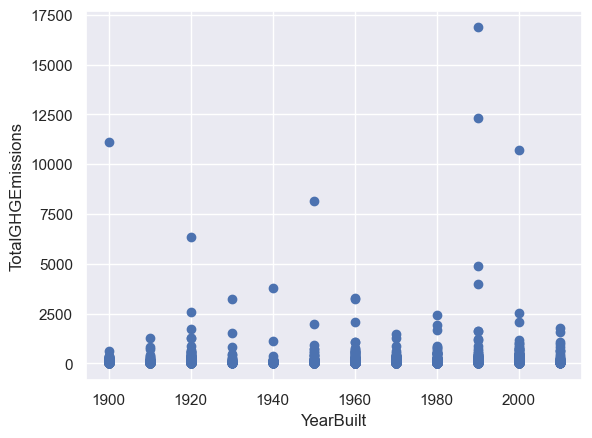

In [139]:
# scatterplot de la variable TotalGHGEmissions par décennie
plt.scatter(df['YearBuilt'], df['TotalGHGEmissions'])
plt.xlabel("YearBuilt")
plt.ylabel("TotalGHGEmissions")

Text(0, 0.5, 'SiteEnergyUse(kBtu)')

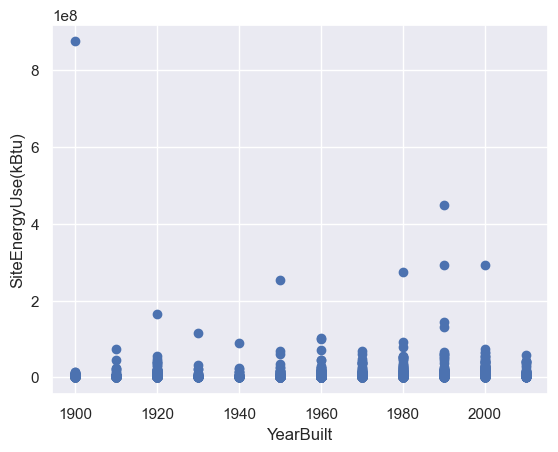

In [140]:
# scatterplot de la variable SiteEnergyUse(kBtu) par décennie
plt.scatter(df['YearBuilt'], df['SiteEnergyUse(kBtu)'])
plt.xlabel("YearBuilt")
plt.ylabel("SiteEnergyUse(kBtu)")

In [141]:
# afficher les variables qauntitatives 
df.select_dtypes(exclude=['O']).columns.tolist()

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'TotalGHGEmissions_log',
 'SiteEnergyUse_log',
 'PropertyGFATotal_log',
 'PropertyGFAParking_log']

In [142]:
# colonnes à supprimer de dataset 'df' après la transformation log(x+1)
df = df.drop(columns =['TotalGHGEmissions',
 'SiteEnergyUse(kBtu)',
 'PropertyGFATotal',
 'PropertyGFAParking'])
# Nombre de lignes et colonnes (taille du jeu de données df_Seattle)
print(f"Nombre de (lignes, colonnes) = {df.shape}")

Nombre de (lignes, colonnes) = (1548, 16)


In [143]:
# afficher les variables quantitatives
variables_quantitatives = df.select_dtypes(exclude=['O']).columns.tolist()
variables_quantitatives

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'ENERGYSTARScore',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions_log',
 'SiteEnergyUse_log',
 'PropertyGFATotal_log',
 'PropertyGFAParking_log']

In [144]:
# afficher le jeu de données df
df

BuildingType PrimaryPropertyType  \
0         NonResidential             tourism   
1         NonResidential             tourism   
2         NonResidential             tourism   
3         NonResidential             tourism   
4         NonResidential             tourism   
...                  ...                 ...   
3370  Nonresidential COS               Other   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Neighborhood  YearBuilt  \
0                    Mayflower park hotel               DOWNTOWN       1920   
1                         Paramount Hotel               DOWNTOWN       1990   
2                 5673-The Westin Seattle               DOWNTOWN       1960   
3                               HOTEL MAX               DOWNTOWN       1920   
4             WARWICK SEATTLE HOTEL (ID8)               DOWNTOWN       1980   
...                                   ...                    ...        ...   
3370          High Point Community Center               DELRIDGE       1980   
3372  International district/Chinatown CC               DOWNTOWN       2000   
3373                      Queen Anne Pool  MAGNOLIA / QUEEN ANNE       1970   
3374          South Park Community Center       GREATER DUWAMISH       1980   
3375          Van Asselt Community Center       GREATER DUWAMISH       1930   

      NumberofBuildings  NumberofFloors LargestPropertyUseType  \
0                   1.0              12                tourism   
1                   1.0              11                tourism   
2                   1.0              41                tourism   
3                   1.0              10                tourism   
4                   1.0              18                tourism   
...                 ...             ...                    ...   
3370                1.0               1     Other - Recreation   
3372                1.0               1     Other - Recreation   
3373                1.0               1     Other - Recreation   
3374                1.0               1     Other - Recreation   
3375                1.0               1     Other - Recreation   

      ENERGYSTARScore  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0                60.0      2003882.00       3.946027e+06      1.276453e+06   
1                61.0            0.00       3.242851e+06      5.145082e+06   
2                43.0     21566554.00       4.952666e+07      1.493800e+06   
3                56.0      2214446.25       2.768924e+06      1.811213e+06   
4                75.0            0.00       5.368607e+06      8.803998e+06   
...               ...             ...                ...               ...   
3370             60.0            0.00       6.323620e+05      2.997200e+05   
3372             60.0            0.00       3.965461e+05      5.537300e+05   
3373             60.0            0.00       1.792159e+06      3.973739e+06   
3374             60.0            0.00       3.488702e+05      3.706010e+05   
3375             60.0            0.00       4.325542e+05      7.203420e+05   

      TotalGHGEmissions_log  SiteEnergyUse_log  PropertyGFATotal_log  \
0                  5.525373          15.793246             11.390023   
1                  5.693261          15.942305             11.547974   
2                  7.645053          18.100297             13.770629   
3                  5.660979          15.731637             11.023878   
4                  6.226556          16.466822             12.075856   
...                     ...                ...                   ...   
3370               3.060115          13.745177              9.812578   
3372               3.501646          13.764509              9.680406   
3373               5.414054          15.567472              9.484785   
3374               3.140265         

### Binarisation des variables énergétiques : 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)'

In [145]:
# créer une liste des variables énergétiques nommée 'energy'
energy = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']

In [146]:
# afficher les statistiques descriptives des variables énergétiques
for variable in energy:
    print('-'*22)
    print(variable)
    print('-'*22)
    print(df[variable].describe())
    print('-'*22)

----------------------
Electricity(kBtu)
----------------------
count    1.548000e+03
mean     6.140840e+06
std      2.151071e+07
min     -1.154170e+05
25%      7.308642e+05
50%      1.746086e+06
75%      5.264935e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64
----------------------
----------------------
NaturalGas(kBtu)
----------------------
count    1.548000e+03
mean     2.038297e+06
std      9.710667e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.881350e+05
75%      1.530812e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64
----------------------
----------------------
SteamUse(kBtu)
----------------------
count    1.548000e+03
mean     5.511831e+05
std      5.718502e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64
----------------------


In [147]:
# Binarisation des variables énergétiques
for variable in energy:
    df.loc[df[variable] > 0, variable] = 1 
    df.loc[df[variable] < 0, variable] = 0

In [148]:
# afficher les statistiques descriptives des variables énergétiques après la binarisation
for variable in energy:
    print('-'*22)
    print(variable)
    print('-'*22)
    print(df[variable].describe())
    print('-'*22)

----------------------
Electricity(kBtu)
----------------------
count    1548.000000
mean        0.998062
std         0.043994
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Electricity(kBtu), dtype: float64
----------------------
----------------------
NaturalGas(kBtu)
----------------------
count    1548.000000
mean        0.713178
std         0.452424
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: NaturalGas(kBtu), dtype: float64
----------------------
----------------------
SteamUse(kBtu)
----------------------
count    1548.000000
mean        0.072997
std         0.260216
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SteamUse(kBtu), dtype: float64
----------------------


In [149]:
# afficher les valeurs uniques des variables énergétiques 

for variable in energy:
    print('-'*18)
    print(variable)
    print('-'*18)
    print(df[variable].unique())
    print('-'*18)

------------------
Electricity(kBtu)
------------------
[1. 0.]
------------------
------------------
NaturalGas(kBtu)
------------------
[1. 0.]
------------------
------------------
SteamUse(kBtu)
------------------
[1. 0.]
------------------


In [150]:
# afficher le dataset df
df

BuildingType PrimaryPropertyType  \
0         NonResidential             tourism   
1         NonResidential             tourism   
2         NonResidential             tourism   
3         NonResidential             tourism   
4         NonResidential             tourism   
...                  ...                 ...   
3370  Nonresidential COS               Other   
3372  Nonresidential COS               Other   
3373  Nonresidential COS               Other   
3374  Nonresidential COS  Mixed Use Property   
3375  Nonresidential COS  Mixed Use Property   

                             PropertyName           Neighborhood  YearBuilt  \
0                    Mayflower park hotel               DOWNTOWN       1920   
1                         Paramount Hotel               DOWNTOWN       1990   
2                 5673-The Westin Seattle               DOWNTOWN       1960   
3                               HOTEL MAX               DOWNTOWN       1920   
4             WARWICK SEATTLE HOTEL (ID8)               DOWNTOWN       1980   
...                                   ...                    ...        ...   
3370          High Point Community Center               DELRIDGE       1980   
3372  International district/Chinatown CC               DOWNTOWN       2000   
3373                      Queen Anne Pool  MAGNOLIA / QUEEN ANNE       1970   
3374          South Park Community Center       GREATER DUWAMISH       1980   
3375          Van Asselt Community Center       GREATER DUWAMISH       1930   

      NumberofBuildings  NumberofFloors LargestPropertyUseType  \
0                   1.0              12                tourism   
1                   1.0              11                tourism   
2                   1.0              41                tourism   
3                   1.0              10                tourism   
4                   1.0              18                tourism   
...                 ...             ...                    ...   
3370                1.0               1     Other - Recreation   
3372                1.0               1     Other - Recreation   
3373                1.0               1     Other - Recreation   
3374                1.0               1     Other - Recreation   
3375                1.0               1     Other - Recreation   

      ENERGYSTARScore  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0                60.0             1.0                1.0               1.0   
1                61.0             0.0                1.0               1.0   
2                43.0             1.0                1.0               1.0   
3                56.0             1.0                1.0               1.0   
4                75.0             0.0                1.0               1.0   
...               ...             ...                ...               ...   
3370             60.0             0.0                1.0               1.0   
3372             60.0             0.0                1.0               1.0   
3373             60.0             0.0                1.0               1.0   
3374             60.0             0.0                1.0               1.0   
3375             60.0             0.0                1.0               1.0   

      TotalGHGEmissions_log  SiteEnergyUse_log  PropertyGFATotal_log  \
0                  5.525373          15.793246             11.390023   
1                  5.693261          15.942305             11.547974   
2                  7.645053          18.100297             13.770629   
3                  5.660979          15.731637             11.023878   
4                  6.226556          16.466822             12.075856   
...                     ...                ...                   ...   
3370               3.060115          13.745177              9.812578   
3372               3.501646          13.764509              9.680406   
3373               5.414054          15.567472              9.484785   
3374               3.140265         

### Encodage de la variable 'BuildingType' avec OneHotEncoder

In [151]:
# Encodage de la variable 'BuildingType' avec OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder(sparse=False)
df['BuildingType'] = Encoder.fit_transform(df[['BuildingType']])

In [152]:
# afficher les valeurs uniques de la variable 'BuildingType' après l'encodage
df['BuildingType'].unique()

array([0., 1.])

In [153]:
# afficher le dataset df
df

BuildingType PrimaryPropertyType                         PropertyName  \
0              0.0             tourism                 Mayflower park hotel   
1              0.0             tourism                      Paramount Hotel   
2              0.0             tourism              5673-The Westin Seattle   
3              0.0             tourism                            HOTEL MAX   
4              0.0             tourism          WARWICK SEATTLE HOTEL (ID8)   
...            ...                 ...                                  ...   
3370           0.0               Other          High Point Community Center   
3372           0.0               Other  International district/Chinatown CC   
3373           0.0               Other                      Queen Anne Pool   
3374           0.0  Mixed Use Property          South Park Community Center   
3375           0.0  Mixed Use Property          Van Asselt Community Center   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN       1920                1.0              12   
1                  DOWNTOWN       1990                1.0              11   
2                  DOWNTOWN       1960                1.0              41   
3                  DOWNTOWN       1920                1.0              10   
4                  DOWNTOWN       1980                1.0              18   
...                     ...        ...                ...             ...   
3370               DELRIDGE       1980                1.0               1   
3372               DOWNTOWN       2000                1.0               1   
3373  MAGNOLIA / QUEEN ANNE       1970                1.0               1   
3374       GREATER DUWAMISH       1980                1.0               1   
3375       GREATER DUWAMISH       1930                1.0               1   

     LargestPropertyUseType  ENERGYSTARScore  SteamUse(kBtu)  \
0                   tourism             60.0             1.0   
1                   tourism             61.0             0.0   
2                   tourism             43.0             1.0   
3                   tourism             56.0             1.0   
4                   tourism             75.0             0.0   
...                     ...              ...             ...   
3370     Other - Recreation             60.0             0.0   
3372     Other - Recreation             60.0             0.0   
3373     Other - Recreation             60.0             0.0   
3374     Other - Recreation             60.0             0.0   
3375     Other - Recreation             60.0             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions_log  \
0                   1.0               1.0               5.525373   
1                   1.0               1.0               5.693261   
2                   1.0               1.0               7.645053   
3                   1.0               1.0               5.660979   
4                   1.0               1.0               6.226556   
...                 ...               ...                    ...   
3370                1.0               1.0               3.060115   
3372                1.0               1.0               3.501646   
3373                1.0               1.0               5.414054   
3374                1.0               1.0               3.140265   
3375                1.0               1.0               3.744078   

      SiteEnergyUse_log  PropertyGFATotal_log  PropertyGFAParking_log  
0             15.793246             11.390023                0.000000  
1             15.942305             11.547974                9.620129  
2             18.100297             13.770629               12.189532  
3             15.731637             11.023878                0.000000  
4             16.466822             12.075856               11.034906  
...                 ...                   ...                     ...  
3370          13.745177              9.812

In [154]:
# afficher les colonnes sous forme de liste
df.columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'LargestPropertyUseType',
 'ENERGYSTARScore',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions_log',
 'SiteEnergyUse_log',
 'PropertyGFATotal_log',
 'PropertyGFAParking_log']

In [155]:
# renommer les colonnes log
df.rename(columns = {'TotalGHGEmissions_log':'TotalGHGEmissions', 'SiteEnergyUse_log':'SiteEnergyUse(kBtu)',
                     'PropertyGFATotal_log':'PropertyGFATotal', 'PropertyGFAParking_log':'PropertyGFAParking'}, inplace = True)

In [156]:
# Informations sur le jeu de données df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 3375
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            1548 non-null   float64
 1   PrimaryPropertyType     1548 non-null   object 
 2   PropertyName            1548 non-null   object 
 3   Neighborhood            1548 non-null   object 
 4   YearBuilt               1548 non-null   int64  
 5   NumberofBuildings       1548 non-null   float64
 6   NumberofFloors          1548 non-null   int64  
 7   LargestPropertyUseType  1548 non-null   object 
 8   ENERGYSTARScore         1548 non-null   float64
 9   SteamUse(kBtu)          1548 non-null   float64
 10  Electricity(kBtu)       1548 non-null   float64
 11  NaturalGas(kBtu)        1548 non-null   float64
 12  TotalGHGEmissions       1548 non-null   float64
 13  SiteEnergyUse(kBtu)     1548 non-null   float64
 14  PropertyGFATotal        1548 non-null   

In [157]:
# statistiques descriptives et transposer le tableau avec l'attribut T 
df.describe().T

count         mean        std          min          25%  \
BuildingType         1548.0     0.015504   0.123585     0.000000     0.000000   
YearBuilt            1548.0  1957.338501  32.692517  1900.000000  1930.000000   
NumberofBuildings    1548.0     1.178941   3.039221     0.000000     1.000000   
NumberofFloors       1548.0     4.276486   6.780694     0.000000     1.000000   
ENERGYSTARScore      1548.0    65.449612  23.364002     1.000000    60.000000   
SteamUse(kBtu)       1548.0     0.072997   0.260216     0.000000     0.000000   
Electricity(kBtu)    1548.0     0.998062   0.043994     0.000000     1.000000   
NaturalGas(kBtu)     1548.0     0.713178   0.452424     0.000000     0.000000   
TotalGHGEmissions    1548.0     4.025317   1.457674    -1.609438     3.075236   
SiteEnergyUse(kBtu)  1548.0    14.955605   1.312243    10.953158    14.039520   
PropertyGFATotal     1548.0    11.047442   0.973059     9.331318    10.269666   
PropertyGFAParking   1548.0     2.235535   4.328323     0.000000     0.000000   

                             50%          75%          max  
BuildingType            0.000000     0.000000     1.000000  
YearBuilt            1960.000000  1980.000000  2010.000000  
NumberofBuildings       1.000000     1.000000   111.000000  
NumberofFloors          2.000000     4.000000    99.000000  
ENERGYSTARScore        70.000000    79.000000   100.000000  
SteamUse(kBtu)          0.000000     0.000000     1.000000  
Electricity(kBtu)       1.000000     1.000000     1.000000  
NaturalGas(kBtu)        1.000000     1.000000     1.000000  
TotalGHGEmissions       3.928781     4.998748     9.733410  
SiteEnergyUse(kBtu)    14.820605    15.802629    20.588504  
PropertyGFATotal       10.782284    11.586756    16.047690  
PropertyGFAParking      0.000000     0.000000    13.147269

In [158]:
# Afficher les variables catégorielles 
df.select_dtypes(include=['O']).columns.tolist()

['PrimaryPropertyType',
 'PropertyName',
 'Neighborhood',
 'LargestPropertyUseType']

Dans la partie moélisation, on va garder seulement la variable 'LargestPropertyUseType' pour les variables catégorielles.

In [159]:
# garder seulement la variable 'LargestPropertyUseType' pour les variables catégorielles.
df = df.drop(columns =['PrimaryPropertyType', 'PropertyName', 'Neighborhood'])

In [160]:
# pourcentage des valeurs manquantes pour chaque variable
df.isna().mean()*100

BuildingType              0.0
YearBuilt                 0.0
NumberofBuildings         0.0
NumberofFloors            0.0
LargestPropertyUseType    0.0
ENERGYSTARScore           0.0
SteamUse(kBtu)            0.0
Electricity(kBtu)         0.0
NaturalGas(kBtu)          0.0
TotalGHGEmissions         0.0
SiteEnergyUse(kBtu)       0.0
PropertyGFATotal          0.0
PropertyGFAParking        0.0
dtype: float64

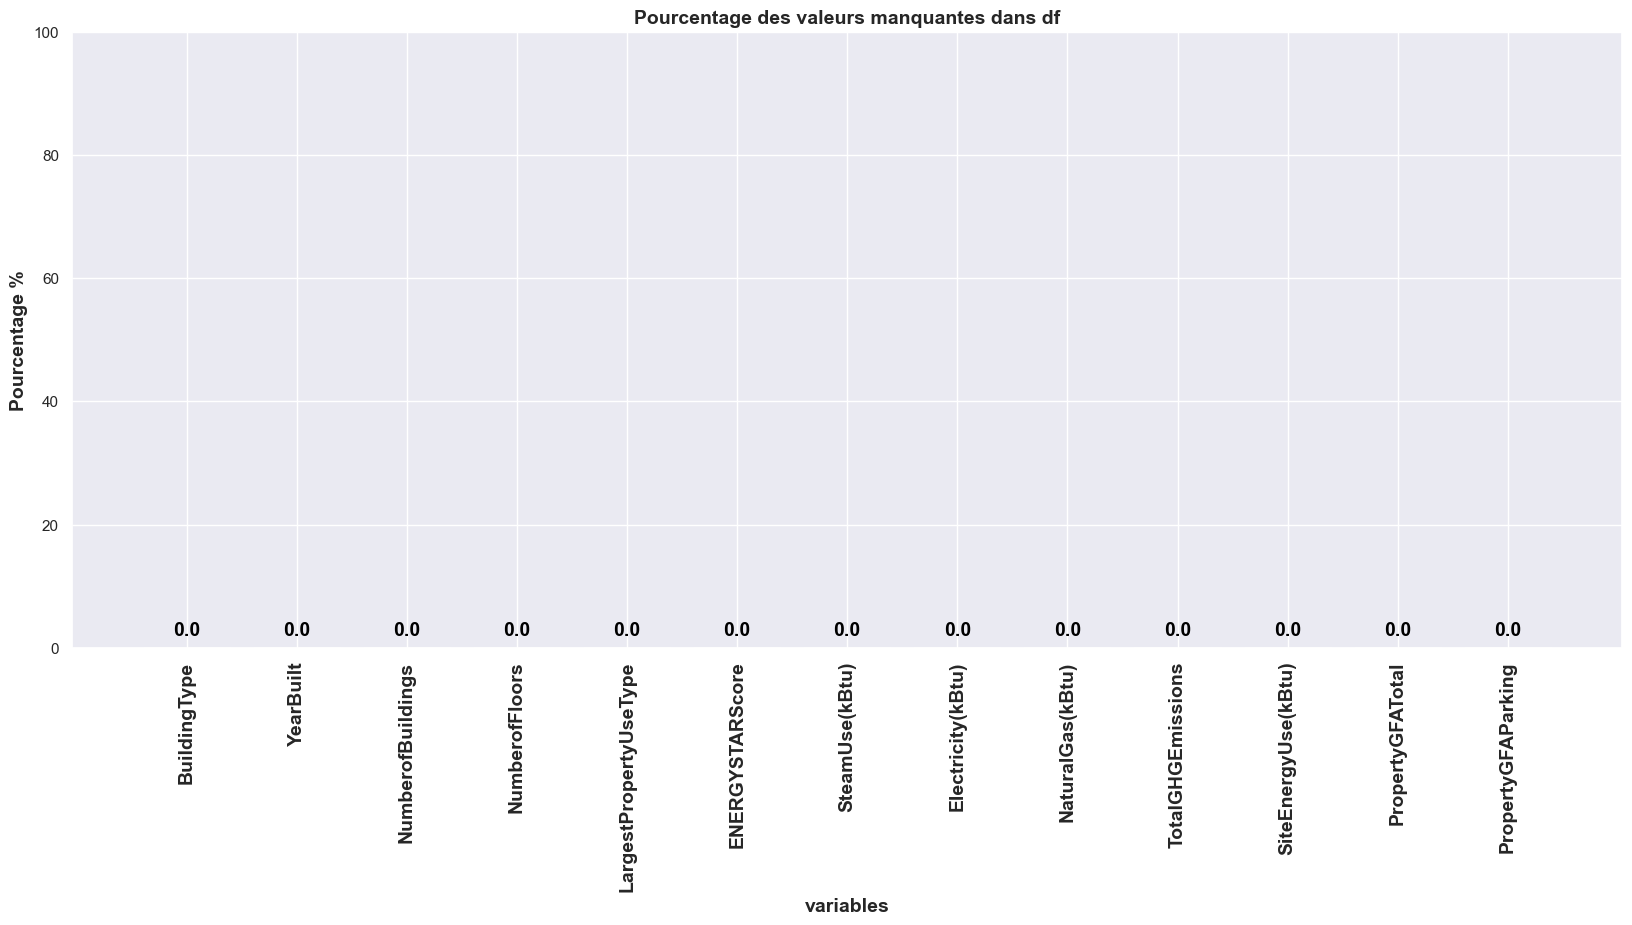

In [161]:
# Représentation graphique du pourcentage des valeurs manquantes pour chaque variable

sns.set_theme()
plt.figure(figsize=(20,8))
df_nan = (df.isna().mean()*100).round(1)
barplot=plt.bar(df_nan.keys(), df_nan.values, color="blue")
plt.bar_label(barplot, labels=df_nan.values, label_type= "edge", 
              weight='bold', padding=6, color= 'black', fontsize=14)
plt.xticks(rotation=90, weight='bold', fontsize=14)
plt.ylim([0,100])
plt.ylabel("Pourcentage %", weight='bold', fontsize=14)
plt.xlabel('variables', weight='bold', fontsize=14)
plt.title('Pourcentage des valeurs manquantes dans df', weight='bold', fontsize=14)
plt.show()

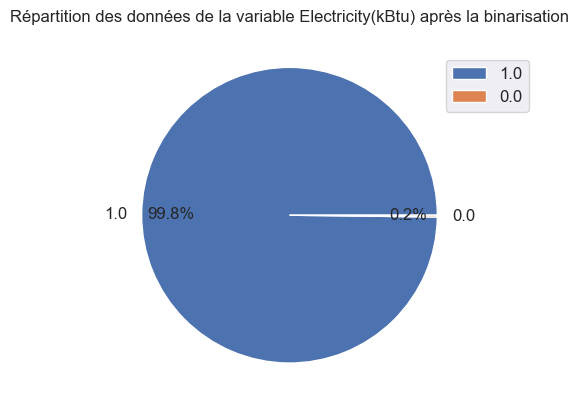

In [162]:
# Répartition des données de la variable Electricity(kBtu) après la binarisation
sns.set_theme()
df['Electricity(kBtu)'].value_counts().plot(kind='pie',autopct='%1.1f%%', pctdistance = 0.80, fontsize=12,
                                   title="Répartition des données de la variable Electricity(kBtu) après la binarisation",
                                   legend=False, label="")

ax = plt.gca()
ax.legend(loc="center left",
          fontsize=12,
          bbox_to_anchor=(0.9, 0.2, 0.5, 1.3))
plt.show()

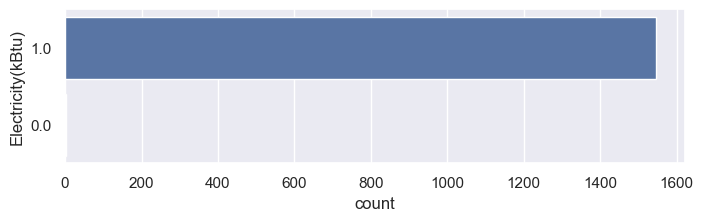

In [163]:
# visualisation de la répartition des données de la variable Electricity(kBtu)
plt.figure(figsize=(8, 2))
Electricity = df['Electricity(kBtu)'].value_counts().index
sns.countplot(y='Electricity(kBtu)', order=Electricity, data=df);

La variable "Electricity(kBtu)" (après binarisation) présente une distribution des données où 99,8% de ses valeurs sont égales à 1, tandis que les 0,2% restants sont égales à 0. Étant donné cette constance de la variable, il est envisageable de la supprimer avant de procéder à la modélisation

In [164]:
# Supprimer Electricity(kBtu) avant de procéder à la modélisation
df = df.drop(columns =["Electricity(kBtu)"])

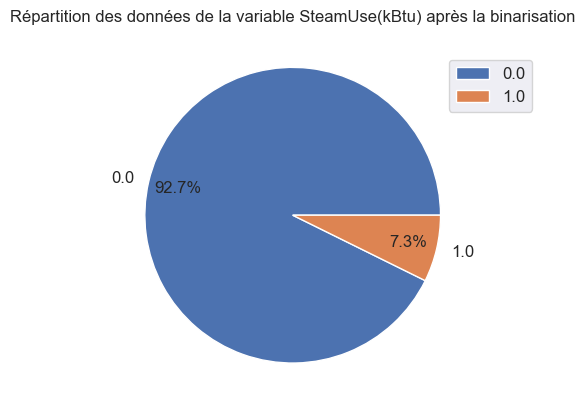

In [165]:
# Répartition des données de la variable SteamUse(kBtu) après la binarisation
sns.set_theme()
df['SteamUse(kBtu)'].value_counts().plot(kind='pie',autopct='%1.1f%%', pctdistance = 0.80, fontsize=12,
                                   title="Répartition des données de la variable SteamUse(kBtu) après la binarisation",
                                   legend=False, label="")

ax = plt.gca()
ax.legend(loc="center left",
          fontsize=12,
          bbox_to_anchor=(0.9, 0.2, 0.5, 1.3))
plt.show()

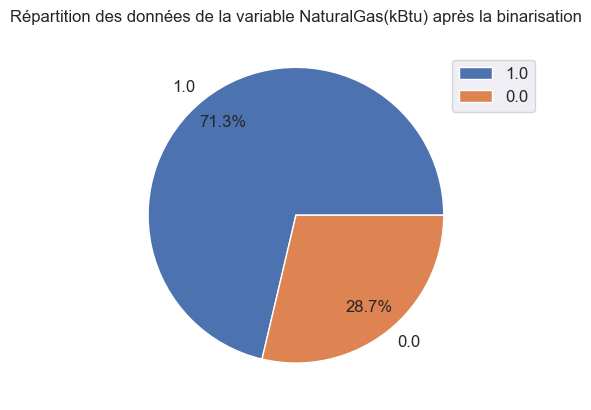

In [166]:
# Répartition des données de la variable NaturalGas(kBtu) après la binarisation
sns.set_theme()
df['NaturalGas(kBtu)'].value_counts().plot(kind='pie',autopct='%1.1f%%', pctdistance = 0.80, fontsize=12,
                                   title="Répartition des données de la variable NaturalGas(kBtu) après la binarisation",
                                   legend=False, label="")

ax = plt.gca()
ax.legend(loc="center left",
          fontsize=12,
          bbox_to_anchor=(0.9, 0.2, 0.5, 1.3))
plt.show()

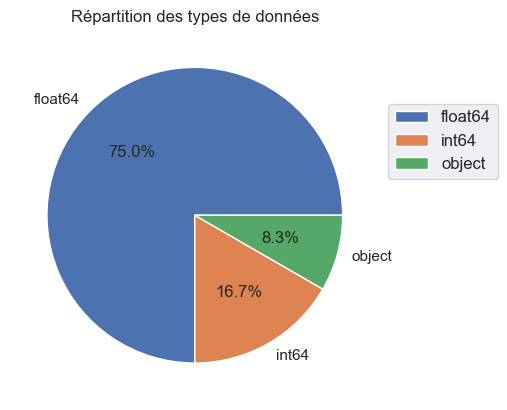

In [167]:
# visualisation de types des données dans le jeu de données df

df.dtypes.value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                   title="Répartition des types de données",
                                   legend=False, label="")

ax = plt.gca()
ax.legend(loc="center left",
          fontsize=12,
          bbox_to_anchor=(1, 0.2, 0.5, 1))
sns.set_theme()
plt.show()

In [168]:
# Enregistrez le DataFrame en tant que fichier csv à l'aide de la méthode to_csv() 
df.to_csv('df.csv', index=False)